# DATA

# CO CALIBRATION

In [2]:
import pandas as pd
Ref=pd.read_csv('Ref.csv')
Ref["CO"] = 1000 * Ref["CO"]
Ref['Date'] = pd.to_datetime(Ref['Date_Time'])
Ref=Ref.set_index('Date')
Ref.drop('Date_Time',axis = 1, inplace = True)
Ref=Ref.resample('5min').mean()
Ref=Ref[76463:137376]
Ref_CO=Ref['CO'].to_list()
Ref_NO2=Ref['NO2'].to_list()
Ref_SO2=Ref['SO2'].to_list()
Ref_O3=Ref['O3'].to_list()

In [3]:
import random
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('CO.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
Data_CO['Ref']=Ref_CO
index_names = Data_CO[ (Data_CO['WE'] >1000)].index
#Data_CO.drop(index_names, inplace = True)
WE=Data_CO['WE'].to_list()
AE=Data_CO['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
data = pd.read_csv('Conc_CO.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
#Data_CO.drop(index_names, inplace = True)
signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
CO_Data=CO_Data.sample(frac=1)

In [4]:
CO_Data=CO_Data.resample('20min').mean()
CO_Data=CO_Data.dropna()
CO_Data.head()

Lab1       Temp         RH         Ref  \
Date                                                                 
2019-10-02 11:40:00  3571.592599  26.378438  58.063437  312.707200   
2019-10-02 12:00:00  3108.940622  25.632544  48.527009  188.164925   
2019-10-02 12:20:00  2614.641410  25.811435  53.792695  269.273025   
2019-10-02 15:40:00  3313.026561  30.623188  49.580620  259.460975   
2019-10-03 15:40:00   535.086842  29.421250  52.411845  341.897275   

                     Net Signal  Month  Day_of_week  Day  Hour  
Date                                                            
2019-10-02 11:40:00  984.426875   10.0          2.0  2.0  11.0  
2019-10-02 12:00:00  900.879534   10.0          2.0  2.0  12.0  
2019-10-02 12:20:00  746.248697   10.0          2.0  2.0  12.0  
2019-10-02 15:40:00  914.638179   10.0          2.0  2.0  15.0  
2019-10-03 15:40:00  152.440810   10.0          3.0  3.0  15.0

In [5]:
#Ref=CO_Data['Ref'].to_list()
#CO_Data=CO_Data[CO_Data.Ref.between(np.mean(Ref)-0.7*np.std(Ref), np.mean(Ref)+0.7*np.std(Ref))]
#CO_Data.shape

In [6]:
sub= str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")

In [7]:
print('O2'.translate(sub))

O₂


In [8]:
print(r'$O_{2}$')

$O_{2}$


# Outlier detection and removal

In [9]:
import numpy as np

import pandas as pd   
import seaborn as sns
from scipy import stats

((11151, 9), (11610, 9))

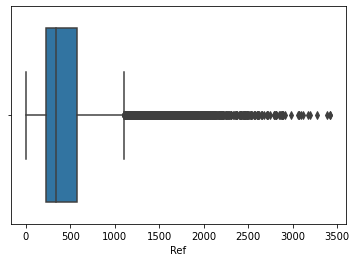

In [10]:
sns.boxplot(x=CO_Data['Ref'])
z=np.abs(stats.zscore(CO_Data))
CO_data=CO_Data[(z < 3).all(axis=1)]
CO_data.shape,CO_Data.shape

In [11]:
def MBE(true,pred):
    true=np.array(true)
    pred=np.array(pred)
    mbe=np.mean(true-pred)
    return mbe
def CRMSE(true,pred):
    true=np.array(true)
    pred=np.array(pred)
    crmse=np.sqrt(np.mean(((true-np.mean(true))-(pred-np.mean(pred)))**2))
    if np.std(pred)>np.std(true):
        crmse=crmse
    else:
        crmse=-crmse
    return crmse
import random

# Relative Expanded  Uncertainty(REU)

In [12]:
def REF(pred,y_test,alpha):
    import random
    cal=np.array(pred)
    ref=np.array(y_test.to_list())
    ref_mean=np.mean(ref)
    cal_mean=np.mean(cal)
    prec=np.array([20 for i in range(len(ref))])
    u=np.maximum(prec,0.001*ref)
    #cal=np.log(cal)
    #ref=np.log(ref)
    sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
    sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
    sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
    beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
    beta_0=cal_mean-beta_1*ref_mean
    RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*u**2)
    du_s=RSS/(len(cal)-2)
    Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
    Beta_0=cal_mean-Beta_1*ref_mean
    P1=(RSS/(len(cal)-2))
    P2=(Beta_1**2+alpha)*u**2+(-2*Beta_1**2+2*Beta_1-1)*u**2
    P3=(Beta_0+(Beta_1-1)*ref)**2
    P=[]
    for i in range(len(P3)):
        P.append(P1+P2[i]+P3[i])
    for i in range(len(P)):
        if P[i]<0:
            P[i]=random.randint(1,100)
    u_cal=(2*np.sqrt(np.array(P))/cal)*100
    #u_cal=((2*np.sqrt((RSS/(len(cal)-2))+(1-(beta_1-1)**2)*(0.08*ref)**2+(Beta_0+(Beta_1-1)*ref)**2))/cal)*100
    return u_cal  

In [13]:
def REF2(pred,y_test,alpha,LV):
    import random
    cal=np.array(pred)
    ref=np.array(y_test.to_list())
    ref_mean=np.mean(ref)
    cal_mean=np.mean(cal)
    for i in range(len(ref)):
        if ref[i]==0:
            ref[i]=ref_mean
    prec=np.array([20 for i in range(len(ref))])
    u=0.001*ref
    #cal=np.log(cal)
    #ref=np.log(ref)
    sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
    sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
    sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
    #beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
    beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
    beta_0=cal_mean-beta_1*ref_mean
    RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
    du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
    Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
    Beta_0=cal_mean-Beta_1*ref_mean
    P1=(RSS/(len(cal)-2))
    P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
    P3=(Beta_0+(Beta_1-1)*LV)**2
    P=P1+P2+P3
    if P<0:
        P=random.randint(1,100)
    u_cal=(2*np.sqrt(P)/(Beta_0+Beta_1*LV))*100
    #u_cal=((2*np.sqrt((RSS/(len(cal)-2))+(1-(beta_1-1)**2)*0.1+(Beta_0+(Beta_1-1)*ref)**2))/cal)*100
    return u_cal  

In [14]:
def target(pred,y_test,alpha):
    import random
    cal=np.array(pred)
    ref=np.array(y_test.to_list())
    ref_mean=np.mean(ref)
    cal_mean=np.mean(cal)
    prec=np.array([20 for i in range(len(ref))])
    u=np.maximum(prec, 0.001*ref)
    #u=0.01*ref
    #cal=np.log(cal)
    #ref=np.log(ref)
    sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
    sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
    sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
    #beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
    beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
    beta_0=cal_mean-beta_1*ref_mean
    RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*u**2)
    du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
    Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
    Beta_0=cal_mean-Beta_1*ref_mean
    P1=(RSS/(len(cal)-2))
    P2=(Beta_1**2+alpha)*u**2+(-2*Beta_1**2+2*Beta_1-1)*u**2
    P3=(Beta_0+(Beta_1-1)*ref)
    P=[]
    for i in range(len(P2)):
        P.append(P1+P2[i])
    for i in range(len(P)):
        if P[i]<0:
            P[i]=random.randint(1,50)
    A=(2*(np.array(P))**0.5/ref)*100
    #for i in range(len(P3)):
        #if P3[i]<0:
            #P3[i]=random.randint(0,50)
    B=(2*(np.array(P3))/ref)*100
    bias=[]
    random=[]
    Ref=[]
    part1=(Beta_0/ref)*100
    part=[beta_1-1 for i in range(len(ref))]
    part2=(np.array(part))*100
    PART1=[]
    PART2=[]
    for i in range(len(A)):
        if A[i]<500:
            random.append(A[i])
            bias.append(B[i])
            Ref.append(ref[i])
            PART1.append(part1[i])
            PART2.append(part2[i])
    return [random,bias,Ref, PART1,PART2]

In [15]:
from sklearn import linear_model
import numpy as np
Y=[20,40,60,80,100]
X=np.array([10,30,50,70,90]).reshape(-1, 1)

regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 10.0
Coefficients: 
 [1.]


In [16]:
def target2(Y,X,u):
    from sklearn import linear_model
    import numpy as np
    x=np.array(Y).reshape(-1, 1)
    y=np.array(X).reshape(-1, 1)
    regr = linear_model.LinearRegression()
    regr.fit(x, y)
    b0=regr.intercept_
    b1=regr.coef_[0]
    RSS=sum((np.array(Y)-(b0[0]+b1[0]*np.array(X)))**2)
    RR=2*((RSS/((len(X)-2))-u**2)/np.array(X))**0.5
    RB=2*(b0/np.array(X)+(b1-1))
    return RR,RB

A=[200,360,288,290]
B=[204,336,267,301]
y=np.array(B).reshape(-1, 1)
RSS=sum((np.array(A)-(b0[0]+b1[0]*np.array(B)))**2)
RSS
RR=2*((RSS/((len(X)-2))-5**2)/np.array(X))**0.5
RR

x=np.array(A).reshape(-1, 1)
y=np.array(B).reshape(-1, 1)
regr = linear_model.LinearRegression()
regr.fit(x, y)
b0=regr.intercept_
b1=regr.coef_[0]
b0[0]
b1[0]

target2(A,B,5)

B=np.array([20,20])
A=np.array([1,30])
C=np.array([A,B])
np.maximum(A,B)

In [17]:
Ref=CO_Data['Ref'].to_list()
#CO_Data=CO_Data[CO_Data.Ref.between(np.mean(Ref)-1*np.std(Ref), np.mean(Ref)+1*np.std(Ref))]
#NO2_Data.shape

In [18]:
import numpy as np 

x = np.quantile(Ref, [0,0.25,0.5,0.75,1])
CO_LQ=x[1]
CO_Mean=x[2]
CO_UQ=x[3]
CO_Max=x[4]
CO_LQ,CO_Mean,CO_UQ,CO_Max

(229.44315208333333, 343.1233270833333, 578.3749687500001, 3424.3903333333333)

## Model 1: Linear Regression

In [56]:
from sktime.performance_metrics.forecasting import sMAPE, smape_loss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#'Ref_NO2','Ref_SO2','Ref_O3',
#,'Month','Day_of_week','Day','Hour'

X=CO_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour']]
y=CO_Data['Ref']
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.2,shuffle=False)
#train_test_split(X, y, test_size = 0.2)
X_train.head(800)

Net Signal         Lab1       Temp         RH  Month  \
Date                                                                        
2019-10-02 11:40:00  984.426875  3571.592599  26.378438  58.063437   10.0   
2019-10-02 12:00:00  900.879534  3108.940622  25.632544  48.527009   10.0   
2019-10-02 12:20:00  746.248697  2614.641410  25.811435  53.792695   10.0   
2019-10-02 15:40:00  914.638179  3313.026561  30.623188  49.580620   10.0   
2019-10-03 15:40:00  152.440810   535.086842  29.421250  52.411845   10.0   
...                         ...          ...        ...        ...    ...   
2019-10-18 10:40:00   75.731462   431.311335  33.403199  50.297406   10.0   
2019-10-18 11:00:00   77.641519   545.459169  33.454115  49.322463   10.0   
2019-10-18 11:20:00  107.123446   557.010370  33.926170  48.065655   10.0   
2019-10-18 11:40:00  126.244366   680.419583  32.462758  49.071122   10.0   
2019-10-18 12:00:00  170.807847   755.889119  33.935463  46.812709   10.0   

                     Day_of_week  Hour  
Date                                    
2019-10-02 11:40:00          2.0  11.0  
2019-10-02 12:00:00          2.0  12.0  
2019-10-02 12:20:00          2.0  12.0  
2019-10-02 15:40:00          2.0  15.0  
2019-10-03 15:40:00          3.0  15.0  
...                          ...   ...  
2019-10-18 10:40:00          4.0  10.0  
2019-10-18 11:00:00          4.0  11.0  
2019-10-18 11:20:00          4.0  11.0  
2019-10-18 11:40:00          4.0  11.0  
2019-10-18 12:00:00          4.0  12.0  

[800 rows x 7 columns]

<AxesSubplot:xlabel='Date'>

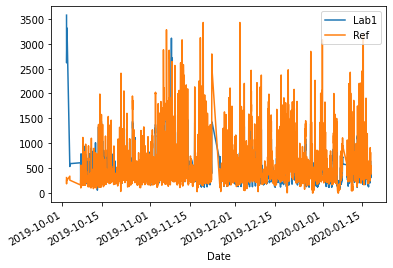

In [64]:
CO_Data[['Lab1','Ref']][:7000].plot()

<AxesSubplot:xlabel='Date'>

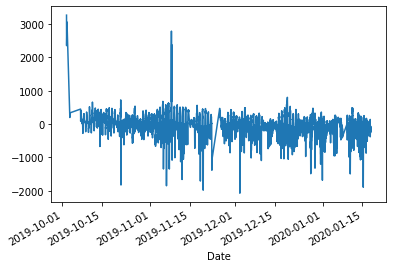

In [66]:
Df=CO_Data['Lab1'][:7000]-CO_Data['Ref'][:7000]
Df.plot()

In [35]:
lr = LinearRegression()
model = lr.fit(X_train.drop(['Lab1'], axis=1), y_train)
pred = model.predict(X_test.drop(['Lab1'], axis=1))
lab1=X_test['Lab1'].to_list()

index=[i for i in range(len(y_test))]
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =index)
Y_test
Pred=pd.Series(pred,index =index)
Lab1=pd.Series(lab1,index =index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_lr_CO=sMAPE_lr
RMSE_lr_CO=round(RMSE_lr/np.mean(np.array(y_test)),2)
Pearson_lr_CO=Pearson_lr
sMAPE_lab_CO=sMAPE_lab
RMSE_lab_CO=round(RMSE_lab/np.mean(np.array(lab1)),2)
Pearson_lab_CO=Pearson_lab
R2_lr_CO=round(sm.r2_score(y_test, pred), 2)
R2_lab_CO=round(sm.r2_score(y_test, lab1), 2)
RMSE_Lr_CO=RMSE_lr
RMSE_Lab_CO=RMSE_lab

A=len(y_test)-200
D=max(y_test[A:])-0.2*max(y_test[A:])
C=max(y_test[A:])-0.1*max(y_test[A:])
B=120
Pearson_lr,RMSE_Lr_CO

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


(0.71, 145.9)

In [53]:
#y_test=np.array(y_test)
#pred=np.array(y_test)

In [36]:
dataframe = pd.DataFrame({'pred':pred,
                          'ytest':y_test})

# Breusch Pagan Test #

In [37]:
import numpy as np
import pandas as pd
import statsmodels.regression.linear_model as rg
import statsmodels.tools.tools as ct
import statsmodels.stats.diagnostic as dg
data=dataframe
data.loc[:, 'const'] = ct.add_constant(data)
ivar = ['const', 'ytest']
reg = rg.OLS(data['pred'], data[ivar], hasconst=bool).fit()
res = reg.resid
print('== Residuals Homoscedasticity Breusch-Pagan Test ==')
print('')
print('Breusch-Pagan LM Test Statistic:', np.round(dg.het_breuschpagan(res, exog_het=data[ivar])[0], 6))
print('Breusch-Pagan LM Test P-Value:', np.round(dg.het_breuschpagan(res, exog_het=data[ivar])[1], 6))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


ValueError: Cannot set a DataFrame with multiple columns to the single column const

In [38]:
cal=np.array(pred)
ref=np.array(y_test.to_list())
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
    #cal=np.log(cal)
    #ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+1)*(0.08*ref)**2)
du_s=RSS/(len(cal)-2)
Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P1

13399.870480072981

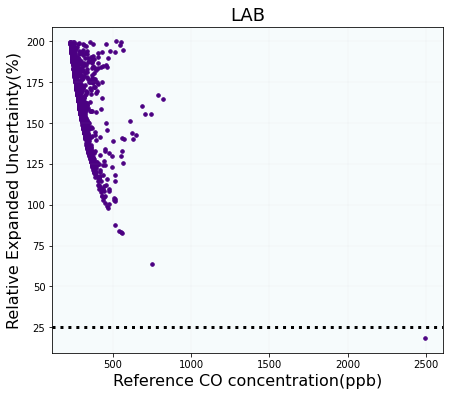

In [39]:
u_cal=REF(lab1,y_test,0.1)
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.1)
ind=[]
U_cal=[]
Ref=[]
for i in range(len(pred)):
    if u_cal[i]<200:
        U_cal.append(u_cal[i])
        Ref.append(Lab1[i])

dqo=[25 for i in range(len(Ref))]
plt.scatter(Ref,U_cal, color='#4B0082',marker='.',s=50)
plt.axhline(y=25, color='black', linestyle=':',linewidth=3)
plt.ylabel('Relative Expanded Uncertainty(%)', fontsize=16)
#plt.ylabel(r'$H_{2}$', fontsize=24)
plt.xlabel('Reference CO concentration(ppb)',fontsize=16)
plt.grid(linestyle='-.',linewidth=0.1)
plt.title('LAB',fontsize=18)
plt.show()

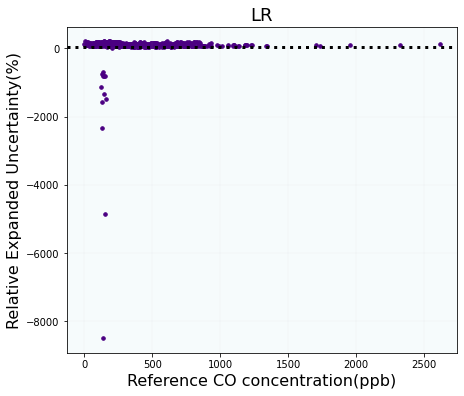

In [40]:
u_cal=REF(pred,y_test,1)
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.1)
ind=[]
U_cal=[]
Ref=[]
for i in range(len(u_cal)):
    if u_cal[i]<200:
        U_cal.append(u_cal[i])
        Ref.append(y_test[i])
plt.scatter(Ref,U_cal, color='#4B0082',marker='.',s=50)
plt.axhline(y=25, color='black', linestyle=':',linewidth=3)
plt.ylabel('Relative Expanded Uncertainty(%)', fontsize=16)
plt.xlabel('Reference CO concentration(ppb)',fontsize=16)
plt.grid(linestyle='-.',linewidth=0.1)
plt.title('LR', fontsize=18)
plt.show()

In [41]:
REF2(Lab1,y_test,1,20000)

362.9643700414145

In [42]:
max(y_test)

2615.3450000000003

In [43]:
B=0
for i in range(len(y_test)):
    if y_test[i]==max(y_test):
        B=Lab1[i]    

In [44]:
sorted(y_test)[int(0.25*len(sorted(y_test)))]

170.45997916666667

In [45]:
import random
alpha=1.4
LV=sorted(y_test)[int(0.25*len(sorted(y_test)))]
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(lab1)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/LV)*100
Random=(2*(P1+P2)**0.5/LV)*100




import random
alpha=1.4
LV2=sorted(y_test)[int(0.5*len(sorted(y_test)))]
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(lab1)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV2)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV2)**2
P3=(Beta_0+(Beta_1-1)*LV2)
P=P1+P2+P3
Bias2=(2*(P3)/LV2)*100
Random2=(2*(P1+P2)**0.5/LV2)*100



import random
alpha=1.4
LV1=sorted(y_test)[int(0.75*len(sorted(y_test)))]
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(lab1)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV1)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV1)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV1)**2
P3=(Beta_0+(Beta_1-1)*LV1)
P=P1+P2+P3
Bias1=(2*(P3)/(LV1))*100
Random1=(2*(P1+P2)**0.5/(LV1))*100


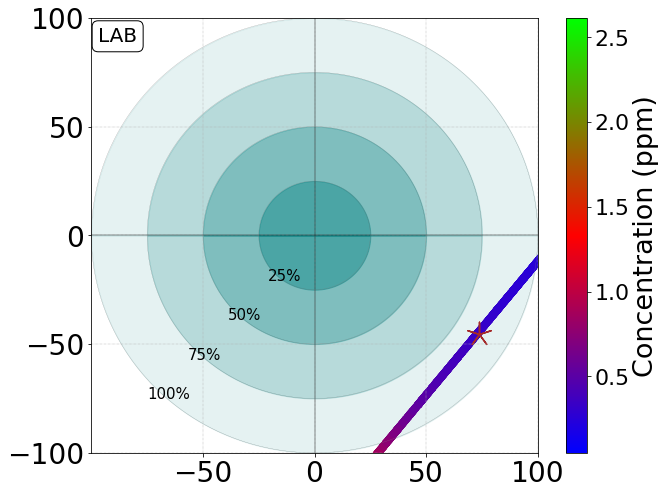

In [46]:
A1=target(lab1,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =25
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =100
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))

plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='teal', alpha=0.4)
plt.fill_between(a2, b2, color='teal',alpha=0.3)
plt.fill_between(a3, b3, color='teal',alpha=0.2)
plt.fill_between(a4, b4, color='teal',alpha=0.1)

x1=np.arange(0,25.1,0.1)
r1=25
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,100.1,0.1)
r4=100
y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=0.2, color='grey')
plt.plot(x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(x2,y2, linewidth=0.2, color='grey')
plt.plot(x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(x3,y3, linewidth=0.2, color='grey')
plt.plot(x3,-1*y3, linewidth=0.2, color='grey')
plt.plot(x4,y4, linewidth=0.2, color='grey')
plt.plot(x4,-1*y4, linewidth=0.2, color='grey')

plt.plot(-1*x1,y1, linewidth=0.2, color='grey')
plt.plot(-1*x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(-1*x2,y2, linewidth=0.2, color='grey')
plt.plot(-1*x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(-1*x3,y3, linewidth=0.2, color='grey')
plt.plot(-1*x3,-1*y3, linewidth=0.2, color='grey')
plt.plot(-1*x4,y4, linewidth=0.2, color='grey')
plt.plot(-1*x4,-1*y4, linewidth=0.2, color='grey')

#plt.xlabel('Random uncertainty effect (%)',fontsize=24)
#plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title('CO',fontsize=18)
color_map = plt.cm.get_cmap('brg')
reversed_color_map = color_map
plt.scatter(A1[0],A1[1],marker='.',s=200,c=np.array(A1[2])/1000,cmap=reversed_color_map)
#plt.scatter(A1[3],A1[1],marker='.',s=10,c=np.array(A1[2])/1000,cmap=reversed_color_map)
#plt.scatter(A1[4],A1[1],marker='.',s=10,c=np.array(A1[2])/1000,cmap=reversed_color_map)
plt.vlines([0], -130, 130,color='black',linewidth=0.4)
plt.hlines([0], -130, 130, color='black',linewidth=0.4)
plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-100)
plt.ylim(ymax=100)
plt.xlim(xmax=100)
plt.xlim(xmin=-100)
plt.xticks(np.arange(-50,101, 50),fontsize=28)
plt.yticks(np.arange(-100,101, 50),fontsize=28)
#plt.colorbar()
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=22)
cbar.set_label('Concentration (ppm)', rotation=90,fontsize=27)
plt.scatter(Random,Bias,marker=(5, 2),s=600, color='black')
plt.scatter(Random1,Bias1,marker=(5, 2),s=600, color='brown')
plt.scatter(Random2,Bias2,marker=(5, 2),s=600, color='orange')
textstr = 'LAB'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.09, 1.27, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
plt.text(-21,-21, '25%',fontsize=15)
plt.text(-39,-39, '50%',fontsize=15)
plt.text(-57,-57, '75%',fontsize=15)
plt.text(-75,-75, '100%',fontsize=15)
plt.show()

In [47]:
import random
alpha=1.4
LV=CO_Mean#sorted(y_test)[int(0.25*len(sorted(y_test)))]
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/LV)*100
Random=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV2=CO_UQ#sorted(y_test)[int(0.5*len(sorted(y_test)))]
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV2)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV2)**2
P3=(Beta_0+(Beta_1-1)*LV2)
P=P1+P2+P3
Bias2=(2*(P3)/LV2)*100
Random2=(2*(P1+P2)**0.5/LV2)*100


import random
alpha=1.4
LV1=CO_Max#sorted(y_test)[int(0.75*len(sorted(y_test)))]
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV1)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV1)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV1)**2
P3=(Beta_0+(Beta_1-1)*LV1)
P=P1+P2+P3
Bias1=(2*(P3)/(LV1))*100
Random1=(2*(P1+P2)**0.5/(LV1))*100

<ipython-input-46-6842ed1662bc>:32: RuntimeWarning: divide by zero encountered in true_divide
  A=(2*(np.array(P))**0.5/ref)*100
<ipython-input-46-6842ed1662bc>:36: RuntimeWarning: divide by zero encountered in true_divide
  B=(2*(np.array(P3))/ref)*100
<ipython-input-46-6842ed1662bc>:40: RuntimeWarning: divide by zero encountered in true_divide
  part1=(Beta_0/ref)*100


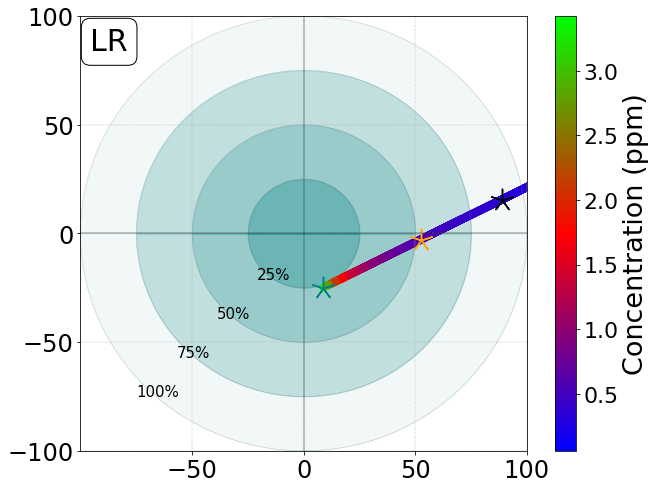

In [66]:
A2=target(pred,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =25
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =100
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))

plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='teal', alpha=0.3)
plt.fill_between(a2, b2, color='teal',alpha=0.2)
plt.fill_between(a3, b3, color='teal',alpha=0.2)
plt.fill_between(a4, b4, color='teal',alpha=0.05)

x1=np.arange(0,25.1,0.1)
r1=25
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,100.1,0.1)
r4=100
y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=0.2, color='grey')
plt.plot(x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(x2,y2, linewidth=0.2, color='grey')
plt.plot(x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(x3,y3, linewidth=0.2, color='grey')
plt.plot(x3,-1*y3, linewidth=0.2, color='grey')
plt.plot(x4,y4, linewidth=0.2, color='grey')
plt.plot(x4,-1*y4, linewidth=0.2, color='grey')

plt.plot(-1*x1,y1, linewidth=0.2, color='grey')
plt.plot(-1*x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(-1*x2,y2, linewidth=0.2, color='grey')
plt.plot(-1*x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(-1*x3,y3, linewidth=0.2, color='grey')
plt.plot(-1*x3,-1*y3, linewidth=0.2, color='grey')
plt.plot(-1*x4,y4, linewidth=0.2, color='grey')
plt.plot(-1*x4,-1*y4, linewidth=0.2, color='grey')

#plt.xlabel('Random uncertainty effect (%)',fontsize=24)
#plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title('CO',fontsize=18)
color_map = plt.cm.get_cmap('brg')
reversed_color_map = color_map
plt.scatter(A2[0],A2[1],marker='.',s=200,c=np.array(A2[2])/1000,cmap=reversed_color_map)
#plt.scatter(A2[3],A2[1],marker='.',s=10,c=np.array(A2[2])/1000,cmap=reversed_color_map)
#plt.scatter(A2[4],A2[1],marker='.',s=10,c=np.array(A2[2])/1000,cmap=reversed_color_map)
plt.vlines([0], -130, 130,color='black',linewidth=0.4)
plt.hlines([0], -130, 130, color='black',linewidth=0.4)
plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-100)
plt.ylim(ymax=100)
plt.xlim(xmax=100)
plt.xlim(xmin=-100)
plt.xticks(np.arange(-50,101, 50),fontsize=24)
plt.yticks(np.arange(-100,101, 50),fontsize=24)
#plt.colorbar()
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=22)
cbar.set_label('Concentration (ppm)', rotation=90,fontsize=27)
plt.scatter(Random,Bias,marker=(5, 2),s=500, color='black')
plt.scatter(Random1,Bias1,marker=(5, 2),s=500, color='teal')
plt.scatter(Random2,Bias2,marker=(5, 2),s=500, color='orange')
textstr = 'LR'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.07, 1.25, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)
plt.text(-21,-21, '25%',fontsize=15)
plt.text(-39,-39, '50%',fontsize=15)
plt.text(-57,-57, '75%',fontsize=15)
plt.text(-75,-75, '100%',fontsize=15)
plt.show()

In [67]:
A=target2(pred,y_test,20)
A[1]

<ipython-input-48-1c8082621693>:11: RuntimeWarning: divide by zero encountered in true_divide
  RR=2*((RSS/((len(X)-2))-u**2)/np.array(X))**0.5
<ipython-input-48-1c8082621693>:12: RuntimeWarning: divide by zero encountered in true_divide
  RB=2*(b0/np.array(X)+(b1-1))


array([-0.02949175, -0.02139743, -0.02249547, ..., -0.04464738,
       -0.02341608, -0.03786733])

(-2.0, 1.0)

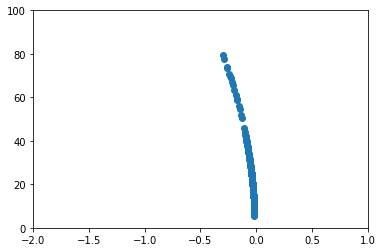

In [68]:
plt.scatter(A[1],A[0])
plt.ylim(ymin=-0)
plt.ylim(ymax=100)
plt.xlim(xmax=1)
plt.xlim(xmin=-2)

In [69]:
REF2(Lab1,y_test,1,30000)

173.80246434417316

In [70]:
REF2(pred,y_test,1,30000)

33.43865136980359

fig= plt.figure(figsize=(8,6))
index=[i for i in range(1,201)]
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.2)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='#513e00',linewidth=3)
plt.plot(index,lab1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'LR-Calibrated', 'Lab-Calibrated'], loc = 2, bbox_to_anchor = (0.74,1))
plt.ylabel('CO Concentration(ppb)',fontsize=18)
#plt.text(B-20, C, r'$R^{2}(LR)=$'+str(R2_lr_CO), fontsize = 14, color='#513e00')
#plt.text(B-20, D, r'$R^{2}(Lab)=$' +str(R2_lab_CO), fontsize = 14, color='#426eff')
#plt.text(B-70, C, 'Pearson r(LR)='+str(Pearson_lr), fontsize = 14, color='#513e00')
#plt.text(B-70, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Visualization: Linear Regression Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [71]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))
pred_lr=pred
MBE_LR_CO=MBE(pred,y_test)/np.std(y_test)
CRMSE_LR_CO=CRMSE(y_test,pred)/np.std(y_test)
MBE_LAB_CO=MBE(lab1,y_test)/np.std(y_test)
CRMSE_LAB_CO=CRMSE(y_test,lab1)/np.std(y_test)

Regressor model performance:
Mean absolute error(MAE) = 93.41
Mean squared error(MSE) = 26929.4
Median absolute error = 57.86
Explain variance score = 0.84
R2 score = 0.84


## Model 2 :  Support Vector Regression (SVR)

In [72]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
regressor = SVR(kernel = 'linear')
regressor.fit(X_train.drop(['Lab1'], axis=1), y_train)
pred = regressor.predict(X_test.drop(['Lab1'], axis=1))
for i in range(len(Pred)):
    if pred[i]<0:
        pred[i]=np.mean(np.array(pred))
pred_svr=pred

In [73]:
Index=[i for i in range(len(y_test))]
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)

Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_svr_CO=sMAPE_lr
RMSE_svr_CO=round(RMSE_lr/np.mean(np.array(y_test)),2)
Pearson_svr_CO=Pearson_lr
R2_svr_CO=round(sm.r2_score(y_test, pred), 2)
RMSE_Svr_CO=RMSE_lr

fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='brown',linewidth=3)
plt.plot(index,lab1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'SVR-Calibrated', 'Lab-Calibrated'], loc = 2, bbox_to_anchor = (0.74,1))
plt.ylabel('CO Concentration(ppb)',fontsize=18)
#plt.text(B-20, C,r'$R^{2}(SVR)=$'+str(R2_svr_CO) , fontsize = 14, color='brown')
#plt.text(B-20, D,r'$R^{2}(Lab)=$'+str(R2_lab_CO) , fontsize = 14, color='#426eff')
#plt.text(B-70, C, 'Pearson r(SVR)='+str(Pearson_lr), fontsize = 14, color='brown')
#plt.text(B-70, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Visualization: Support Vector Regression (SVR) Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [74]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))
pred_svr=pred
MBE_SVR_CO=MBE(pred,y_test)/np.std(y_test)
CRMSE_SVR_CO=CRMSE(y_test,pred)/np.std(y_test)

Regressor model performance:
Mean absolute error(MAE) = 91.81
Mean squared error(MSE) = 26942.7
Median absolute error = 54.07
Explain variance score = 0.84
R2 score = 0.84


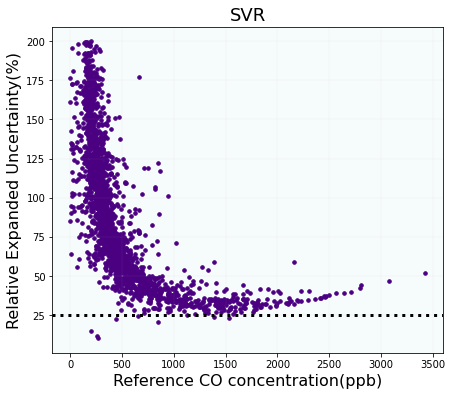

In [75]:
u_cal=REF(pred,y_test,1.4)
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.1)
ind=[]
U_cal=[]
Ref=[]
for i in range(len(u_cal)):
    if u_cal[i]<200:
        U_cal.append(u_cal[i])
        Ref.append(y_test[i])
plt.scatter(Ref,U_cal, color='#4B0082',marker='.',s=50)
plt.axhline(y=25, color='black', linestyle=':',linewidth=3)
plt.ylabel('Relative Expanded Uncertainty(%)', fontsize=16)
plt.xlabel('Reference CO concentration(ppb)',fontsize=16)
plt.grid(linestyle='-.',linewidth=0.1)
plt.title('SVR', fontsize=18)
plt.show()

In [76]:
REF2(pred,y_test,1,20000)

39.55256619836408

In [77]:
import random
alpha=1.4
LV=5000
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/LV)*100
Random=(2*(P1+P2)**0.5/LV)*100


import random
alpha=1.4
LV2=7000
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV2)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV2)**2
P3=(Beta_0+(Beta_1-1)*LV2)
P=P1+P2+P3
Bias2=(2*(P3)/LV2)*100
Random2=(2*(P1+P2)**0.5/LV2)*100



import random
alpha=1.4
LV1=30000
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV1)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV1)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV1)**2
P3=(Beta_0+(Beta_1-1)*LV1)
P=P1+P2+P3
Bias1=(2*(P3)/(LV1))*100
Random1=(2*(P1+P2)**0.5/(LV1))*100


<ipython-input-46-6842ed1662bc>:32: RuntimeWarning: divide by zero encountered in true_divide
  A=(2*(np.array(P))**0.5/ref)*100
<ipython-input-46-6842ed1662bc>:36: RuntimeWarning: divide by zero encountered in true_divide
  B=(2*(np.array(P3))/ref)*100
<ipython-input-46-6842ed1662bc>:40: RuntimeWarning: divide by zero encountered in true_divide
  part1=(Beta_0/ref)*100


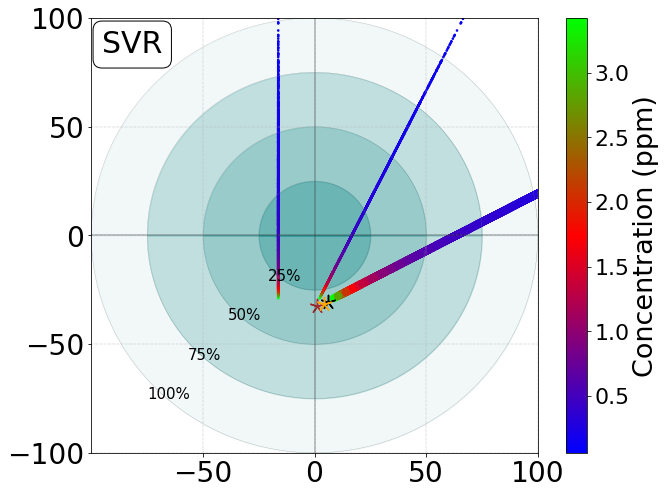

In [78]:
A3=target(pred,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =25
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =100
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))

plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')
plt.fill_between(a1, b1, color='teal', alpha=0.3)
plt.fill_between(a2, b2, color='teal',alpha=0.2)
plt.fill_between(a3, b3, color='teal',alpha=0.2)
plt.fill_between(a4, b4, color='teal',alpha=0.05)


x1=np.arange(0,25.1,0.1)
r1=25
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,100.1,0.1)
r4=100
y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=0.2, color='grey')
plt.plot(x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(x2,y2, linewidth=0.2, color='grey')
plt.plot(x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(x3,y3, linewidth=0.2, color='grey')
plt.plot(x3,-1*y3, linewidth=0.2, color='grey')
plt.plot(x4,y4, linewidth=0.2, color='grey')
plt.plot(x4,-1*y4, linewidth=0.2, color='grey')

plt.plot(-1*x1,y1, linewidth=0.2, color='grey')
plt.plot(-1*x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(-1*x2,y2, linewidth=0.2, color='grey')
plt.plot(-1*x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(-1*x3,y3, linewidth=0.2, color='grey')
plt.plot(-1*x3,-1*y3, linewidth=0.2, color='grey')
plt.plot(-1*x4,y4, linewidth=0.2, color='grey')
plt.plot(-1*x4,-1*y4, linewidth=0.2, color='grey')

#plt.xlabel('Random uncertainty effect (%)',fontsize=24)
#plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title('CO',fontsize=18)
color_map = plt.cm.get_cmap('brg')
reversed_color_map = color_map
plt.scatter(A3[0],A3[1],marker='.',s=200,c=np.array(A3[2])/1000,cmap=reversed_color_map)
plt.scatter(A3[3],A3[1],marker='.',s=10,c=np.array(A3[2])/1000,cmap=reversed_color_map)
plt.scatter(A3[4],A3[1],marker='.',s=10,c=np.array(A3[2])/1000,cmap=reversed_color_map)
plt.vlines([0], -130, 130,color='black',linewidth=0.4)
plt.hlines([0], -130, 130, color='black',linewidth=0.4)
plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-100)
plt.ylim(ymax=100)
plt.xlim(xmax=100)
plt.xlim(xmin=-100)
plt.xticks(np.arange(-50,101, 50),fontsize=28)
plt.yticks(np.arange(-100,101, 50),fontsize=28)
#plt.colorbar()
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=22)
cbar.set_label('Concentration (ppm)', rotation=90,fontsize=27)
plt.scatter(Random,Bias,marker=(5, 2),s=200, color='black')
plt.scatter(Random1,Bias1,marker=(5, 2),s=200, color='brown')
plt.scatter(Random2,Bias2,marker=(5, 2),s=200, color='orange')
textstr = 'SVR'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.1, 1.26, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)
plt.text(-21,-21, '25%',fontsize=15)
plt.text(-39,-39, '50%',fontsize=15)
plt.text(-57,-57, '75%',fontsize=15)
plt.text(-75,-75, '100%',fontsize=15)
plt.show()

In [79]:
REF2(pred,y_test,1,30000)

39.181551122502334

## Model 3 : Random Forest

In [80]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 500,min_samples_split= 2,min_samples_leaf= 1,max_features= 'sqrt', 
                                  random_state = 0,max_depth=None,bootstrap=False)
  
  
# fit the regressor with x and y data
regressor=regressor.fit(X_train.drop(['Lab1'], axis=1), y_train)
pred = regressor.predict(X_test.drop(['Lab1'], axis=1))

In [81]:
features_CO=regressor.feature_importances_
pred = regressor.predict(X_test.drop(['Lab1'], axis=1))
pred_rf_co=pred
Index=[i for i in range(len(y_test))]
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_rf_CO=sMAPE_lr
RMSE_rf_CO=round(RMSE_lr/np.mean(np.array(y_test)),2)
Pearson_rf_CO=Pearson_lr
R2_rf_CO=round(sm.r2_score(y_test, pred), 2)
RMSE_Rf_CO=RMSE_lr

In [82]:
features_CO

array([0.72431   , 0.07255402, 0.05103354, 0.04333225, 0.02465834,
       0.08411185])

fig= plt.figure(figsize=(30,4))

ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='black',linewidth=3)
plt.plot(index,pred[A:], color='red',linewidth=3)
plt.plot(index,lab1[A:], color='blue',linewidth=3)
plt.legend(['Ref', 'RF-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.79,1))
plt.ylabel('CO Concentration(ppb)',fontsize=18)
plt.text(B-20, C, r'$R^{2}(RF)=$'+str(R2_rf_CO), fontsize = 14, color='red')
plt.text(B-20, D, r'$R^{2}(Lab)=$'+str(R2_lab_CO), fontsize = 14, color='blue')
plt.text(B-72, C, 'Pearson r(RF)='+str(Pearson_lr), fontsize = 14, color='red')
plt.text(B-72, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='blue')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Visualization: Random Forest(RF) Calibration vs Laboratory Calibration',fontsize=18)
#plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [83]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))
pred_rf=pred
MBE_RF_CO=MBE(pred,y_test)/np.std(y_test)
CRMSE_RF_CO=CRMSE(y_test,pred)/np.std(y_test)

Regressor model performance:
Mean absolute error(MAE) = 65.51
Mean squared error(MSE) = 13315.94
Median absolute error = 33.72
Explain variance score = 0.92
R2 score = 0.92


R2=[]
DQO=[]
lv=max(y_test)
for i in range(1,25):
    regressor=regressor.fit(X_train[:360*i].drop(['Lab1'], axis=1), y_train[:360*i])
    pred = regressor.predict(X_test.drop(['Lab1'], axis=1))
    dqo=REF2(pred,y_test,1.3,lv)
    r2=round(sm.r2_score(y_test, pred), 2)
    DQO.append(dqo)
    R2.append(r2)
    
    

# Hyper parameter tuning

In [84]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [85]:
from sklearn.model_selection import RandomizedSearchCV
# Use the random grid to search for best hyperparameters
# First create the base model to tune
#rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, 
#                               verbose=1, random_state=42, n_jobs = -1)
# Fit the random search model
#rf_random.fit(X_train, y_train)
#rf_random.best_params_
#{'n_estimators': 400,
 #'min_samples_split': 2,
 #'min_samples_leaf': 1,
 #'max_features': 'sqrt',
 #'max_depth': None,
 #'bootstrap': False}

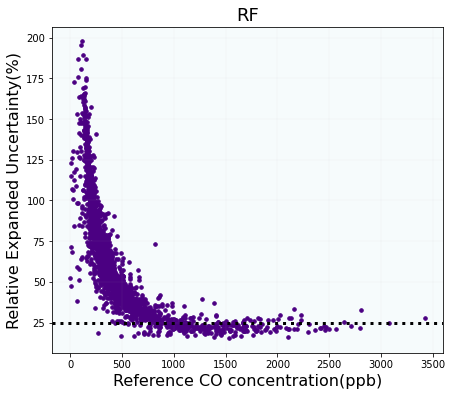

In [86]:
u_cal=REF(pred,y_test,1.4)
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.1)
ind=[]
U_cal=[]
Ref=[]
for i in range(len(u_cal)):
    if u_cal[i]<200:
        U_cal.append(u_cal[i])
        Ref.append(y_test[i])
plt.scatter(Ref,U_cal, color='#4B0082',marker='.',s=50)
plt.axhline(y=25, color='black', linestyle=':',linewidth=3)
plt.ylabel('Relative Expanded Uncertainty(%)', fontsize=16)
plt.xlabel('Reference CO concentration(ppb)',fontsize=16)
plt.grid(linestyle='-.',linewidth=0.1)
plt.title('RF', fontsize=18)
plt.show()

In [87]:
u_r=0.15
U=np.sqrt(np.mean((u_r*np.array(y_test))**2))
RMSE=np.sqrt(np.mean((np.array(pred)-np.array(y_test))**2))
ind=RMSE/(2*U)
ind

0.6058140736059071

In [88]:
A=[i for i in np.arange(1,3,0.05)]
B=[]
for i in A:
    k=REF2(pred,y_test,i,30000)
    B.append(k)
for i in range(len(B)):
    if B[i]==min(B):
        print(A[i])

1.3000000000000003


In [89]:
REF2(pred,y_test,1.3,30000)

24.36972146945551

In [90]:
import random
alpha=1.4
LV=max(y_test)
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/LV)*100
Random=(2*(P1+P2)**0.5/LV)*100



import random
alpha=1.4
LV2=7000
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV2)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV2)**2
P3=(Beta_0+(Beta_1-1)*LV2)
P=P1+P2+P3
Bias2=(2*(P3)/LV2)*100
Random2=(2*(P1+P2)**0.5/LV2)*100


import random
alpha=1.4
LV1=30000
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV1)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV1)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV1)**2
P3=(Beta_0+(Beta_1-1)*LV1)
P=P1+P2+P3
Bias1=(2*(P3)/(LV1))*100
Random1=(2*(P1+P2)**0.5/(LV1))*100

In [94]:
import random
alpha=1.4
LV=CO_Mean#sorted(y_test)[int(0.25*len(sorted(y_test)))]
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/LV)*100
Random=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV2=CO_UQ#sorted(y_test)[int(0.5*len(sorted(y_test)))]
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV2)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV2)**2
P3=(Beta_0+(Beta_1-1)*LV2)
P=P1+P2+P3
Bias2=(2*(P3)/LV2)*100
Random2=(2*(P1+P2)**0.5/LV2)*100


import random
alpha=1.4
LV1=CO_Max#sorted(y_test)[int(0.75*len(sorted(y_test)))]
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV1)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV1)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV1)**2
P3=(Beta_0+(Beta_1-1)*LV1)
P=P1+P2+P3
Bias1=(2*(P3)/(LV1))*100
Random1=(2*(P1+P2)**0.5/(LV1))*100

In [103]:
Lim_val=10000
DQO_Mean=25*(Lim_val/CO_Mean)
DQO_Max=25*(Lim_val/CO_Max)
DQO_UQ=25*(Lim_val/CO_UQ)
DQO_Mean,DQO_UQ,DQO_Max
CO_Max

3424.3903333333333

<ipython-input-46-6842ed1662bc>:32: RuntimeWarning: divide by zero encountered in true_divide
  A=(2*(np.array(P))**0.5/ref)*100
<ipython-input-46-6842ed1662bc>:36: RuntimeWarning: divide by zero encountered in true_divide
  B=(2*(np.array(P3))/ref)*100
<ipython-input-46-6842ed1662bc>:40: RuntimeWarning: divide by zero encountered in true_divide
  part1=(Beta_0/ref)*100


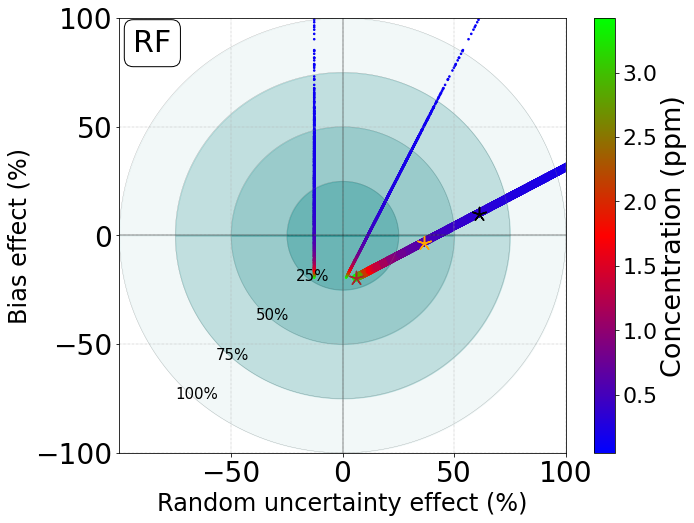

In [96]:
A4=target(pred,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =25
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =100
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))

plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='teal', alpha=0.3)
plt.fill_between(a2, b2, color='teal',alpha=0.2)
plt.fill_between(a3, b3, color='teal',alpha=0.2)
plt.fill_between(a4, b4, color='teal',alpha=0.05)

x1=np.arange(0,25.1,0.1)
r1=25
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,100.1,0.1)
r4=100
y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=0.2, color='grey')
plt.plot(x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(x2,y2, linewidth=0.2, color='grey')
plt.plot(x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(x3,y3, linewidth=0.2, color='grey')
plt.plot(x3,-1*y3, linewidth=0.2, color='grey')
plt.plot(x4,y4, linewidth=0.2, color='grey')
plt.plot(x4,-1*y4, linewidth=0.2, color='grey')

plt.plot(-1*x1,y1, linewidth=0.2, color='grey')
plt.plot(-1*x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(-1*x2,y2, linewidth=0.2, color='grey')
plt.plot(-1*x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(-1*x3,y3, linewidth=0.2, color='grey')
plt.plot(-1*x3,-1*y3, linewidth=0.2, color='grey')
plt.plot(-1*x4,y4, linewidth=0.2, color='grey')
plt.plot(-1*x4,-1*y4, linewidth=0.2, color='grey')

plt.xlabel('Random uncertainty effect (%)',fontsize=24)
plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title('CO',fontsize=18)
color_map = plt.cm.get_cmap('brg')
reversed_color_map = color_map
plt.scatter(A4[0],A4[1],marker='.',s=200,c=np.array(A4[2])/1000,cmap=reversed_color_map)
plt.scatter(A4[3],A4[1],marker='.',s=10,c=np.array(A4[2])/1000,cmap=reversed_color_map)
plt.scatter(A4[4],A4[1],marker='.',s=10,c=np.array(A4[2])/1000,cmap=reversed_color_map)
plt.vlines([0], -130, 130,color='black',linewidth=0.4)
plt.hlines([0], -130, 130, color='black',linewidth=0.4)
plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-100)
plt.ylim(ymax=100)
plt.xlim(xmax=100)
plt.xlim(xmin=-100)
plt.xticks(np.arange(-50,101, 50),fontsize=28)
plt.yticks(np.arange(-100,101, 50),fontsize=28)
#plt.colorbar()
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=22)
cbar.set_label('Concentration (ppm)', rotation=90,fontsize=27)
plt.scatter(Random,Bias,marker=(5, 2),s=200, color='black')
plt.scatter(Random1,Bias1,marker=(5, 2),s=200, color='brown')
plt.scatter(Random2,Bias2,marker=(5, 2),s=200, color='orange')
textstr = 'RF'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.18, 1.35, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)
plt.text(-21,-21, '25%',fontsize=15)
plt.text(-39,-39, '50%',fontsize=15)
plt.text(-57,-57, '75%',fontsize=15)
plt.text(-75,-75, '100%',fontsize=15)
plt.show()

In [582]:
A=[i for i in np.arange(1,3,0.05)]
B=[]
for i in A:
    k=REF2(pred,y_test,i,30000)
    B.append(k)
for i in range(len(B)):
    if B[i]==min(B):
        print(A[i])

1.3500000000000003


In [583]:
np.std(pred),np.std(y_test)

(426.3382825251323, 450.7371650417704)

X_Train, X_Test, y_Train, y_Test =train_test_split(X, y, test_size = 0.001)
REU_CO=[]
for i in range(1,30):
    regressor=regressor.fit(X_train[:120*i].drop(['Lab1'], axis=1), y_train[:120*i])
    pred = regressor.predict(X_test.drop(['Lab1'], axis=1))
    reu=REF2(pred,y_test,1.35,30000)
    REU_CO.append(reu) 

## Model 5: ANN

In [584]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn.preprocessing import StandardScaler
model = Sequential()
model.add(Dense(3, input_shape = (6,),kernel_initializer='normal', activation= 'linear'))
model.add(Dense(128,kernel_initializer='normal', activation= 'relu'))
model.add(Dense(128, kernel_initializer='normal',activation= 'relu'))
model.add(Dense(100, kernel_initializer='normal',activation= 'relu'))
model.add(Dense(1,kernel_initializer='normal',activation='linear',))
sgd = optimizers.Adam(learning_rate=0.01)

model.compile(optimizer = sgd, loss = 'mean_squared_error', metrics= ['mse', 'mae'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 3)                 21        
_________________________________________________________________
dense_39 (Dense)             (None, 128)               512       
_________________________________________________________________
dense_40 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_41 (Dense)             (None, 100)               12900     
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 101       
Total params: 30,046
Trainable params: 30,046
Non-trainable params: 0
_________________________________________________________________


In [585]:
scaler = StandardScaler()
scaler.fit(X_train.drop(['Lab1'], axis=1))
X_train_scaled=scaler.transform(X_train.drop(['Lab1'], axis=1))
X_test_scaled=scaler.transform(X_test.drop(['Lab1'], axis=1))
hist=model.fit(X_train_scaled, y_train, batch_size= 10, epochs=40, verbose= 0)#,validation_split=0.2

In [586]:
train_pred = model.predict(X_train_scaled)
test_pred = model.predict(X_test_scaled)
pred=[]
for i in range(len(test_pred)):
    pred.append(sum(list(test_pred[i])))
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_ann_CO=sMAPE_lr
RMSE_ann_CO=round(RMSE_lr/np.mean(np.array(y_test)),2)
Pearson_ann_CO=Pearson_lr
R2_ann_CO=round(sm.r2_score(y_test, pred), 2)
RMSE_Ann_CO=RMSE_lr

fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='tomato',linewidth=3)
plt.plot(index,lab1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'ANN-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.74,1))
plt.ylabel('CO Concentration(ppb)',fontsize=18)
#plt.text(B-200, C, r'$R^{2}(ANN)=$'+str(R2_ann_CO), fontsize = 14, color='tomato')
#plt.text(B-200, D, r'$R^{2}(Lab)=$'+str(R2_lab_CO), fontsize = 14, color='#426eff')
#plt.text(B-800, C, 'Pearson r(ANN)='+str(Pearson_lr), fontsize = 14, color='tomato')
#plt.text(B-800, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('ANN Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [587]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))
pred_ann=pred
MBE_ANN_CO=MBE(pred,y_test)/np.std(y_test)
CRMSE_ANN_CO=CRMSE(y_test,pred)/np.std(y_test)

Regressor model performance:
Mean absolute error(MAE) = 88.42
Mean squared error(MSE) = 21628.62
Median absolute error = 50.38
Explain variance score = 0.89
R2 score = 0.89


In [588]:
len(pred_ann)

2322

fig= plt.figure(figsize=(50,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index[A:],y_test[A:], color='limegreen',linewidth=3)
plt.plot(index[A:],lab1[A:], color='#426eff',linewidth=3)
plt.plot(index[A:],pred_lr[A:], color='goldenrod',linewidth=3)
plt.plot(index[A:],pred_svr[A:], color='brown',linewidth=3)
plt.plot(index[A:],pred_rf[A:], color='indigo',linewidth=3)
plt.plot(index[A:],pred_ann[A:], color='tomato',linewidth=3)

plt.xlabel('Last 200 hours of testing period',fontsize=18)
plt.ylabel('CO Concentration(ppb)',fontsize=18)
plt.legend(['Ref', 'LAB', 'LR','SVR','RF','ANN'], loc = 2, bbox_to_anchor = (0.95,1))
#plt.title('CO Sensor',fontsize=18 )
plt.grid(linestyle='-.',linewidth=0.3)

Text(0.5, 1.0, 'ANN')

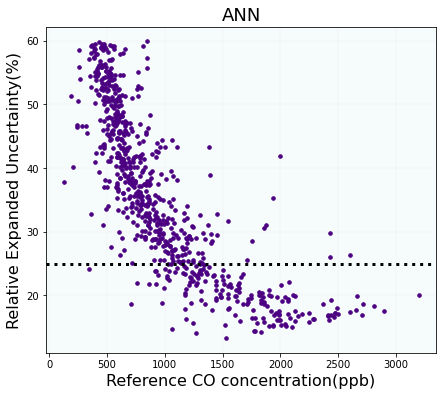

In [589]:
u_cal=REF(pred,y_test,1.4)
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.1)
ind=[]
U_cal=[]
Ref=[]
for i in range(len(u_cal)):
    if u_cal[i]<60:
        U_cal.append(u_cal[i])
        Ref.append(y_test[i])
plt.scatter(Ref,U_cal, color='#4B0082',marker='.',s=50)
plt.axhline(y=25, color='black', linestyle=':',linewidth=3)
plt.ylabel('Relative Expanded Uncertainty(%)', fontsize=16)
plt.xlabel('Reference CO concentration(ppb)',fontsize=16)
plt.grid(linestyle='-.',linewidth=0.1)
plt.title('ANN', fontsize=18)

In [590]:
REF2(pred,y_test,1,30000)

14.020937923453975

In [591]:
import random
alpha=1.4
LV=max(y_test)
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/LV)*100
Random=(2*(P1+P2)**0.5/LV)*100


import random
alpha=1.4
LV2=7000
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV2)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV2)**2
P3=(Beta_0+(Beta_1-1)*LV2)
P=P1+P2+P3
Bias2=(2*(P3)/LV2)*100
Random2=(2*(P1+P2)**0.5/LV2)*100

import random
alpha=1.4
LV1=30000
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV1)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV1)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV1)**2
P3=(Beta_0+(Beta_1-1)*LV1)
P=P1+P2+P3
Bias1=(2*(P3)/(LV1))*100
Random1=(2*(P1+P2)**0.5/(LV1))*100


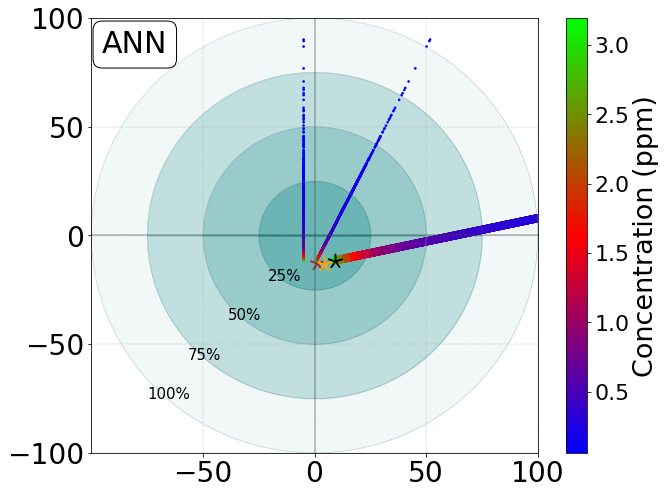

In [592]:
A5=target(pred,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =25
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =100
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))

plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='teal', alpha=0.3)
plt.fill_between(a2, b2, color='teal',alpha=0.2)
plt.fill_between(a3, b3, color='teal',alpha=0.2)
plt.fill_between(a4, b4, color='teal',alpha=0.05)

x1=np.arange(0,25.1,0.1)
r1=25
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,100.1,0.1)
r4=100
y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=0.2, color='grey')
plt.plot(x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(x2,y2, linewidth=0.2, color='grey')
plt.plot(x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(x3,y3, linewidth=0.2, color='grey')
plt.plot(x3,-1*y3, linewidth=0.2, color='grey')
plt.plot(x4,y4, linewidth=0.2, color='grey')
plt.plot(x4,-1*y4, linewidth=0.2, color='grey')

plt.plot(-1*x1,y1, linewidth=0.2, color='grey')
plt.plot(-1*x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(-1*x2,y2, linewidth=0.2, color='grey')
plt.plot(-1*x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(-1*x3,y3, linewidth=0.2, color='grey')
plt.plot(-1*x3,-1*y3, linewidth=0.2, color='grey')
plt.plot(-1*x4,y4, linewidth=0.2, color='grey')
plt.plot(-1*x4,-1*y4, linewidth=0.2, color='grey')

#plt.xlabel('Random uncertainty effect (%)',fontsize=24)
#plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title('CO',fontsize=18)
color_map = plt.cm.get_cmap('brg')
reversed_color_map = color_map
plt.scatter(A5[0],A5[1],marker='.',s=200,c=np.array(A5[2])/1000,cmap=reversed_color_map)
plt.scatter(A5[3],A5[1],marker='.',s=10,c=np.array(A5[2])/1000,cmap=reversed_color_map)
plt.scatter(A5[4],A5[1],marker='.',s=10,c=np.array(A5[2])/1000,cmap=reversed_color_map)
plt.vlines([0], -130, 130,color='black',linewidth=0.4)
plt.hlines([0], -130, 130, color='black',linewidth=0.4)
plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-100)
plt.ylim(ymax=100)
plt.xlim(xmax=100)
plt.xlim(xmin=-100)
plt.xticks(np.arange(-50,101, 50),fontsize=28)
plt.yticks(np.arange(-100,101, 50),fontsize=28)
#plt.colorbar()
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=22)
cbar.set_label('Concentration (ppm)', rotation=90,fontsize=27)
plt.scatter(Random,Bias,marker=(5, 2),s=200, color='black')
plt.scatter(Random1,Bias1,marker=(5, 2),s=200, color='brown')
plt.scatter(Random2,Bias2,marker=(5, 2),s=200, color='orange')
textstr = 'ANN'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.1, 1.26, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)
plt.text(-21,-21, '25%',fontsize=15)
plt.text(-39,-39, '50%',fontsize=15)
plt.text(-57,-57, '75%',fontsize=15)
plt.text(-75,-75, '100%',fontsize=15)
plt.show()

In [593]:
A=[i for i in np.arange(1,3,0.05)]
B=[]
for i in A:
    k=REF2(pred,y_test,i,30000)
    B.append(k)
for i in range(len(B)):
    if B[i]==min(B):
        print(A[i])

1.5500000000000005


# Model 6: XGBoost

In [594]:
from xgboost import  XGBRegressor
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
# create an xgboost regression model
#n_estimators=10000, max_depth=5, eta=0.01, subsample=0.9,colsample_bytree=0.4,alpha=10
model = XGBRegressor(n_estimators=10000, max_depth=5, eta=0.01, subsample=0.9, 
                     colsample_bytree=0.4,alpha=10)
model.fit(X_train.drop(['Lab1'], axis=1), y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, eta=0.01, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [595]:
pred = model.predict(X_test.drop(['Lab1'], axis=1))
pred_xgb_co=pred
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_xgb_CO=sMAPE_lr
RMSE_xgb_CO=RMSE_lr/np.mean(np.array(y_test))
Pearson_xgb_CO=Pearson_lr
R2_xgb_CO=round(sm.r2_score(y_test, pred), 2)
RMSE_Xgb_CO=RMSE_lr

In [596]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))
pred_xgb=pred
MBE_XGB_CO=MBE(pred,y_test)/np.std(y_test)
CRMSE_XGB_CO=CRMSE(y_test,pred)/np.std(y_test)

Regressor model performance:
Mean absolute error(MAE) = 83.28
Mean squared error(MSE) = 18451.31
Median absolute error = 50.6
Explain variance score = 0.91
R2 score = 0.91


Text(0.5, 1.0, 'XGBoost')

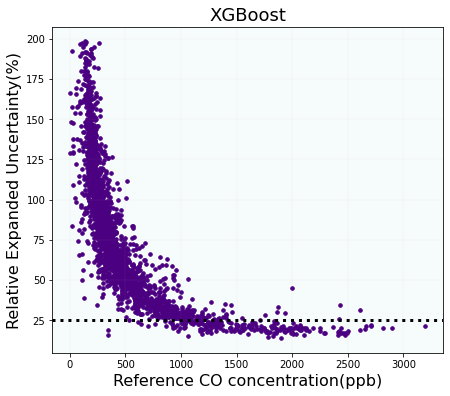

In [597]:
u_cal=REF(pred,y_test,1.4)
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.1)
ind=[]
U_cal=[]
Ref=[]
for i in range(len(u_cal)):
    if u_cal[i]<200:
        U_cal.append(u_cal[i])
        Ref.append(y_test[i])
plt.scatter(Ref,U_cal, color='#4B0082',marker='.',s=50)
plt.axhline(y=25, color='black', linestyle=':',linewidth=3)
plt.ylabel('Relative Expanded Uncertainty(%)', fontsize=16)
plt.xlabel('Reference CO concentration(ppb)',fontsize=16)
plt.grid(linestyle='-.',linewidth=0.1)
plt.title('XGBoost', fontsize=18)

In [598]:
import random
alpha=1.4
LV=5000
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/LV)*100
Random=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV2=7000
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV2)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV2)**2
P3=(Beta_0+(Beta_1-1)*LV2)
P=P1+P2+P3
Bias2=(2*(P3)/LV2)*100
Random2=(2*(P1+P2)**0.5/LV2)*100

import random
alpha=1.4
LV1=30000
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV1)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV1)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV1)**2
P3=(Beta_0+(Beta_1-1)*LV1)
P=P1+P2+P3
Bias1=(2*(P3)/(LV1))*100
Random1=(2*(P1+P2)**0.5/(LV1))*100

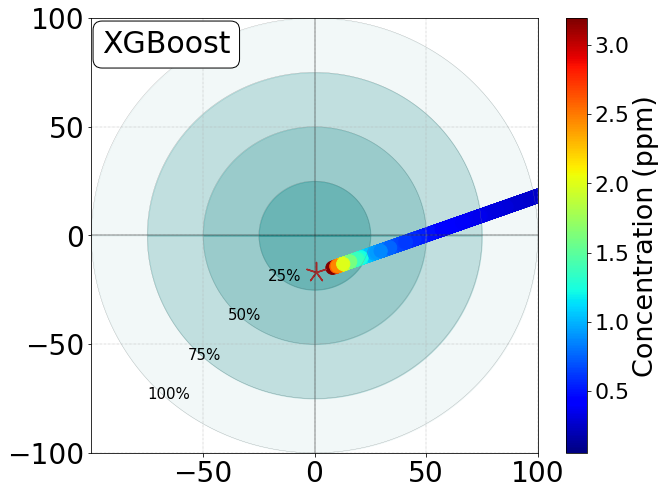

In [599]:
A6=target(pred,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =25
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =100
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))

plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='teal', alpha=0.3)
plt.fill_between(a2, b2, color='teal',alpha=0.2)
plt.fill_between(a3, b3, color='teal',alpha=0.2)
plt.fill_between(a4, b4, color='teal',alpha=0.05)

x1=np.arange(0,25.1,0.1)
r1=25
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,100.1,0.1)
r4=100
y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=0.2, color='grey')
plt.plot(x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(x2,y2, linewidth=0.2, color='grey')
plt.plot(x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(x3,y3, linewidth=0.2, color='grey')
plt.plot(x3,-1*y3, linewidth=0.2, color='grey')
plt.plot(x4,y4, linewidth=0.2, color='grey')
plt.plot(x4,-1*y4, linewidth=0.2, color='grey')

plt.plot(-1*x1,y1, linewidth=0.2, color='grey')
plt.plot(-1*x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(-1*x2,y2, linewidth=0.2, color='grey')
plt.plot(-1*x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(-1*x3,y3, linewidth=0.2, color='grey')
plt.plot(-1*x3,-1*y3, linewidth=0.2, color='grey')
plt.plot(-1*x4,y4, linewidth=0.2, color='grey')
plt.plot(-1*x4,-1*y4, linewidth=0.2, color='grey')

#plt.xlabel('Random uncertainty effect (%)',fontsize=24)
#plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title('CO',fontsize=18)
color_map = plt.cm.get_cmap('jet')
reversed_color_map= color_map
#plt.scatter(A1[0],A1[1],marker='.',s=20,c=np.array(A1[2])/1000,cmap=color_map)
#plt.scatter(A2[0],A2[1],marker='.',s=20,c=np.array(A2[2])/1000,cmap=reversed_color_map)
#plt.scatter(A3[0],A3[1],marker='.',s=20,c=np.array(A3[2])/1000,cmap=reversed_color_map)
#plt.scatter(A4[0],A4[1],marker='.',s=20,c=np.array(A4[2])/1000,cmap=reversed_color_map)
#plt.scatter(A5[0],A5[1],marker='.',s=20,c=np.array(A5[2])/1000,cmap=reversed_color_map)
plt.scatter(A6[0],A6[1],marker='.',s=700,c=np.array(A6[2])/1000,cmap=reversed_color_map)
#plt.scatter(A[3],A[1],marker='.',s=10,c=np.array(A[2])/1000,cmap=reversed_color_map)
#plt.scatter(A[4],A[1],marker='.',s=10,c=np.array(A[2])/1000,cmap=reversed_color_map)
plt.vlines([0], -130, 130,color='black',linewidth=0.4)
plt.hlines([0], -130, 130, color='black',linewidth=0.4)
plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-100)
plt.ylim(ymax=100)
plt.xlim(xmax=100)
plt.xlim(xmin=-100)
plt.xticks(np.arange(-50,101, 50),fontsize=28)
plt.yticks(np.arange(-100,101, 50),fontsize=28)
#plt.colorbar()
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=22)
cbar.set_label('Concentration (ppm)', rotation=90,fontsize=27)
#plt.scatter(Random,Bias,marker=(5, 2),s=200, color='black')
plt.scatter(Random1,Bias1,marker=(5, 2),s=400, color='brown')
#plt.scatter(Random2,Bias2,marker=(5, 2),s=200, color='orange')
textstr = 'XGBoost'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.1, 1.26, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)
plt.text(-21,-21, '25%',fontsize=15)
plt.text(-39,-39, '50%',fontsize=15)
plt.text(-57,-57, '75%',fontsize=15)
plt.text(-75,-75, '100%',fontsize=15)
plt.show()

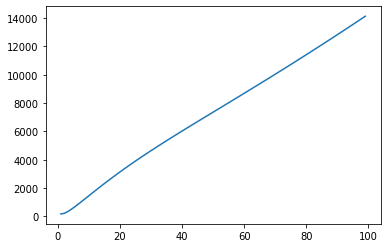

In [600]:
B=[]
for i in range(1,100):
    U=REF2(Lab1,y_test,i,30000)
    B.append(U)
ind=[i for i in range(1,100)]
plt.plot(ind,B)

In [601]:
A=[i for i in np.arange(1,3,0.05)]
B=[]
for i in A:
    k=REF2(pred,y_test,i,30000)
    B.append(k)
for i in range(len(B)):
    if B[i]==min(B):
        print(A[i])

1.4000000000000004


# NO2 Calibration

In [602]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('O3.txt', header = None,low_memory=False)
data.columns=['AE','WE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref']=Ref_O3
WE=Data_O3['WE'].to_list()
AE=Data_O3['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
data = pd.read_csv('Conc_O3.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna() 
O3_Data=O3_Data.resample('h').mean()
O3_Data=O3_Data.dropna()
O3_Data.head()

ref_O3=Data_O3['Ref'].to_list()
len(ref_O3)

60913

In [603]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('NO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_NO2=data
Data_NO2['Ref']=Ref_NO2
WE=Data_NO2['WE'].to_list()
AE=Data_NO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_NO2['Net Signal']=signal
Data_NO2['Month']=Data_NO2.index.month
Data_NO2['Day_of_week']=Data_NO2.index.dayofweek
Data_NO2['Day']=Data_NO2.index.day
Data_NO2['Hour']=Data_NO2.index.hour
NO2_Data=Data_NO2
NO2_Data=NO2_Data[(NO2_Data[NO2_Data.columns] >= 0).all(axis=1)]
NO2_Data=NO2_Data.dropna()
data = pd.read_csv('Conc_NO2.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉") 
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_NO2=data
signal=np.array(WE)-np.array(AE)
Data_NO2['Net Signal']=signal
Data_NO2['Month']=Data_NO2.index.month
Data_NO2['Day_of_week']=Data_NO2.index.dayofweek
Data_NO2['Day']=Data_NO2.index.day
Data_NO2['Hour']=Data_NO2.index.hour
Data_NO2['Ref_O3']=ref_O3
NO2_Data=Data_NO2
NO2_Data=NO2_Data[(NO2_Data[NO2_Data.columns] >= 0).all(axis=1)]
NO2_Data=NO2_Data.dropna()
NO2_Data=NO2_Data.resample('20min').mean()
NO2_Data=NO2_Data.dropna()
NO2_Data.head()

Lab1       Temp         RH        Ref  Net Signal  \
Date                                                                           
2019-10-02 11:40:00  460.448301  26.378438  58.063437  15.230400    7.850000   
2019-10-02 12:00:00  794.371300  25.632544  48.527009   6.653971   25.045773   
2019-10-02 12:20:00   82.998996  26.120078  47.716553   2.844210   13.152720   
2019-10-02 15:40:00  566.301152  30.418466  50.153181  10.084125    9.323533   
2019-10-03 15:40:00   84.482370  29.421250  52.411845  12.621282   22.596524   

                     Month  Day_of_week  Day  Hour     Ref_O3  
Date                                                           
2019-10-02 11:40:00   10.0          2.0  2.0  11.0  46.094860  
2019-10-02 12:00:00   10.0          2.0  2.0  12.0  56.858942  
2019-10-02 12:20:00   10.0          2.0  2.0  12.0  58.880540  
2019-10-02 15:40:00   10.0          2.0  2.0  15.0  40.068225  
2019-10-03 15:40:00   10.0          3.0  3.0  15.0  33.473237

In [604]:
def REF(pred,y_test,alpha):
    import random
    cal=np.array(pred)
    ref=np.array(y_test.to_list())
    ref_mean=np.mean(ref)
    cal_mean=np.mean(cal)
    prec=np.array([0.4 for i in range(len(ref))])
    u=np.maximum(prec,0.005*ref)
    #cal=np.log(cal)
    #ref=np.log(ref)
    sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
    sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
    sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
    beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
    beta_0=cal_mean-beta_1*ref_mean
    RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*u**2)
    du_s=RSS/(len(cal)-2)
    Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
    Beta_0=cal_mean-Beta_1*ref_mean
    P1=(RSS/(len(cal)-2))
    P2=(Beta_1**2+alpha)*u**2+(-2*Beta_1**2+2*Beta_1-1)*u**2
    P3=(Beta_0+(Beta_1-1)*ref)**2
    P=[]
    for i in range(len(P3)):
        P.append(P1+P2[i]+P3[i])
    for i in range(len(P)):
        if P[i]<0:
            P[i]=random.randint(1,100)
    u_cal=(2*np.sqrt(np.array(P))/cal)*100
    #u_cal=((2*np.sqrt((RSS/(len(cal)-2))+(1-(beta_1-1)**2)*(0.08*ref)**2+(Beta_0+(Beta_1-1)*ref)**2))/cal)*100
    return u_cal  

In [605]:
def REF2(pred,y_test,alpha,LV):
    import random
    cal=np.array(pred)
    ref=np.array(y_test.to_list())
    ref_mean=np.mean(ref)
    cal_mean=np.mean(cal)
    prec=np.array([0.4 for i in range(len(ref))])
    u=0.001*ref
    #cal=np.log(cal)
    #ref=np.log(ref)
    sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
    sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
    sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
    #beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
    beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
    beta_0=cal_mean-beta_1*ref_mean
    RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
    du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
    Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
    Beta_0=cal_mean-Beta_1*ref_mean
    P1=(RSS/(len(cal)-2))
    P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
    P3=(Beta_0+(Beta_1-1)*LV)**2
    P=P1+P2+P3
    if P<0:
        P=random.randint(1,100)
    u_cal=(2*np.sqrt(P)/(Beta_0+Beta_1*LV))*100
    #u_cal=((2*np.sqrt((RSS/(len(cal)-2))+(1-(beta_1-1)**2)*0.1+(Beta_0+(Beta_1-1)*ref)**2))/cal)*100
    return u_cal  

In [606]:
def target(pred,y_test,alpha):
    import random
    cal=np.array(pred)
    ref=np.array(y_test.to_list())
    ref_mean=np.mean(ref)
    cal_mean=np.mean(cal)
    prec=np.array([0.4 for i in range(len(ref))])
    u=np.maximum(prec, 0.005*ref)
    #u=0.01*ref
    #cal=np.log(cal)
    #ref=np.log(ref)
    sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
    sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
    sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
    #beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
    beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
    beta_0=cal_mean-beta_1*ref_mean
    RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*u**2)
    du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
    Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
    Beta_0=cal_mean-Beta_1*ref_mean
    P1=(RSS/(len(cal)-2))
    P2=(Beta_1**2+alpha)*u**2+(-2*Beta_1**2+2*Beta_1-1)*u**2
    P3=(Beta_0+(Beta_1-1)*ref)
    P=[]
    for i in range(len(P2)):
        P.append(P1+P2[i])
    for i in range(len(P)):
        if P[i]<0:
            P[i]=random.randint(1,50)
    A=(2*(np.array(P))**0.5/ref)*100
    #for i in range(len(P3)):
        #if P3[i]<0:
            #P3[i]=random.randint(0,50)
    B=(2*(np.array(P3))/ref)*100
    bias=[]
    random=[]
    Ref=[]
    part1=(Beta_0/ref)*100
    part=[beta_1-1 for i in range(len(ref))]
    part2=(np.array(part))*100
    PART1=[]
    PART2=[]
    for i in range(len(A)):
        if A[i]<500:
            random.append(A[i])
            bias.append(B[i])
            Ref.append(ref[i])
            PART1.append(part1[i])
            PART2.append(part2[i])
    return [random,bias,Ref, PART1,PART2]

In [607]:
#Ref=NO2_Data['Ref'].to_list()
#NO2_Data=NO2_Data[NO2_Data.Ref.between(np.mean(Ref)-1*np.std(Ref), np.mean(Ref)+1*np.std(Ref))]
#NO2_Data.shape

## Model 1: Linear Regression (LR)

In [608]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#'Ref_CO','Ref_SO2','Ref_O3',
#,'Month','Day_of_week','Day','Hour'
X=NO2_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour','Ref_O3']]#'Ref_O3'
y=NO2_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
len(X_test)

2185

In [609]:
lr = LinearRegression()
model = lr.fit(X_train.drop(['Lab1'], axis=1), y_train)
pred = model.predict(X_test.drop(['Lab1'], axis=1))
lab1=X_test['Lab1'].to_list()
for i in range(len(lab1)):
    if lab1[i]>100:
        lab1[i]=np.mean(lab1)
index=[i for i in range(len(y_test))]
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =index)
Y_test
Pred=pd.Series(pred,index =index)
Lab1=pd.Series(lab1,index =index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_lr_NO2=sMAPE_lr
RMSE_lr_NO2=round(RMSE_lr/np.mean(np.array(y_test)),2)
Pearson_lr_NO2=Pearson_lr
sMAPE_lab_NO2=sMAPE_lab
RMSE_lab_NO2=round(RMSE_lab/np.mean(np.array(lab1)),2)
Pearson_lab_NO2=Pearson_lab
R2_lr_NO2=round(sm.r2_score(y_test, pred), 2)
R2_lab_NO2=round(sm.r2_score(y_test, lab1), 2)
RMSE_Lr_NO2=RMSE_lr
RMSE_Lab_NO2=RMSE_lab

A=len(y_test)-200
B=120
D=max(y_test[A:])-0.15*max(y_test[A:])
C=max(y_test[A:])-0.05*max(y_test[A:])
Pearson_lr_NO2,R2_lr_NO2,RMSE_Lr_NO2

(0.9, 0.81, 5.2)

subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
fig= plt.figure(figsize=(8,6))
index=[i for i in range(1,201)]
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='#513e00',linewidth=3)
plt.plot(index,lab1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'LR-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.75,1))
plt.ylabel('NO2 Concentration(ppb)'.translate(subscript),fontsize=18)
#plt.text(B-150, C,r'$R^{2}(LR)=$'+str(R2_lr_NO2) , fontsize = 14, color='#513e00')
#plt.text(B-150, D,r'$R^{2}(Lab)=$'+str(R2_lab_NO2) , fontsize = 14, color='#426eff')
#plt.text(B-700, C, 'Pearson r(LR)='+str(Pearson_lr), fontsize = 14, color='#513e00')
#plt.text(B-700, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Linear Regression Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [610]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_LR_NO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_LR_NO2=CRMSE(y_test,pred)/np.std(y_test)
MBE_LAB_NO2=MBE(lab1,y_test)/(2.6*np.std(y_test))
CRMSE_LAB_NO2=CRMSE(y_test,lab1)/(2.6*np.std(y_test))
pred_lr=pred

Regressor model performance:
Mean absolute error(MAE) = 4.03
Mean squared error(MSE) = 26.95
Median absolute error = 3.37
Explain variance score = 0.81
R2 score = 0.81


In [611]:
import random
alpha=1.4
LV=max(y_test)
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(lab1)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([0.4 for i in range(len(ref))])
u=0.005*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/LV)*100
Random=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV1=200
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(lab1)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([0.4 for i in range(len(ref))])
u=0.005*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV1)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV1)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV1)**2
P3=(Beta_0+(Beta_1-1)*LV1)
P=P1+P2+P3
Bias1=(2*(P3)/(LV1))*100
Random1=(2*(P1+P2)**0.5/(LV1))*100

In [612]:
A=target(lab1,y_test,1.4)

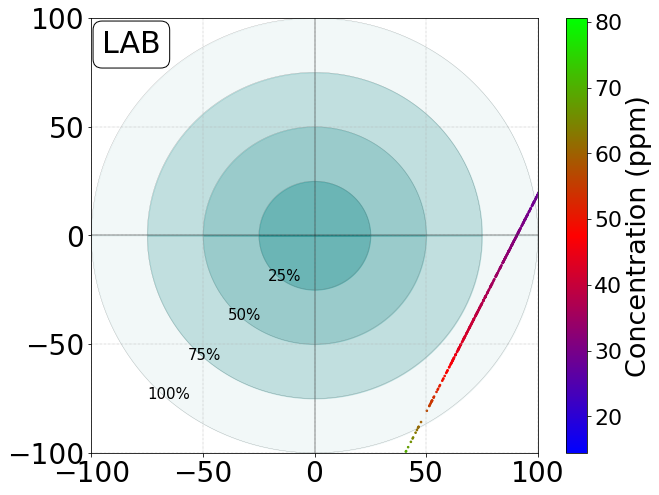

In [613]:
A=target(lab1,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =25
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =100
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))

plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='teal', alpha=0.3)
plt.fill_between(a2, b2, color='teal',alpha=0.2)
plt.fill_between(a3, b3, color='teal',alpha=0.2)
plt.fill_between(a4, b4, color='teal',alpha=0.05)

x1=np.arange(0,25.1,0.1)
r1=25
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,100.1,0.1)
r4=100
y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=0.2, color='grey')
plt.plot(x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(x2,y2, linewidth=0.2, color='grey')
plt.plot(x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(x3,y3, linewidth=0.2, color='grey')
plt.plot(x3,-1*y3, linewidth=0.2, color='grey')
plt.plot(x4,y4, linewidth=0.2, color='grey')
plt.plot(x4,-1*y4, linewidth=0.2, color='grey')

plt.plot(-1*x1,y1, linewidth=0.2, color='grey')
plt.plot(-1*x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(-1*x2,y2, linewidth=0.2, color='grey')
plt.plot(-1*x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(-1*x3,y3, linewidth=0.2, color='grey')
plt.plot(-1*x3,-1*y3, linewidth=0.2, color='grey')
plt.plot(-1*x4,y4, linewidth=0.2, color='grey')
plt.plot(-1*x4,-1*y4, linewidth=0.2, color='grey')

#plt.xlabel('Random uncertainty effect (%)',fontsize=24)
#plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title('CO',fontsize=18)
color_map = plt.cm.get_cmap('brg')
reversed_color_map = color_map
plt.scatter(A[0],A[1],marker='.',s=200,c=np.array(A[2]),cmap=reversed_color_map)
plt.scatter(A[3],A[1],marker='.',s=10,c=np.array(A[2]),cmap=reversed_color_map)
plt.scatter(A[4],A[1],marker='.',s=10,c=np.array(A[2]),cmap=reversed_color_map)
plt.vlines([0], -130, 130,color='black',linewidth=0.4)
plt.hlines([0], -130, 130, color='black',linewidth=0.4)
plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-100)
plt.ylim(ymax=100)
plt.xlim(xmax=100)
plt.xlim(xmin=-100)
plt.xticks(np.arange(-100,101, 50),fontsize=28)
plt.yticks(np.arange(-100,101, 50),fontsize=28)
#plt.colorbar()
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=22)
cbar.set_label('Concentration (ppm)', rotation=90,fontsize=27)
plt.scatter(Random,Bias,marker=(5, 2),s=200, color='black')
plt.scatter(Random1+2,Bias1,marker=(5, 2),s=200, color='brown')
textstr = 'LAB'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.1, 1.26, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)
plt.text(-21,-21, '25%',fontsize=15)
plt.text(-39,-39, '50%',fontsize=15)
plt.text(-57,-57, '75%',fontsize=15)
plt.text(-75,-75, '100%',fontsize=15)
plt.show()

In [614]:
import random
alpha=1.4
LV=100
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([0.4 for i in range(len(ref))])
u=0.005*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/LV)*100
Random=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV2=140
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([0.4 for i in range(len(ref))])
u=0.005*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV2)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV2)**2
P3=(Beta_0+(Beta_1-1)*LV2)
P=P1+P2+P3
Bias2=(2*(P3)/LV2)*100
Random2=(2*(P1+P2)**0.5/LV2)*100


import random
alpha=1.4
LV1=200
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([0.4 for i in range(len(ref))])
u=0.005*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV1)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV1)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV1)**2
P3=(Beta_0+(Beta_1-1)*LV1)
P=P1+P2+P3
Bias1=(2*(P3)/(LV1))*100
Random1=(2*(P1+P2)**0.5/(LV1))*100

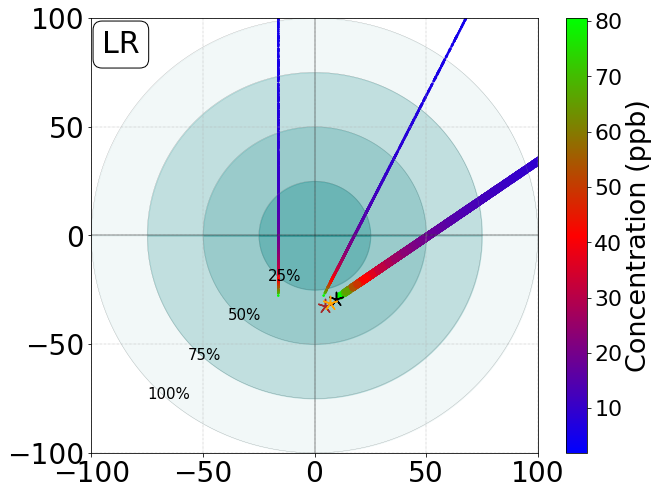

In [615]:
A=target(pred,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =25
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =100
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))

plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='teal', alpha=0.3)
plt.fill_between(a2, b2, color='teal',alpha=0.2)
plt.fill_between(a3, b3, color='teal',alpha=0.2)
plt.fill_between(a4, b4, color='teal',alpha=0.05)

x1=np.arange(0,25.1,0.1)
r1=25
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,100.1,0.1)
r4=100
y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=0.2, color='grey')
plt.plot(x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(x2,y2, linewidth=0.2, color='grey')
plt.plot(x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(x3,y3, linewidth=0.2, color='grey')
plt.plot(x3,-1*y3, linewidth=0.2, color='grey')
plt.plot(x4,y4, linewidth=0.2, color='grey')
plt.plot(x4,-1*y4, linewidth=0.2, color='grey')

plt.plot(-1*x1,y1, linewidth=0.2, color='grey')
plt.plot(-1*x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(-1*x2,y2, linewidth=0.2, color='grey')
plt.plot(-1*x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(-1*x3,y3, linewidth=0.2, color='grey')
plt.plot(-1*x3,-1*y3, linewidth=0.2, color='grey')
plt.plot(-1*x4,y4, linewidth=0.2, color='grey')
plt.plot(-1*x4,-1*y4, linewidth=0.2, color='grey')

#plt.xlabel('Random uncertainty effect (%)',fontsize=24)
#plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title('CO',fontsize=18)
color_map = plt.cm.get_cmap('brg')
reversed_color_map = color_map
plt.scatter(A[0],A[1],marker='.',s=200,c=np.array(A[2]),cmap=reversed_color_map)
plt.scatter(A[3],A[1],marker='.',s=10,c=np.array(A[2]),cmap=reversed_color_map)
plt.scatter(A[4],A[1],marker='.',s=10,c=np.array(A[2]),cmap=reversed_color_map)
plt.vlines([0], -130, 130,color='black',linewidth=0.4)
plt.hlines([0], -130, 130, color='black',linewidth=0.4)
plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-100)
plt.ylim(ymax=100)
plt.xlim(xmax=100)
plt.xlim(xmin=-100)
plt.xticks(np.arange(-100,101, 50),fontsize=28)
plt.yticks(np.arange(-100,101, 50),fontsize=28)
#plt.colorbar()
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=22)
cbar.set_label('Concentration (ppb)', rotation=90,fontsize=27)
plt.scatter(Random,Bias,marker=(5, 2),s=200, color='black')
plt.scatter(Random1,Bias1,marker=(5, 2),s=200, color='brown')
plt.scatter(Random2,Bias2,marker=(5, 2),s=200, color='orange')
textstr = 'LR'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.1, 1.26, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)
plt.text(-21,-21, '25%',fontsize=15)
plt.text(-39,-39, '50%',fontsize=15)
plt.text(-57,-57, '75%',fontsize=15)
plt.text(-75,-75, '100%',fontsize=15)
plt.show()

## Model 2: Support Vector Regression (SVR)

In [616]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
regressor = SVR(kernel = 'poly')
regressor.fit(X_train.drop(['Lab1'], axis=1), y_train)
pred = regressor.predict(X_test.drop(['Lab1'], axis=1))
for i in range(len(Pred)):
    if pred[i]<0:
        pred[i]=np.mean(np.array(pred))

In [617]:
Index=[i for i in range(len(y_test))]
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_svr_NO2=sMAPE_lr
RMSE_svr_NO2=round(RMSE_lr/np.mean(np.array(y_test)),2)
Pearson_svr_NO2=Pearson_lr
R2_svr_NO2=round(sm.r2_score(y_test, pred), 2)
RMSE_Svr_NO2=RMSE_lr
Pearson_svr_NO2,R2_svr_NO2,RMSE_Svr_NO2

(0.92, 0.85, 4.7)

fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='brown',linewidth=3)
plt.plot(index,lab1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'SVR-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.74,1))
plt.ylabel('NO2 Concentration(ppb)'.translate(subscript),fontsize=18)
#plt.text(B-150, C, r'$R^{2}(SVR)=$'+str(R2_svr_NO2), fontsize = 14, color='brown')
#plt.text(B-150, D, r'$R^{2}(Lab)=$'+str(R2_lab_NO2), fontsize = 14, color='#426eff')
#plt.text(B-700, C, 'Pearson r(SVR)='+str(Pearson_lr), fontsize = 14, color='brown')
#plt.text(B-700, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Support Vector Regression (SVR) Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [618]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_SVR_NO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_SVR_NO2=CRMSE(y_test,pred)/np.std(y_test)
pred_svr=pred

Regressor model performance:
Mean absolute error(MAE) = 3.45
Mean squared error(MSE) = 22.22
Median absolute error = 2.62
Explain variance score = 0.85
R2 score = 0.85


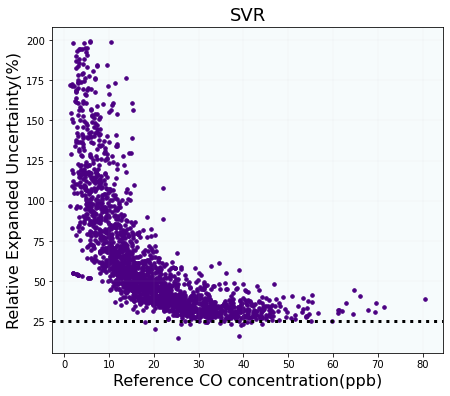

In [619]:
u_cal=REF(pred,y_test,1.3)
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.1)
ind=[]
U_cal=[]
Ref=[]
for i in range(len(u_cal)):
    if -50<u_cal[i]<200:
        U_cal.append(u_cal[i])
        Ref.append(y_test[i])
plt.scatter(Ref,U_cal, color='#4B0082',marker='.',s=50)
plt.axhline(y=25, color='black', linestyle=':',linewidth=3)
plt.ylabel('Relative Expanded Uncertainty(%)', fontsize=16)
plt.xlabel('Reference CO concentration(ppb)',fontsize=16)
plt.grid(linestyle='-.',linewidth=0.1)
plt.title('SVR', fontsize=18)
plt.show()

In [620]:
import random
alpha=1.4
LV=100
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([0.4 for i in range(len(ref))])
u=0.005*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/LV)*100
Random=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV2=140
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([0.4 for i in range(len(ref))])
u=0.005*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV2)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV2)**2
P3=(Beta_0+(Beta_1-1)*LV2)
P=P1+P2+P3
Bias2=(2*(P3)/LV2)*100
Random2=(2*(P1+P2)**0.5/LV2)*100

import random
alpha=1.4
LV1=200
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([0.4 for i in range(len(ref))])
u=0.005*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV1)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV1)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV1)**2
P3=(Beta_0+(Beta_1-1)*LV1)
P=P1+P2+P3
Bias1=(2*(P3)/(LV1))*100
Random1=(2*(P1+P2)**0.5/(LV1))*100

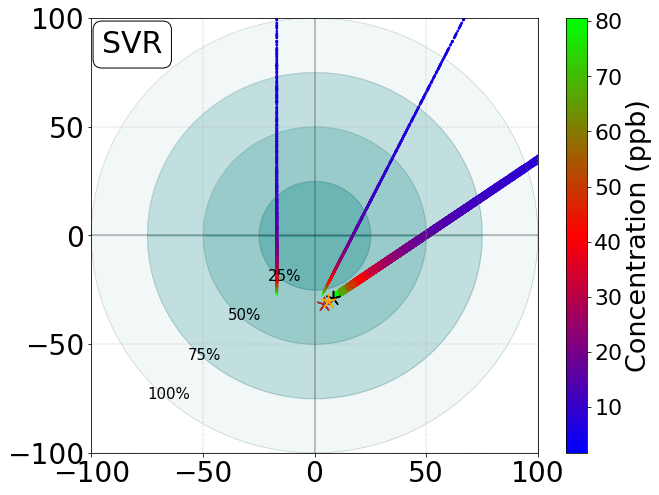

In [621]:
A=target(pred,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =25
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =100
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))

plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='teal', alpha=0.3)
plt.fill_between(a2, b2, color='teal',alpha=0.2)
plt.fill_between(a3, b3, color='teal',alpha=0.2)
plt.fill_between(a4, b4, color='teal',alpha=0.05)

x1=np.arange(0,25.1,0.1)
r1=25
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,100.1,0.1)
r4=100
y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=0.2, color='grey')
plt.plot(x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(x2,y2, linewidth=0.2, color='grey')
plt.plot(x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(x3,y3, linewidth=0.2, color='grey')
plt.plot(x3,-1*y3, linewidth=0.2, color='grey')
plt.plot(x4,y4, linewidth=0.2, color='grey')
plt.plot(x4,-1*y4, linewidth=0.2, color='grey')

plt.plot(-1*x1,y1, linewidth=0.2, color='grey')
plt.plot(-1*x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(-1*x2,y2, linewidth=0.2, color='grey')
plt.plot(-1*x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(-1*x3,y3, linewidth=0.2, color='grey')
plt.plot(-1*x3,-1*y3, linewidth=0.2, color='grey')
plt.plot(-1*x4,y4, linewidth=0.2, color='grey')
plt.plot(-1*x4,-1*y4, linewidth=0.2, color='grey')

#plt.xlabel('Random uncertainty effect (%)',fontsize=24)
#plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title('CO',fontsize=18)
color_map = plt.cm.get_cmap('brg')
reversed_color_map = color_map
plt.scatter(A[0],A[1],marker='.',s=200,c=np.array(A[2]),cmap=reversed_color_map)
plt.scatter(A[3],A[1],marker='.',s=10,c=np.array(A[2]),cmap=reversed_color_map)
plt.scatter(A[4],A[1],marker='.',s=10,c=np.array(A[2]),cmap=reversed_color_map)
plt.vlines([0], -130, 130,color='black',linewidth=0.4)
plt.hlines([0], -130, 130, color='black',linewidth=0.4)
plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-100)
plt.ylim(ymax=100)
plt.xlim(xmax=100)
plt.xlim(xmin=-100)
plt.xticks(np.arange(-100,101, 50),fontsize=28)
plt.yticks(np.arange(-100,101, 50),fontsize=28)
#plt.colorbar()
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=22)
cbar.set_label('Concentration (ppb)', rotation=90,fontsize=27)
plt.scatter(Random,Bias,marker=(5, 2),s=200, color='black')
plt.scatter(Random1,Bias1,marker=(5, 2),s=200, color='brown')
plt.scatter(Random2,Bias2,marker=(5, 2),s=200, color='orange')
textstr = 'SVR'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.1, 1.26, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)
plt.text(-21,-21, '25%',fontsize=15)
plt.text(-39,-39, '50%',fontsize=15)
plt.text(-57,-57, '75%',fontsize=15)
plt.text(-75,-75, '100%',fontsize=15)
plt.show()

## Model 3: Random Forest

In [622]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 500,min_samples_split= 2,min_samples_leaf= 1,
                                  max_features= 'sqrt', 
                                  random_state = 0,max_depth=None,bootstrap=False)
  
# fit the regressor with x and y data
regressor.fit(X_train.drop(['Lab1'], axis=1), y_train)  

RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=500,
                      random_state=0)

In [623]:
Index=[i for i in range(len(y_test))]
features_NO2=regressor.feature_importances_
pred = regressor.predict(X_test.drop(['Lab1'], axis=1))
pred_rf_no2=pred
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_rf_NO2=sMAPE_lr
RMSE_rf_NO2=round(RMSE_lr/np.mean(np.array(y_test)),2)
Pearson_rf_NO2=Pearson_lr
R2_rf_NO2=round(sm.r2_score(y_test, pred), 2)
RMSE_Rf_NO2=RMSE_lr
Pearson_rf_NO2,R2_rf_NO2,RMSE_Rf_NO2

(0.97, 0.94, 2.9)

fig= plt.figure(figsize=(10,5))

ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='indigo',linewidth=3)
plt.plot(index,lab1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'RF-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.79,1))
plt.ylabel('NO2 Concentration(ppb)'.translate(subscript),fontsize=18)
plt.text(B-15, C,r'$R^{2}(RF)=$'+str(R2_rf_NO2) , fontsize = 14, color='indigo')
plt.text(B-15, D,r'$R^{2}(Lab)=$'+str(R2_lab_NO2) , fontsize = 14, color='#426eff')
plt.text(B-73, C, 'Pearson r(RF)='+str(Pearson_lr), fontsize = 14, color='indigo')
plt.text(B-73, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Random Forest(RF) Calibration vs Laboratory Calibration',fontsize=18)
plt.xlabel('Last 100 hours of testing period',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [624]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_RF_NO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_RF_NO2=CRMSE(y_test,pred)/np.std(y_test)
pred_rf=pred

Regressor model performance:
Mean absolute error(MAE) = 2.05
Mean squared error(MSE) = 8.18
Median absolute error = 1.49
Explain variance score = 0.94
R2 score = 0.94


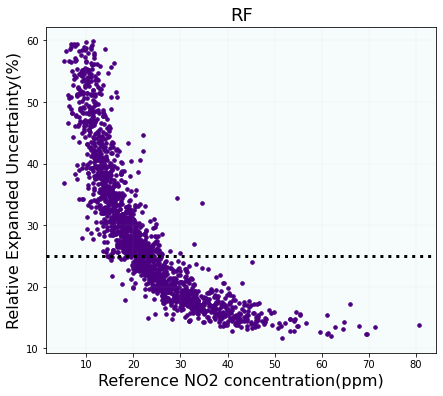

In [625]:
u_cal=REF(pred,y_test,1.3)
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.1)
ind=[]
U_cal=[]
Ref=[]
for i in range(len(u_cal)):
    if -50<u_cal[i]<60:
        U_cal.append(u_cal[i])
        Ref.append(y_test[i])
plt.scatter(Ref,U_cal, color='#4B0082', marker='.',s=50 )
plt.axhline(y=25, color='black', linestyle=':',linewidth=3)
plt.ylabel('Relative Expanded Uncertainty(%)', fontsize=16)
plt.xlabel('Reference NO2 concentration(ppm)',fontsize=16)
plt.grid(linestyle='-.',linewidth=0.1)
plt.title('RF', fontsize=18)
plt.show()

In [626]:
import random
alpha=1.4
LV=100
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([0.4 for i in range(len(ref))])
u=0.005*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/LV)*100
Random=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV2=140
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([0.4 for i in range(len(ref))])
u=0.005*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV2)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV2)**2
P3=(Beta_0+(Beta_1-1)*LV2)
P=P1+P2+P3
Bias2=(2*(P3)/LV2)*100
Random2=(2*(P1+P2)**0.5/LV2)*100

import random
alpha=1.4
LV1=200
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([0.4 for i in range(len(ref))])
u=0.005*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV1)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV1)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV1)**2
P3=(Beta_0+(Beta_1-1)*LV1)
P=P1+P2+P3
Bias1=(2*(P3)/(LV1))*100
Random1=(2*(P1+P2)**0.5/(LV1))*100

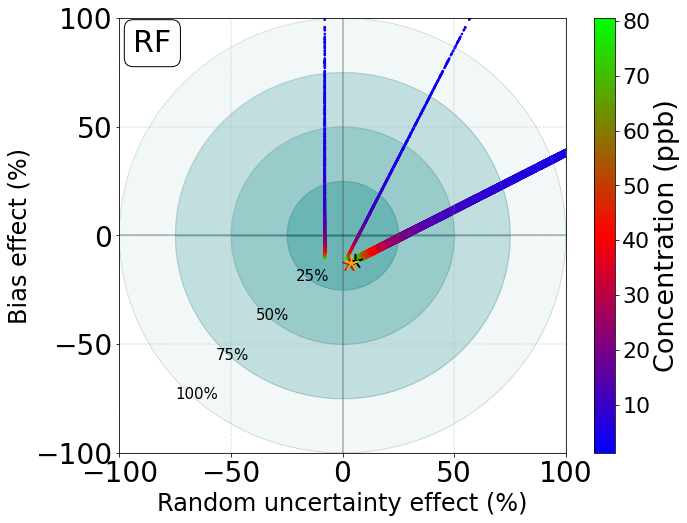

In [627]:
A=target(pred,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =25
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =100
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))

plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='teal', alpha=0.3)
plt.fill_between(a2, b2, color='teal',alpha=0.2)
plt.fill_between(a3, b3, color='teal',alpha=0.2)
plt.fill_between(a4, b4, color='teal',alpha=0.05)

x1=np.arange(0,25.1,0.1)
r1=25
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,100.1,0.1)
r4=100
y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=0.2, color='grey')
plt.plot(x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(x2,y2, linewidth=0.2, color='grey')
plt.plot(x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(x3,y3, linewidth=0.2, color='grey')
plt.plot(x3,-1*y3, linewidth=0.2, color='grey')
plt.plot(x4,y4, linewidth=0.2, color='grey')
plt.plot(x4,-1*y4, linewidth=0.2, color='grey')

plt.plot(-1*x1,y1, linewidth=0.2, color='grey')
plt.plot(-1*x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(-1*x2,y2, linewidth=0.2, color='grey')
plt.plot(-1*x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(-1*x3,y3, linewidth=0.2, color='grey')
plt.plot(-1*x3,-1*y3, linewidth=0.2, color='grey')
plt.plot(-1*x4,y4, linewidth=0.2, color='grey')
plt.plot(-1*x4,-1*y4, linewidth=0.2, color='grey')

plt.xlabel('Random uncertainty effect (%)',fontsize=24)
plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title('CO',fontsize=18)
color_map = plt.cm.get_cmap('brg')
reversed_color_map = color_map
plt.scatter(A[0],A[1],marker='.',s=200,c=np.array(A[2]),cmap=reversed_color_map)
plt.scatter(A[3],A[1],marker='.',s=10,c=np.array(A[2]),cmap=reversed_color_map)
plt.scatter(A[4],A[1],marker='.',s=10,c=np.array(A[2]),cmap=reversed_color_map)
plt.vlines([0], -130, 130,color='black',linewidth=0.4)
plt.hlines([0], -130, 130, color='black',linewidth=0.4)
plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-100)
plt.ylim(ymax=100)
plt.xlim(xmax=100)
plt.xlim(xmin=-100)
plt.xticks(np.arange(-100,101, 50),fontsize=28)
plt.yticks(np.arange(-100,101, 50),fontsize=28)
#plt.colorbar()
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=22)
cbar.set_label('Concentration (ppb)', rotation=90,fontsize=27)
plt.scatter(Random,Bias,marker=(5, 2),s=200, color='black')
plt.scatter(Random1,Bias1,marker=(5, 2),s=200, color='brown')
plt.scatter(Random2,Bias2,marker=(5, 2),s=200, color='orange')
textstr = 'RF'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.18, 1.35, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)
plt.text(-21,-21, '25%',fontsize=15)
plt.text(-39,-39, '50%',fontsize=15)
plt.text(-57,-57, '75%',fontsize=15)
plt.text(-75,-75, '100%',fontsize=15)

plt.show()

In [628]:
cal=np.array(pred)
ref=np.array(y_test.to_list())
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
    #cal=np.log(cal)
    #ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+1)*(0.08*ref)**2)
du_s=RSS/(len(cal)-2)
Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(-2*Beta_1**2+2*Beta_1-1)*(0.08*40)**2
P3=(Beta_0+(Beta_1-1)*40)**2
P1,P2,P3

(1.67102464920488, -9.216420266312635, 1.0918980436207701)

In [629]:
A=[i for i in np.arange(1,20,0.1)]
K=[]
for i in A:
    k=REF2(pred,y_test,i,200)
    K.append(k)
for i in range(len(K)):
    if K[i]==min(K):
        print(A[i])

1.3000000000000003


## Model 4 : ANN

In [630]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn.preprocessing import StandardScaler
model = Sequential()
model.add(Dense(6, input_shape = (7,),kernel_initializer='normal', activation= 'linear'))
model.add(Dense(128,kernel_initializer='normal', activation= 'relu'))
model.add(Dense(128, kernel_initializer='normal',activation= 'relu'))
model.add(Dense(100, kernel_initializer='normal',activation= 'relu'))
model.add(Dense(1,kernel_initializer='normal',activation='linear',))
sgd = optimizers.Adam(learning_rate=0.01)

model.compile(optimizer = sgd, loss = 'mean_squared_error', metrics= ['mse', 'mae'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 6)                 48        
_________________________________________________________________
dense_44 (Dense)             (None, 128)               896       
_________________________________________________________________
dense_45 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_46 (Dense)             (None, 100)               12900     
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 101       
Total params: 30,457
Trainable params: 30,457
Non-trainable params: 0
_________________________________________________________________


In [631]:
scaler = StandardScaler()
scaler.fit(X_train.drop(['Lab1'], axis=1))
X_train_scaled=scaler.transform(X_train.drop(['Lab1'], axis=1))
X_test_scaled=scaler.transform(X_test.drop(['Lab1'], axis=1))
model.fit(X_train_scaled, y_train, batch_size= 100, epochs=100, verbose= 0)

In [632]:
train_pred = model.predict(X_train_scaled)
test_pred = model.predict(X_test_scaled)
pred=[]
for i in range(len(test_pred)):
    pred.append(sum(list(test_pred[i])))
len(y_test)

2185

In [633]:
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_ann_NO2=sMAPE_lr
RMSE_ann_NO2=round(RMSE_lr/np.mean(np.array(y_test)),2)
Pearson_ann_NO2=Pearson_lr
R2_ann_NO2=round(sm.r2_score(y_test, pred), 2)
RMSE_Ann_NO2=RMSE_lr
Pearson_ann_NO2,R2_ann_NO2,RMSE_Ann_NO2

(0.97, 0.93, 3.2)

fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='tomato',linewidth=3)
plt.plot(index,lab1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'ANN-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.74,1))
plt.ylabel('NO2 Concentration(ppb)',fontsize=18)
#plt.text(B-150, C, r'$R^{2}(ANN)=$'+str(R2_ann_NO2), fontsize = 14, color='tomato')
#plt.text(B-150, D, r'$R^{2}(Lab)=$'+str(R2_lab_NO2), fontsize = 14, color='#426eff')
#plt.text(B-700, C, 'Pearson r(ANN)='+str(Pearson_lr), fontsize = 14, color='tomato')
#plt.text(B-700, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title(' Artificial Neural Network(ANN)  Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [634]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_ANN_NO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_ANN_NO2=CRMSE(y_test,pred)/(np.std(y_test))
pred_ann=pred

Regressor model performance:
Mean absolute error(MAE) = 2.34
Mean squared error(MSE) = 10.04
Median absolute error = 1.75
Explain variance score = 0.93
R2 score = 0.93


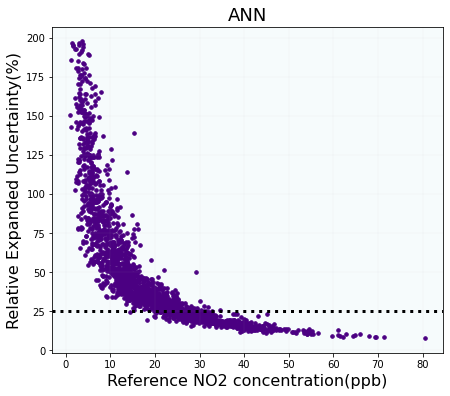

In [635]:
u_cal=REF(pred,y_test,1.3)
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.1)
ind=[]
U_cal=[]
Ref=[]
for i in range(len(u_cal)):
    if -50<u_cal[i]<200:
        U_cal.append(u_cal[i])
        Ref.append(y_test[i])
plt.scatter(Ref,U_cal, color='#4B0082',marker='.',s=50)
plt.axhline(y=25, color='black', linestyle=':',linewidth=3)
plt.ylabel('Relative Expanded Uncertainty(%)', fontsize=16)
plt.xlabel('Reference NO2 concentration(ppb)',fontsize=16)
plt.grid(linestyle='-.',linewidth=0.1)
plt.title('ANN', fontsize=18)
plt.show()

In [636]:
import random
alpha=1.4
LV=100
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([0.4 for i in range(len(ref))])
u=0.005*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/LV)*100
Random=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV2=140
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([0.4 for i in range(len(ref))])
u=0.005*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV2)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV2)**2
P3=(Beta_0+(Beta_1-1)*LV2)
P=P1+P2+P3
Bias2=(2*(P3)/LV2)*100
Random2=(2*(P1+P2)**0.5/LV2)*100

import random
alpha=1.4
LV1=200
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([0.4 for i in range(len(ref))])
u=0.005*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV1)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV1)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV1)**2
P3=(Beta_0+(Beta_1-1)*LV1)
P=P1+P2+P3
Bias1=(2*(P3)/(LV1))*100
Random1=(2*(P1+P2)**0.5/(LV1))*100

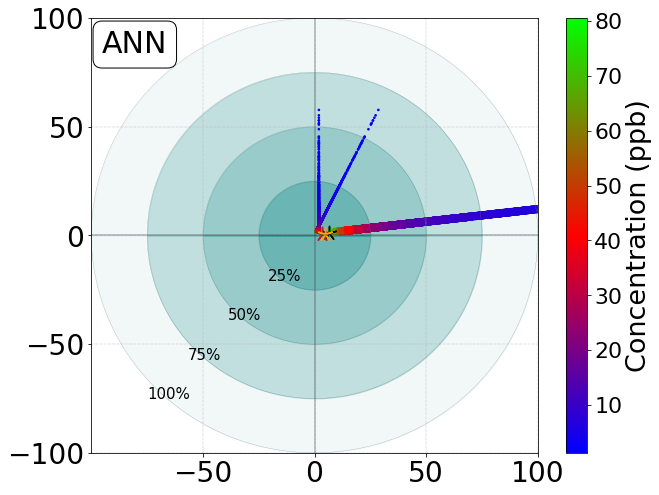

In [637]:
A=target(pred,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =25
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =100
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))

plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='teal', alpha=0.3)
plt.fill_between(a2, b2, color='teal',alpha=0.2)
plt.fill_between(a3, b3, color='teal',alpha=0.2)
plt.fill_between(a4, b4, color='teal',alpha=0.05)

x1=np.arange(0,25.1,0.1)
r1=25
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,100.1,0.1)
r4=100
y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=0.2, color='grey')
plt.plot(x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(x2,y2, linewidth=0.2, color='grey')
plt.plot(x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(x3,y3, linewidth=0.2, color='grey')
plt.plot(x3,-1*y3, linewidth=0.2, color='grey')
plt.plot(x4,y4, linewidth=0.2, color='grey')
plt.plot(x4,-1*y4, linewidth=0.2, color='grey')

plt.plot(-1*x1,y1, linewidth=0.2, color='grey')
plt.plot(-1*x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(-1*x2,y2, linewidth=0.2, color='grey')
plt.plot(-1*x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(-1*x3,y3, linewidth=0.2, color='grey')
plt.plot(-1*x3,-1*y3, linewidth=0.2, color='grey')
plt.plot(-1*x4,y4, linewidth=0.2, color='grey')
plt.plot(-1*x4,-1*y4, linewidth=0.2, color='grey')

#plt.xlabel('Random uncertainty effect (%)',fontsize=24)
#plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title('CO',fontsize=18)
color_map = plt.cm.get_cmap('brg')
reversed_color_map = color_map
plt.scatter(A[0],A[1],marker='.',s=200,c=np.array(A[2]),cmap=reversed_color_map)
plt.scatter(A[3],A[1],marker='.',s=10,c=np.array(A[2]),cmap=reversed_color_map)
plt.scatter(A[4],A[1],marker='.',s=10,c=np.array(A[2]),cmap=reversed_color_map)
plt.vlines([0], -130, 130,color='black',linewidth=0.4)
plt.hlines([0], -130, 130, color='black',linewidth=0.4)
plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-100)
plt.ylim(ymax=100)
plt.xlim(xmax=100)
plt.xlim(xmin=-100)
plt.xticks(np.arange(-50,101, 50),fontsize=28)
plt.yticks(np.arange(-100,101, 50),fontsize=28)
#plt.colorbar()
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=22)
cbar.set_label('Concentration (ppb)', rotation=90,fontsize=27)
plt.scatter(Random,Bias,marker=(5, 2),s=200, color='black')
plt.scatter(Random1,Bias1,marker=(5, 2),s=200, color='brown')
plt.scatter(Random2,Bias2,marker=(5, 2),s=200, color='orange')
textstr = 'ANN'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.1, 1.26, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)
plt.text(-21,-21, '25%',fontsize=15)
plt.text(-39,-39, '50%',fontsize=15)
plt.text(-57,-57, '75%',fontsize=15)
plt.text(-75,-75, '100%',fontsize=15)
plt.show()

# Model 5: XGBoost

In [638]:
from xgboost import  XGBRegressor
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
# create an xgboost regression model
#n_estimators=10000, max_depth=5, eta=0.01, subsample=0.9,colsample_bytree=0.4,alpha=10
model = XGBRegressor(n_estimators=10000, max_depth=5, eta=0.01, subsample=0.9, 
                     colsample_bytree=0.4,alpha=10)
model.fit(X_train.drop(['Lab1'], axis=1),y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, eta=0.01, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [639]:
pred = model.predict(X_test.drop(['Lab1'], axis=1))
pred_xgb_no2=pred
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_xgb_NO2=sMAPE_lr
RMSE_xgb_NO2=RMSE_lr/np.mean(np.array(y_test))
Pearson_xgb_NO2=Pearson_lr
R2_xgb_NO2=round(sm.r2_score(y_test, pred), 2)
RMSE_Xgb_NO2=RMSE_lr
Pearson_xgb_NO2,R2_xgb_NO2,RMSE_Xgb_NO2

(0.96, 0.93, 3.2)

fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='darkgoldenrod',linewidth=3)
plt.plot(index,lab1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'XGBoost-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.69,1))
plt.ylabel('NO2 Concentration(ppb)'.translate(subscript),fontsize=18)
#plt.text(B-150, C, r'$R^{2}(XGB)=$'+str(R2_xgb_NO2), fontsize = 14, color='darkgoldenrod')
#plt.text(B-150, D, r'$R^{2}(Lab)=$'+str(R2_lab_NO2), fontsize = 14, color='#426eff')
#plt.text(B-700, C, 'Pearson r(XGB)='+str(Pearson_lr), fontsize = 14, color='darkgoldenrod')
#plt.text(B-700, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('XGBoost  Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [640]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_XGB_NO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_XGB_NO2=CRMSE(y_test,pred)/np.std(y_test)
pred_xgb=pred

Regressor model performance:
Mean absolute error(MAE) = 2.39
Mean squared error(MSE) = 10.54
Median absolute error = 1.76
Explain variance score = 0.93
R2 score = 0.93


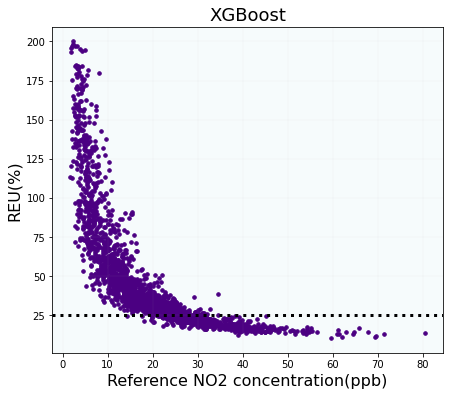

In [641]:
u_cal=REF(pred,y_test,1.3)
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.1)
ind=[]
U_cal=[]
Ref=[]
for i in range(len(u_cal)):
    if -50<u_cal[i]<200:
        U_cal.append(u_cal[i])
        Ref.append(y_test[i])
plt.scatter(Ref,U_cal, color='#4B0082',marker='.',s=50)
plt.axhline(y=25, color='black', linestyle=':',linewidth=3)
plt.ylabel('REU(%)', fontsize=16)
plt.xlabel('Reference NO2 concentration(ppb)',fontsize=16)
plt.grid(linestyle='-.',linewidth=0.1)
plt.title('XGBoost', fontsize=18)
plt.show()

In [642]:
import random
alpha=1.4
LV=100
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([0.4 for i in range(len(ref))])
u=0.005*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/LV)*100
Random=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV2=140
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([0.4 for i in range(len(ref))])
u=0.005*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV2)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV2)**2
P3=(Beta_0+(Beta_1-1)*LV2)
P=P1+P2+P3
Bias2=(2*(P3)/LV2)*100
Random2=(2*(P1+P2)**0.5/LV2)*100

import random
alpha=1.4
LV1=200
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([0.4 for i in range(len(ref))])
u=0.005*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV1)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV1)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV1)**2
P3=(Beta_0+(Beta_1-1)*LV1)
P=P1+P2+P3
Bias1=(2*(P3)/(LV1))*100
Random1=(2*(P1+P2)**0.5/(LV1))*100

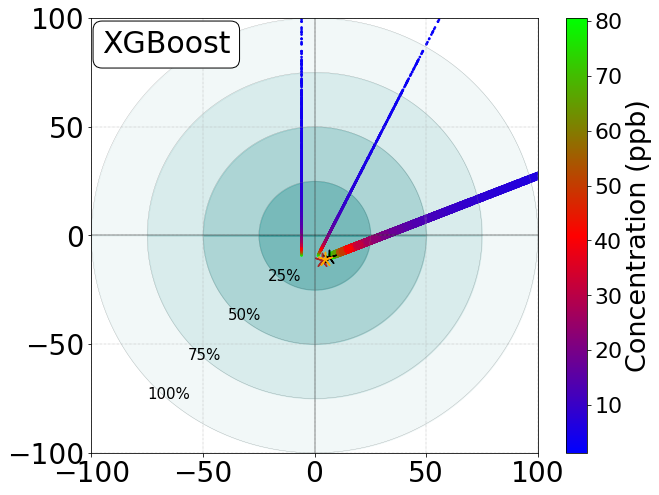

In [643]:
A=target(pred,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =25
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =100
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))

plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='teal', alpha=0.3)
plt.fill_between(a2, b2, color='teal',alpha=0.2)
plt.fill_between(a3, b3, color='teal',alpha=0.1)
plt.fill_between(a4, b4, color='teal',alpha=0.05)

x1=np.arange(0,25.1,0.1)
r1=25
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,100.1,0.1)
r4=100
y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=0.2, color='grey')
plt.plot(x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(x2,y2, linewidth=0.2, color='grey')
plt.plot(x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(x3,y3, linewidth=0.2, color='grey')
plt.plot(x3,-1*y3, linewidth=0.2, color='grey')
plt.plot(x4,y4, linewidth=0.2, color='grey')
plt.plot(x4,-1*y4, linewidth=0.2, color='grey')

plt.plot(-1*x1,y1, linewidth=0.2, color='grey')
plt.plot(-1*x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(-1*x2,y2, linewidth=0.2, color='grey')
plt.plot(-1*x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(-1*x3,y3, linewidth=0.2, color='grey')
plt.plot(-1*x3,-1*y3, linewidth=0.2, color='grey')
plt.plot(-1*x4,y4, linewidth=0.2, color='grey')
plt.plot(-1*x4,-1*y4, linewidth=0.2, color='grey')

#plt.xlabel('Random uncertainty effect (%)',fontsize=24)
#plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title('CO',fontsize=18)
color_map = plt.cm.get_cmap('brg')
reversed_color_map = color_map
plt.scatter(A[0],A[1],marker='.',s=200,c=np.array(A[2]),cmap=reversed_color_map)
plt.scatter(A[3],A[1],marker='.',s=10,c=np.array(A[2]),cmap=reversed_color_map)
plt.scatter(A[4],A[1],marker='.',s=10,c=np.array(A[2]),cmap=reversed_color_map)
plt.vlines([0], -130, 130,color='black',linewidth=0.4)
plt.hlines([0], -130, 130, color='black',linewidth=0.4)
plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-100)
plt.ylim(ymax=100)
plt.xlim(xmax=100)
plt.xlim(xmin=-100)
plt.xticks(np.arange(-100,101, 50),fontsize=28)
plt.yticks(np.arange(-100,101, 50),fontsize=28)
#plt.colorbar()
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=22)
cbar.set_label('Concentration (ppb)', rotation=90,fontsize=27)
plt.scatter(Random,Bias,marker=(5, 2),s=200, color='black')
plt.scatter(Random1,Bias1,marker=(5, 2),s=200, color='brown')
plt.scatter(Random2,Bias2,marker=(5, 2),s=200, color='orange')
textstr = 'XGBoost'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.1, 1.26, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)
plt.text(-21,-21, '25%',fontsize=15)
plt.text(-39,-39, '50%',fontsize=15)
plt.text(-57,-57, '75%',fontsize=15)
plt.text(-75,-75, '100%',fontsize=15)
plt.show()

 # SO2 Calibration

In [644]:
import pandas as pd
Ref=pd.read_csv('Ref.csv')
Ref["CO"] = 1000 * Ref["CO"]
Ref['Date'] = pd.to_datetime(Ref['Date_Time'])
Ref=Ref.set_index('Date')
Ref.drop('Date_Time',axis = 1, inplace = True)
Ref=Ref.resample('5min').mean()
Ref=Ref[76463:137376]
Ref_CO=Ref['CO'].to_list()
Ref_NO2=Ref['NO2'].to_list()
Ref_SO2=Ref['SO2'].to_list()
Ref_O3=Ref['O3'].to_list()

import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('SO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_SO2['Ref']=Ref_SO2
WE=Data_SO2['WE'].to_list()
AE=Data_SO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna() 
data = pd.read_csv('Conc_SO2.txt', header = None,low_memory=False)
data.columns=['Lab2','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
signal=np.array(WE)-np.array(AE)
Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna()
SO2_Data=SO2_Data.resample('h').mean()
SO2_Data=SO2_Data.dropna()
SO2_Data.head()

In [645]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('Conc_SO2.txt', header = None,low_memory=False)
data.columns=['Lab2','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_so2=data
signal=np.array(WE)-np.array(AE)
Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data=SO2_Data.resample('5min').mean()
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna() 
data = pd.read_csv('SO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_SO2['Ref']=Ref_SO2
WE=Data_SO2['WE'].to_list()
AE=Data_SO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_SO2['Lab2']=Data_so2['Lab2'].to_list()
Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna()
CO_Data=CO_Data.resample('20min').mean()
CO_Data=CO_Data.dropna()
SO2_Data.head()

WE          AE       Temp         RH       Ref  \
Date                                                                          
2019-10-10 04:15:00  342.991196  342.255475  18.268917  81.793083  1.085790   
2019-10-10 04:45:00  345.767413  342.543745  18.359000  82.451958  1.163473   
2019-10-10 04:50:00  343.919310  342.689191  18.348826  82.572044  1.200187   
2019-10-10 04:55:00  343.377326  342.448811  18.353612  82.675760  1.312772   
2019-10-10 05:00:00  343.358621  342.322426  18.351611  82.723472  1.237584   

                          Lab2  Net Signal  Month  Day_of_week  Day  Hour  
Date                                                                       
2019-10-10 04:15:00   7.660248    0.735722     10            3   10     4  
2019-10-10 04:45:00  15.077802    3.223668     10            3   10     4  
2019-10-10 04:50:00   9.035877    1.230119     10            3   10     4  
2019-10-10 04:55:00   8.189301    0.928515     10            3   10     4  
2019-10-10 05:00:00   8.546278    1.036195     10            3   10     5

In [646]:
#Ref=SO2_Data['Ref'].to_list()
#SO2_Data=SO2_Data[SO2_Data.Ref.between(np.mean(Ref)-1*np.std(Ref), np.mean(Ref)+1*np.std(Ref))]
#SO2_Data.shape

In [647]:
#sns.boxplot(x=SO2_Data['Ref'])
#z=np.abs(stats.zscore(SO2_Data))
#SO2_data=SO2_Data[(z < 3).all(axis=1)]
#SO2_data.shape,SO2_Data.shape

In [648]:
def REF(pred,y_test,alpha):
    import random
    cal=np.array(pred)
    ref=np.array(y_test.to_list())
    ref_mean=np.mean(ref)
    cal_mean=np.mean(cal)
    prec=np.array([0.5 for i in range(len(ref))])
    u=np.maximum(prec,0.0015*ref)
    #cal=np.log(cal)
    #ref=np.log(ref)
    sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
    sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
    sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
    beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
    beta_0=cal_mean-beta_1*ref_mean
    RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*u**2)
    du_s=RSS/(len(cal)-2)
    Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
    Beta_0=cal_mean-Beta_1*ref_mean
    P1=(RSS/(len(cal)-2))
    P2=(Beta_1**2+alpha)*u**2+(-2*Beta_1**2+2*Beta_1-1)*u**2
    P3=(Beta_0+(Beta_1-1)*ref)**2
    P=[]
    for i in range(len(P3)):
        P.append(P1+P2[i]+P3[i])
    for i in range(len(P)):
        if P[i]<0:
            P[i]=random.randint(1,100)
    u_cal=(2*np.sqrt(np.array(P))/cal)*100
    #u_cal=((2*np.sqrt((RSS/(len(cal)-2))+(1-(beta_1-1)**2)*(0.08*ref)**2+(Beta_0+(Beta_1-1)*ref)**2))/cal)*100
    return u_cal  

In [649]:
def REF2(pred,y_test,alpha,LV):
    import random
    cal=np.array(pred)
    ref=np.array(y_test.to_list())
    ref_mean=np.mean(ref)
    cal_mean=np.mean(cal)
    prec=np.array([0.5 for i in range(len(ref))])
    u=0.001*ref
    #cal=np.log(cal)
    #ref=np.log(ref)
    sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
    sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
    sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
    #beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
    beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
    beta_0=cal_mean-beta_1*ref_mean
    RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
    du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
    Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
    Beta_0=cal_mean-Beta_1*ref_mean
    P1=(RSS/(len(cal)-2))
    P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
    P3=(Beta_0+(Beta_1-1)*LV)**2
    P=P1+P2+P3
    if P<0:
        P=random.randint(1,100)
    u_cal=(2*np.sqrt(P)/(Beta_0+Beta_1*LV))*100
    #u_cal=((2*np.sqrt((RSS/(len(cal)-2))+(1-(beta_1-1)**2)*0.1+(Beta_0+(Beta_1-1)*ref)**2))/cal)*100
    return u_cal  

In [650]:
def target(pred,y_test,alpha):
    import random
    cal=np.array(pred)
    ref=np.array(y_test.to_list())
    ref_mean=np.mean(ref)
    cal_mean=np.mean(cal)
    prec=np.array([0.5 for i in range(len(ref))])
    u=np.maximum(prec, 0.0015*ref)
    #u=0.01*ref
    #cal=np.log(cal)
    #ref=np.log(ref)
    sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
    sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
    sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
    #beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
    beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
    beta_0=cal_mean-beta_1*ref_mean
    RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*u**2)
    du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
    Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
    Beta_0=cal_mean-Beta_1*ref_mean
    P1=(RSS/(len(cal)-2))
    P2=(Beta_1**2+alpha)*u**2+(-2*Beta_1**2+2*Beta_1-1)*u**2
    P3=(Beta_0+(Beta_1-1)*ref)**2
    P=[]
    for i in range(len(P2)):
        P.append(P1+P2[i])
    for i in range(len(P)):
        if P[i]<0:
            P[i]=random.randint(1,50)
    A=(2*(np.array(P))**0.5/cal)*100
    for i in range(len(P3)):
        if P3[i]<0:
            P3[i]=random.randint(0,50)
    B=(2*(np.array(P3))**0.5/cal)*100
    bias=[]
    random=[]
    Ref=[]
    for i in range(len(A)):
        if A[i]<500:
            random.append(A[i])
            bias.append(B[i])
            Ref.append(ref[i])
    
    return [random,bias,Ref]

# Model 1: Linear Regression (LR)

In [651]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#'Ref_CO','Ref_NO2','Ref_O3',
X=SO2_Data[['Net Signal','Lab2','Temp','RH','Month','Day_of_week','Hour']]
y=SO2_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
len(X_test)

3562

In [652]:
lr = LinearRegression()
model = lr.fit(X_train.drop(['Lab2'], axis=1), y_train)
pred = model.predict(X_test.drop(['Lab2'], axis=1))
lab1=X_test['Lab2'].to_list()
Index=[i for i in range(len(y_test))]
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_lr_SO2=sMAPE_lr
RMSE_lr_SO2=RMSE_lr/np.mean(np.array(y_test))
Pearson_lr_SO2=Pearson_lr
sMAPE_lab_SO2=sMAPE_lab
RMSE_lab_SO2=RMSE_lab/np.mean(np.array(lab1))
Pearson_lab_SO2=Pearson_lab
R2_lr_SO2=round(sm.r2_score(y_test, pred), 2)
R2_lab_SO2=round(sm.r2_score(y_test, lab1), 2)
RMSE_Lr_SO2=RMSE_lr
RMSE_Lab_SO2=RMSE_lab

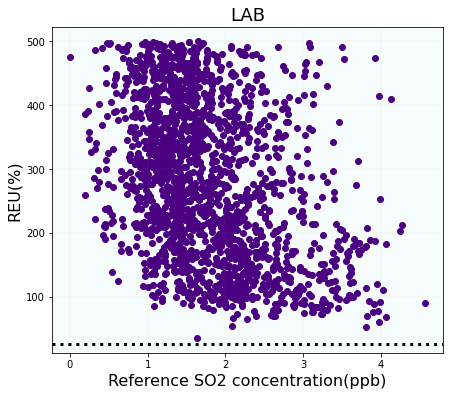

In [653]:
u_cal=REF(Lab1,y_test,3.9)
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.1)
ind=[]
U_cal=[]
Ref=[]
for i in range(len(u_cal)):
    if -50<u_cal[i]<500:
        U_cal.append(u_cal[i])
        Ref.append(y_test[i])
plt.scatter(Ref,U_cal, color='#4B0082')
plt.axhline(y=25, color='black', linestyle=':',linewidth=3)
plt.ylabel('REU(%)', fontsize=16)
plt.xlabel('Reference SO2 concentration(ppb)',fontsize=16)
plt.grid(linestyle='-.',linewidth=0.1)
plt.title('LAB', fontsize=18)
plt.show()

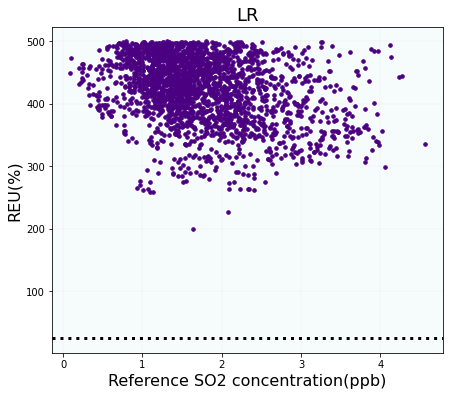

In [654]:
u_cal=REF(pred,y_test,3.9)
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.1)
ind=[]
U_cal=[]
Ref=[]
for i in range(len(u_cal)):
    if -50<u_cal[i]<500:
        U_cal.append(u_cal[i])
        Ref.append(y_test[i])
plt.scatter(Ref,U_cal, color='#4B0082',marker='.',s=50)
plt.axhline(y=25, color='black', linestyle=':',linewidth=3)
plt.ylabel('REU(%)', fontsize=16)
plt.xlabel('Reference SO2 concentration(ppb)',fontsize=16)
plt.grid(linestyle='-.',linewidth=0.1)
plt.title('LR', fontsize=18)
plt.show()

In [655]:
import random
alpha=3.9
LV=max(y_test)
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(lab1)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)**2
P=P1+P2+P3
Bias=(2*(P3)**0.5/(Cal))*100
Random=(2*(P1+P2)**0.5/(Cal))*100

import random
alpha=3.9
LV1=350
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(lab1)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV1)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV1)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV1)**2
P3=(Beta_0+(Beta_1-1)*LV1)**2
P=P1+P2+P3
Bias1=(2*(P3)**0.5/(Beta_0+Beta_1*LV1))*100
Random1=(2*(P1+P2)**0.5/(Beta_0+Beta_1*LV1))*100
Bias1,Random1

(2090.6443403399307, 312.3705767487102)

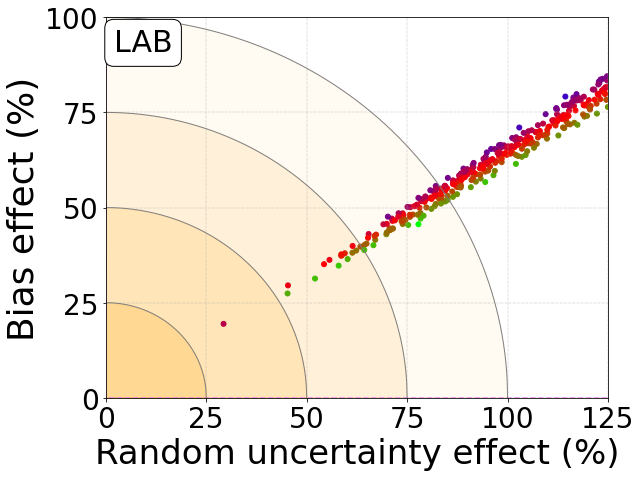

In [656]:
A=target(Lab1,y_test,3.9)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =25
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =100
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )

fig= plt.figure(figsize=(9,7))
plt.Circle((0, 0), 1, color='wheat')
plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='orange', alpha=0.2)
plt.fill_between(a2, b2, color='orange',alpha=0.15)
plt.fill_between(a3, b3, color='orange',alpha=0.1)
plt.fill_between(a4, b4, color='orange',alpha=0.05)

x1=np.arange(0,25.1,0.1)
r1=25
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,100.1,0.1)
r4=100
y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=1, color='grey')
plt.plot(x2,y2, linewidth=1, color='grey')
plt.plot(x3,y3, linewidth=1, color='grey')
plt.plot(x4,y4, linewidth=1, color='grey')

plt.xlabel('Random uncertainty effect (%)',fontsize=34)
plt.ylabel('Bias effect (%)',fontsize=36)
#plt.title(r'$SO_{2}$',fontsize=20)
plt.scatter(Random,Bias,marker='.',s=700, color='red')
plt.scatter(Random1,Bias1,marker='.',s=700, color='teal')
color_map = plt.cm.get_cmap('brg')
reversed_color_map = color_map
plt.scatter(A[0],A[1],marker='.',s=100,c=A[2],cmap=reversed_color_map)
plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-0)
plt.ylim(ymax=100)
plt.xlim(xmax=125)
plt.xlim(xmin=0)
plt.xticks(np.arange(0,126, 25), fontsize=28)
plt.yticks(np.arange(0,101, 25), fontsize=28)
#plt.colorbar()
#cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=30)
cbar.set_label('Concentration (ppb)', rotation=90,fontsize=36)
textstr = 'LAB'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.13, 1.21, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)
plt.show()

In [657]:
import random
alpha=3.9
LV=max(y_test)
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=y_test[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)**2
P=P1+P2+P3
Bias=(2*(P3)**0.5/(Cal))*100
Random=(2*(P1+P2)**0.5/(Cal))*100

import random
alpha=3.9
LV1=350
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV1)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV1)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV1)**2
P3=(Beta_0+(Beta_1-1)*LV1)**2
P=P1+P2+P3
Bias1=(2*(P3)**0.5/(Beta_0+Beta_1*LV1))*100
Random1=(2*(P1+P2)**0.5/(Beta_0+Beta_1*LV1))*100


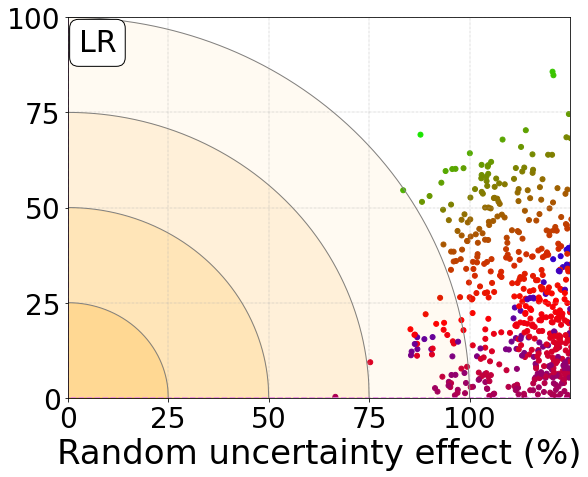

In [658]:
A=target(pred,y_test,3.9)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =25
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =100
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )

fig= plt.figure(figsize=(9,7))
plt.Circle((0, 0), 1, color='wheat')
plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='orange', alpha=0.2)
plt.fill_between(a2, b2, color='orange',alpha=0.15)
plt.fill_between(a3, b3, color='orange',alpha=0.1)
plt.fill_between(a4, b4, color='orange',alpha=0.05)

x1=np.arange(0,25.1,0.1)
r1=25
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,100.1,0.1)
r4=100
y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=1, color='grey')
plt.plot(x2,y2, linewidth=1, color='grey')
plt.plot(x3,y3, linewidth=1, color='grey')
plt.plot(x4,y4, linewidth=1, color='grey')

plt.xlabel('Random uncertainty effect (%)',fontsize=34)
#plt.ylabel('Bias effect (%)',fontsize=36)
#plt.title('SO2',fontsize=18)
color_map = plt.cm.get_cmap('brg')
reversed_color_map = color_map
plt.scatter(np.array(A[0])/3,np.array(A[1])/3,marker='.',s=100,c=A[2],cmap=reversed_color_map)
plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-0)
plt.ylim(ymax=100)
plt.xlim(xmax=125)
plt.xlim(xmin=0)
plt.xticks(np.arange(0,121, 25),fontsize=28)
plt.yticks(np.arange(0,101, 25),fontsize=28)
#plt.colorbar()
#cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=30)
cbar.set_label('Concentration (ppb)', rotation=90,fontsize=36)
plt.scatter(Random,Bias,marker='.',s=1500, color='teal')
plt.scatter(Random1+2,Bias1,marker='.',s=1500, color='black')
textstr = 'LR'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.04, 1.21, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)
plt.show()

## Scaling Laboratory Calibration
For the purpose of visual comparison with the ref and calibrated measurements, the lab measurement was scaled by a factor of 0.05

In [659]:
LAB1=0.2*np.array(Lab1)
A=len(y_test)-200
D=max(LAB1[A:])-0.2*max(LAB1[A:])
C=max(LAB1[A:])-0.1*max(LAB1[A:])
B=4000

fig= plt.figure(figsize=(8,6))
index=[i for i in range(1,201)]
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='#513e00',linewidth=3)
plt.plot(index,LAB1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'LR-Calibrated', 'LAB-Calibrated(scaled)'], loc = 2, bbox_to_anchor = (0.65,1))
plt.ylabel('SO2 Concentration(ppb)'.translate(subscript),fontsize=18)
#plt.text(B-100, C, r'$R^{2}(LR)=$'+str(R2_lr_SO2), fontsize = 14, color='#513e00')
#plt.text(B-100, D, r'$R^{2}(Lab)=$'+str(R2_lab_SO2), fontsize = 14, color='#426eff')
#plt.text(B-400, C, 'Pearson r(LR)='+str(Pearson_lr), fontsize = 14, color='#513e00')
#plt.text(B-400, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Linear Regression Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()


In [660]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))
MBE_LR_SO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_LR_SO2=CRMSE(y_test,pred)/np.std(y_test)
MBE_LAB_SO2=MBE(lab1,y_test)/(25*np.std(y_test))
CRMSE_LAB_SO2=CRMSE(y_test,lab1)/25*(np.std(y_test))
pred_lr=pred

Regressor model performance:
Mean absolute error(MAE) = 0.5
Mean squared error(MSE) = 0.41
Median absolute error = 0.4
Explain variance score = 0.19
R2 score = 0.19


# Model 2: SVR

In [661]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
regressor = SVR(kernel = 'poly',degree=3)
regressor.fit(X_train.drop(['Lab2'], axis=1), y_train)
pred = regressor.predict(X_test.drop(['Lab2'], axis=1))

In [662]:
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_svr_SO2=sMAPE_lr
RMSE_svr_SO2=RMSE_lr/np.mean(np.array(y_test))
Pearson_svr_SO2=Pearson_lr
R2_svr_SO2=round(sm.r2_score(y_test, pred), 2)
RMSE_Svr_SO2=RMSE_lr

fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='brown',linewidth=3)
plt.plot(index,LAB1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'SVR-Calibrated', 'LAB-Calibrated(Scaled)'], loc = 2, bbox_to_anchor = (0.65,1))
plt.ylabel('SO2 Concentration(ppb)'.translate(subscript),fontsize=18)
#plt.text(B-200, C,r'$R^{2}(SVR)=$'+str(R2_svr_SO2) , fontsize = 14, color='brown')
#plt.text(B-200, D, r'$R^{2}(Lab)=$'+str(R2_lab_SO2), fontsize = 14, color='#426eff')
#plt.text(B-420, C, 'Pearson r(SVR)='+str(Pearson_lr), fontsize = 14, color='brown')
#plt.text(B-420, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Support Vector Regression (SVR) Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [663]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_SVR_SO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_SVR_SO2=CRMSE(y_test,pred)/np.std(y_test)
pred_svr=pred

Regressor model performance:
Mean absolute error(MAE) = 0.45
Mean squared error(MSE) = 0.37
Median absolute error = 0.35
Explain variance score = 0.28
R2 score = 0.27


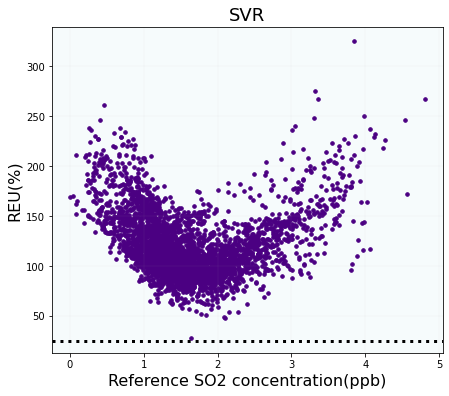

In [664]:
u_cal=REF(pred,y_test,1.9)
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.1)
ind=[]
U_cal=[]
Ref=[]
for i in range(len(u_cal)):
    if -50<u_cal[i]<500:
        U_cal.append(u_cal[i])
        Ref.append(y_test[i])
plt.scatter(Ref,U_cal, color='#4B0082',marker='.',s=50)
plt.axhline(y=25, color='black', linestyle=':',linewidth=3)
plt.ylabel('REU(%)', fontsize=16)
plt.xlabel('Reference SO2 concentration(ppb)',fontsize=16)
plt.grid(linestyle='-.',linewidth=0.1)
plt.title('SVR', fontsize=18)
plt.show()

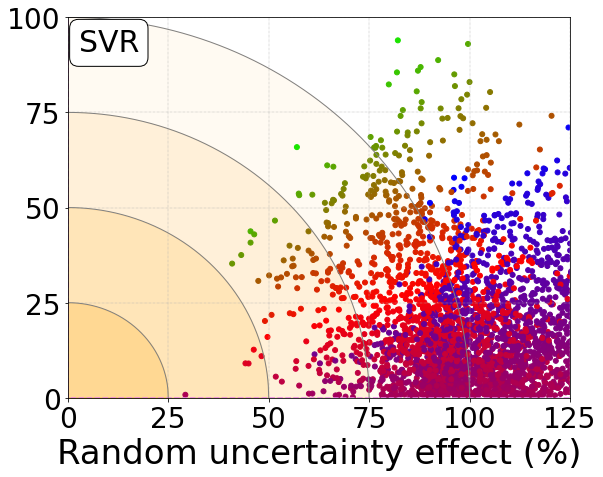

In [665]:
A=target(pred,y_test,3.9)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =25
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =100
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )

fig= plt.figure(figsize=(9,7))
plt.Circle((0, 0), 1, color='wheat')
plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='orange', alpha=0.2)
plt.fill_between(a2, b2, color='orange',alpha=0.15)
plt.fill_between(a3, b3, color='orange',alpha=0.1)
plt.fill_between(a4, b4, color='orange',alpha=0.05)

x1=np.arange(0,25.1,0.1)
r1=25
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,100.1,0.1)
r4=100
y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=1, color='grey')
plt.plot(x2,y2, linewidth=1, color='grey')
plt.plot(x3,y3, linewidth=1, color='grey')
plt.plot(x4,y4, linewidth=1, color='grey')

plt.xlabel('Random uncertainty effect (%)',fontsize=34)
#plt.ylabel('Bias effect (%)',fontsize=36)
#plt.title('SO2',fontsize=20)
color_map = plt.cm.get_cmap('brg')
reversed_color_map = color_map
plt.scatter(np.array(A[0])/3,np.array(A[1])/3,marker='.',s=100,c=A[2],cmap=reversed_color_map)
plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-0)
plt.ylim(ymax=100)
plt.xlim(xmax=125)
plt.xlim(xmin=0)
plt.xticks(np.arange(0,126, 25),fontsize=28)
plt.yticks(np.arange(0,101, 25),fontsize=28)
#plt.colorbar()
#cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=30)
cbar.set_label('Concentration (ppb)', rotation=90,fontsize=36)
plt.scatter(Random,Bias,marker='.',s=1500, color='teal')
plt.scatter(Random1+2,Bias1,marker='.',s=1500, color='black')
textstr = 'SVR'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.04, 1.21, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)
plt.show()

 # Model 3: Random Forest

In [666]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 500,min_samples_split= 2,min_samples_leaf= 1,max_features= 'sqrt', 
                                  random_state = 0,max_depth=None,bootstrap=False)
  
# fit the regressor with x and y data
regressor=regressor.fit(X_train.drop(['Lab2'], axis=1), y_train)  

In [667]:
Index=[i for i in range(len(y_test))]
features_SO2=regressor.feature_importances_
pred = regressor.predict(X_test.drop(['Lab2'], axis=1))
pred_rf_so2=pred
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_rf_SO2=sMAPE_lr
RMSE_rf_SO2=RMSE_lr/np.mean(np.array(y_test))
Pearson_rf_SO2=Pearson_lr
R2_rf_SO2=round(sm.r2_score(y_test, pred), 2)
RMSE_Rf_SO2=RMSE_lr

fig= plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='indigo',linewidth=3)
plt.plot(index,LAB1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'RF-Calibrated', 'LAB-Calibrated(Scaled)'], loc = 2, bbox_to_anchor = (0.72,1))
plt.ylabel('SO2 Concentration(ppb)'.translate(subscript),fontsize=18)
plt.text(B-20, C,r'$R^{2}(RF)=$'+str(R2_rf_SO2) , fontsize = 14, color='indigo')
plt.text(B-20, D,r'$R^{2}(Lab)=$'+str(R2_lab_SO2) , fontsize = 14, color='#426eff')
plt.text(B-70, C, 'Pearson r(RF)='+str(Pearson_lr), fontsize = 14, color='indigo')
plt.text(B-70, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Visualization: Random Forest(RF) Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [668]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_RF_SO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_RF_SO2=CRMSE(y_test,pred)/np.std(y_test)
pred_rf=pred

Regressor model performance:
Mean absolute error(MAE) = 0.13
Mean squared error(MSE) = 0.04
Median absolute error = 0.08
Explain variance score = 0.92
R2 score = 0.92


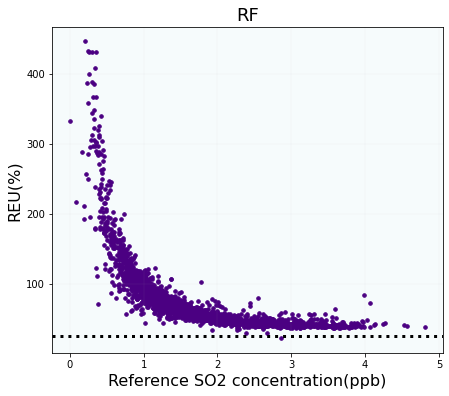

In [669]:
u_cal=REF(pred,y_test,3.9)
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.1)
ind=[]
U_cal=[]
Ref=[]
for i in range(len(u_cal)):
    if -50<u_cal[i]<500:
        U_cal.append(u_cal[i])
        Ref.append(y_test[i])
plt.scatter(Ref,U_cal, color='#4B0082',marker='.',s=50)
plt.axhline(y=25, color='black', linestyle=':',linewidth=3)
plt.ylabel('REU(%)', fontsize=16)
plt.xlabel('Reference SO2 concentration(ppb)',fontsize=16)
plt.grid(linestyle='-.',linewidth=0.1)
plt.title('RF', fontsize=18)
plt.show()

In [670]:
import random
alpha=3.9
LV=max(y_test)
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=y_test[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)**2
P=P1+P2+P3
Bias=(2*(P3)**0.5/(Cal))*100
Random=(2*(P1+P2)**0.5/(Cal))*100

import random
alpha=3.9
LV1=350
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV1)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV1)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV1)**2
P3=(Beta_0+(Beta_1-1)*LV1)**2
P=P1+P2+P3
Bias1=(2*(P3)**0.5/(Beta_0+Beta_1*LV1))*100
Random1=(2*(P1+P2)**0.5/(Beta_0+Beta_1*LV1))*100


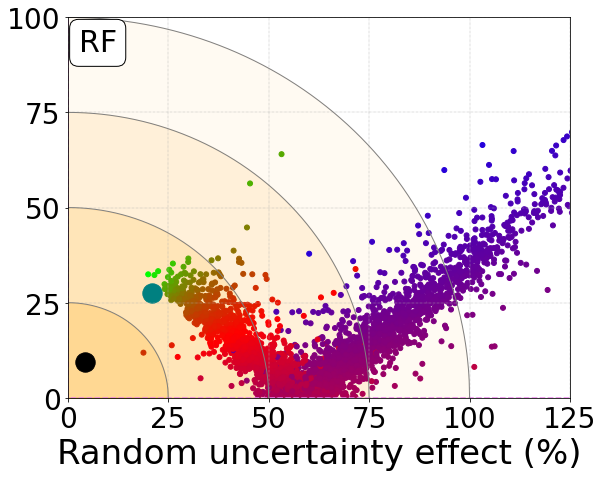

In [671]:
A=target(pred,y_test,3.9)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =25
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =100
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )

fig= plt.figure(figsize=(9,7))
plt.Circle((0, 0), 1, color='wheat')
plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='orange', alpha=0.2)
plt.fill_between(a2, b2, color='orange',alpha=0.15)
plt.fill_between(a3, b3, color='orange',alpha=0.1)
plt.fill_between(a4, b4, color='orange',alpha=0.05)

x1=np.arange(0,25.1,0.1)
r1=25
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,100.1,0.1)
r4=100
y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=1, color='grey')
plt.plot(x2,y2, linewidth=1, color='grey')
plt.plot(x3,y3, linewidth=1, color='grey')
plt.plot(x4,y4, linewidth=1, color='grey')

plt.xlabel('Random uncertainty effect (%)',fontsize=34)
#plt.ylabel('Bias effect (%)',fontsize=36)
#plt.title(r'$SO_{2}$',fontsize=20)
#plt.scatter(Random,Bias,marker='.',s=700, color='red')
#plt.scatter(Random1+2,Bias1,marker='.',s=700, color='teal')
color_map = plt.cm.get_cmap('brg')
reversed_color_map = color_map
plt.scatter(A[0],A[1],marker='.',s=100,c=A[2],cmap=reversed_color_map)
plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-0)
plt.ylim(ymax=100)
plt.xlim(xmax=125)
plt.xlim(xmin=0)
plt.xticks(np.arange(0,126, 25), fontsize=28)
plt.yticks(np.arange(0,101, 25), fontsize=28)
#plt.colorbar()
#cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=30)
cbar.set_label('Concentration (ppb)', rotation=90,fontsize=36)
plt.scatter(Random,Bias,marker='.',s=1500, color='teal')
plt.scatter(Random1+4,Bias1+4,marker='.',s=1500, color='black')
textstr = 'RF'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.04, 1.21, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)
plt.show()

In [672]:
A=[i for i in np.arange(1,20,0.1)]
K=[]
for i in A:
    k=REF2(pred,y_test,i,350)
    K.append(k)
for i in range(len(K)):
    if K[i]==min(K):
        print(A[i])

3.500000000000002


# Model 4 : ANN

In [673]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn.preprocessing import StandardScaler
model = Sequential()
model.add(Dense(6, input_shape = (6,),kernel_initializer='normal', activation= 'linear'))
model.add(Dense(128,kernel_initializer='normal', activation= 'relu'))
model.add(Dense(50, kernel_initializer='normal',activation= 'relu'))
#model.add(Dense(100, kernel_initializer='normal',activation= 'relu'))
model.add(Dense(1,kernel_initializer='normal',activation='linear',))
sgd = optimizers.Adam(learning_rate=0.01)

model.compile(optimizer = sgd, loss = 'mean_squared_error', metrics= ['mse', 'mae'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_49 (Dense)             (None, 128)               896       
_________________________________________________________________
dense_50 (Dense)             (None, 50)                6450      
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 51        
Total params: 7,439
Trainable params: 7,439
Non-trainable params: 0
_________________________________________________________________


In [674]:
scaler = StandardScaler()
scaler.fit(X_train.drop(['Lab2'], axis=1))
X_train_scaled=scaler.transform(X_train.drop(['Lab2'], axis=1))
X_test_scaled=scaler.transform(X_test.drop(['Lab2'], axis=1))
model.fit(X_train_scaled, y_train, batch_size= 200, epochs=100, verbose= 0)

In [675]:
train_pred = model.predict(X_train_scaled)
test_pred = model.predict(X_test_scaled)
pred=[]
for i in range(len(test_pred)):
    pred.append(sum(list(test_pred[i])))
len(y_test)

3562

In [676]:
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_ann_SO2=sMAPE_lr
RMSE_ann_SO2=RMSE_lr/np.mean(np.array(y_test))
Pearson_ann_SO2=Pearson_lr
R2_ann_SO2=round(sm.r2_score(y_test, pred), 2)
RMSE_Ann_SO2=RMSE_lr

fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='tomato',linewidth=3)
plt.plot(index,LAB1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'ANN-Calibrated', 'LAB-Calibrated(Scaled)'], loc = 2, bbox_to_anchor = (0.65,1))
plt.ylabel('SO2 Concentration(ppb)'.translate(subscript),fontsize=18)
#plt.text(B-200, C,r'$R^{2}(ANN)=$'+str(R2_ann_SO2) , fontsize = 14, color='tomato')
#plt.text(B-200, D,r'$R^{2}(Lab)=$'+str(R2_lab_SO2) , fontsize = 14, color='#426eff')
#plt.text(B-400, C, 'Pearson r(ANN)='+str(Pearson_lr), fontsize = 14, color='tomato')
#plt.text(B-400, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Artificial Neural Network(ANN)  Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [677]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_ANN_SO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_ANN_SO2=CRMSE(y_test,pred)/np.std(y_test)
pred_ann=pred

Regressor model performance:
Mean absolute error(MAE) = 0.25
Mean squared error(MSE) = 0.12
Median absolute error = 0.2
Explain variance score = 0.77
R2 score = 0.76


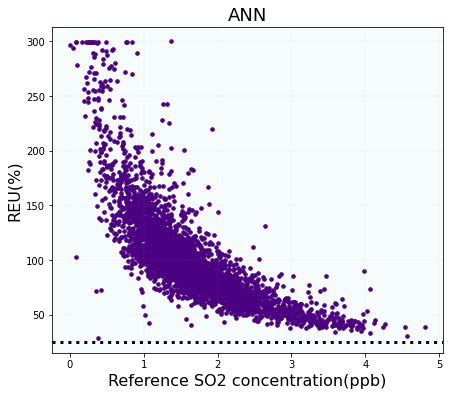

In [678]:
u_cal=REF(pred,y_test,3.9)
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.1)
ind=[]
U_cal=[]
Ref=[]
for i in range(len(u_cal)):
    if -50<u_cal[i]<500:
        U_cal.append(u_cal[i])
        Ref.append(y_test[i])
plt.scatter(Ref,U_cal, color='#4B0082',marker='.',s=50)
plt.axhline(y=25, color='black', linestyle=':',linewidth=3)
plt.ylabel('REU(%)', fontsize=16)
plt.xlabel('Reference SO2 concentration(ppb)',fontsize=16)
plt.grid(linestyle='-.',linewidth=0.1)
plt.title('ANN', fontsize=18)
plt.show()

In [679]:
import random
alpha=3.9
LV=max(y_test)
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=y_test[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)**2
P=P1+P2+P3
Bias=(2*(P3)**0.5/(Cal))*100
Random=(2*(P1+P2)**0.5/(Cal))*100

import random
alpha=3.9
LV1=350
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV1)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV1)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV1)**2
P3=(Beta_0+(Beta_1-1)*LV1)**2
P=P1+P2+P3
Bias1=(2*(P3)**0.5/(Beta_0+Beta_1*LV1))*100
Random1=(2*(P1+P2)**0.5/(Beta_0+Beta_1*LV1))*100


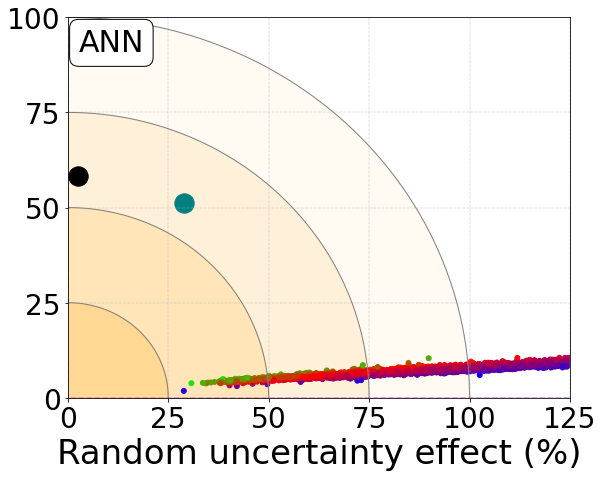

In [680]:
A=target(pred,y_test,3.9)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =25
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =100
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )

fig= plt.figure(figsize=(9,7))
plt.Circle((0, 0), 1, color='wheat')
plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='orange', alpha=0.2)
plt.fill_between(a2, b2, color='orange',alpha=0.15)
plt.fill_between(a3, b3, color='orange',alpha=0.1)
plt.fill_between(a4, b4, color='orange',alpha=0.05)

x1=np.arange(0,25.1,0.1)
r1=25
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,100.1,0.1)
r4=100
y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=1, color='grey')
plt.plot(x2,y2, linewidth=1, color='grey')
plt.plot(x3,y3, linewidth=1, color='grey')
plt.plot(x4,y4, linewidth=1, color='grey')

plt.xlabel('Random uncertainty effect (%)',fontsize=34)
#plt.ylabel('Bias effect (%)',fontsize=36)
#plt.title('SO2',fontsize=18)
color_map = plt.cm.get_cmap('brg')
reversed_color_map = color_map
plt.scatter(A[0],A[1],marker='.',s=100,c=A[2],cmap=reversed_color_map)
plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-0)
plt.ylim(ymax=100)
plt.xlim(xmax=125)
plt.xlim(xmin=0)
plt.xticks(np.arange(0,126, 25),fontsize=28)
plt.yticks(np.arange(0,101, 25),fontsize=28)
#plt.colorbar()
#cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=30)
cbar.set_label('Concentration (ppb)', rotation=90,fontsize=36)
plt.scatter(Random,Bias,marker='.',s=1500, color='teal')
plt.scatter(Random1+2,Bias1,marker='.',s=1500, color='black')
textstr = 'ANN'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.04, 1.21, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)
plt.show()

# Model 5 : XGBoost

In [681]:
from xgboost import  XGBRegressor
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
# create an xgboost regression model
#n_estimators=10000, max_depth=5, eta=0.01, subsample=0.9,colsample_bytree=0.4,alpha=10
model = XGBRegressor(n_estimators=10000, max_depth=5, eta=0.01, subsample=0.9, 
                     colsample_bytree=0.4,alpha=10)

model.fit(X_train.drop(['Lab2'], axis=1),y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, eta=0.01, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [682]:
pred = model.predict(X_test.drop(['Lab2'], axis=1))
pred_xgb_so2=pred
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_xgb_SO2=sMAPE_lr
RMSE_xgb_SO2=RMSE_lr/np.mean(np.array(y_test))
Pearson_xgb_SO2=Pearson_lr
R2_xgb_SO2=round(sm.r2_score(y_test, pred), 2)
RMSE_Xgb_SO2=RMSE_lr

fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='darkgoldenrod',linewidth=3)
plt.plot(index,LAB1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'XGBoost-Calibrated', 'LAB-Calibrated(scaled)'], loc = 2, bbox_to_anchor = (0.65,1))
plt.ylabel('SO2 Concentration(ppb)'.translate(subscript),fontsize=18)
#plt.text(B-200, C,r'$R^{2}(XGB)=$'+str(R2_xgb_SO2) , fontsize = 14, color='darkgoldenrod')
#plt.text(B-200, D,r'$R^{2}(Lab)=$'+str(R2_lab_SO2), fontsize = 14, color='#426eff')
#plt.text(B-400, C, 'Pearson r(XGB)='+str(Pearson_lr), fontsize = 14, color='darkgoldenrod')
#plt.text(B-400, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('XGBoost  Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [683]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_XGB_SO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_XGB_SO2=CRMSE(y_test,pred)/np.std(y_test)
pred_xgb=pred

Regressor model performance:
Mean absolute error(MAE) = 0.28
Mean squared error(MSE) = 0.14
Median absolute error = 0.21
Explain variance score = 0.72
R2 score = 0.72


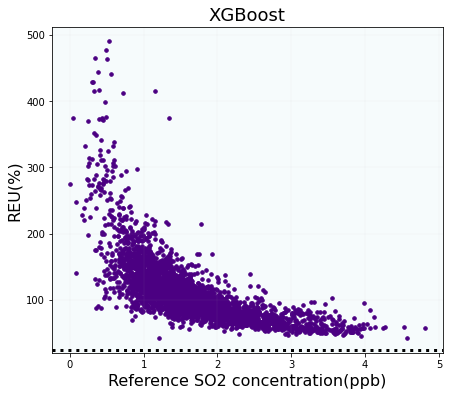

In [684]:
u_cal=REF(pred,y_test,3.9)
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.1)
ind=[]
U_cal=[]
Ref=[]
for i in range(len(u_cal)):
    if -50<u_cal[i]<500:
        U_cal.append(u_cal[i])
        Ref.append(y_test[i])
plt.scatter(Ref,U_cal, color='#4B0082',marker='.',s=50)
plt.axhline(y=25, color='black', linestyle=':',linewidth=3)
plt.ylabel('REU(%)', fontsize=16)
plt.xlabel('Reference SO2 concentration(ppb)',fontsize=16)
plt.grid(linestyle='-.',linewidth=0.1)
plt.title('XGBoost', fontsize=18)
plt.show()

In [685]:
import random
alpha=3.9
LV=max(y_test)
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=y_test[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)**2
P=P1+P2+P3
Bias=(2*(P3)**0.5/(Cal))*100
Random=(2*(P1+P2)**0.5/(Cal))*100

import random
alpha=3.9
LV1=350
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV1)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV1)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV1)**2
P3=(Beta_0+(Beta_1-1)*LV1)**2
P=P1+P2+P3
Bias1=(2*(P3)**0.5/(Beta_0+Beta_1*LV1))*100
Random1=(2*(P1+P2)**0.5/(Beta_0+Beta_1*LV1))*100


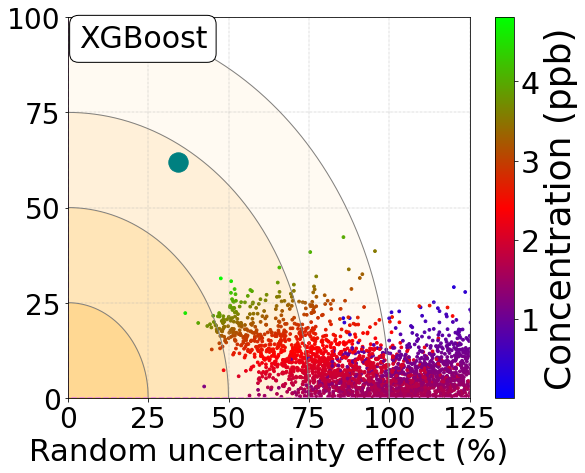

In [686]:
A=target(pred,y_test,3.9)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =25
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =50
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =75
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =100
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )

fig= plt.figure(figsize=(9,7))
plt.Circle((0, 0), 1, color='wheat')
plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='orange', alpha=0.2)
plt.fill_between(a2, b2, color='orange',alpha=0.15)
plt.fill_between(a3, b3, color='orange',alpha=0.1)
plt.fill_between(a4, b4, color='orange',alpha=0.05)

x1=np.arange(0,25.1,0.1)
r1=25
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,50.1,0.1)
r2=50
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,75.1,0.1)
r3=75
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,100.1,0.1)
r4=100
y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=1, color='grey')
plt.plot(x2,y2, linewidth=1, color='grey')
plt.plot(x3,y3, linewidth=1, color='grey')
plt.plot(x4,y4, linewidth=1, color='grey')

plt.xlabel('Random uncertainty effect (%)',fontsize=31)
#plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title('SO2',fontsize=18)
color_map = plt.cm.get_cmap('brg')
reversed_color_map = color_map
plt.scatter(A[0],A[1],marker='.',s=30,c=A[2],cmap=reversed_color_map)
plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-0)
plt.ylim(ymax=100)
plt.xlim(xmax=125)
plt.xlim(xmin=0)
plt.xticks(np.arange(0,126, 25),fontsize=28)
plt.yticks(np.arange(0,101, 25),fontsize=28)
#plt.colorbar()
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=30)
cbar.set_label('Concentration (ppb)', rotation=90,fontsize=36)
plt.scatter(Random,Bias,marker='.',s=1500, color='teal')
plt.scatter(Random1+2,Bias1,marker='.',s=1500, color='black')
textstr = 'XGBoost'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.04, 1.21, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)
plt.show()

# O3 CALIBRATION

In [687]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('O3.txt', header = None,low_memory=False)
data.columns=['AE','WE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref']=Ref_O3
WE=Data_O3['WE'].to_list()
AE=Data_O3['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
data = pd.read_csv('Conc_O3.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
ref_NO2=Data_NO2['Ref'].to_list()
Data_O3['Ref_NO2']=ref_NO2
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
O3_Data=O3_Data.resample('20min').mean()
O3_Data=O3_Data.dropna()
O3_Data.head()

Lab1       Temp         RH        Ref  Net Signal  \
Date                                                                            
2019-10-02 11:40:00   621.625704  26.378438  58.063437  46.094860    3.605625   
2019-10-02 12:00:00  1037.932435  25.632544  48.527009  56.858942   10.655074   
2019-10-02 12:20:00    99.598353  26.120078  47.716553  58.880540   20.285180   
2019-10-07 10:40:00   108.196313  32.344264  37.260757  47.259007   11.447809   
2019-10-07 11:00:00   123.884374  33.621877  36.522761  41.416863    8.541809   

                     Month  Day_of_week  Day  Hour    Ref_NO2  
Date                                                           
2019-10-02 11:40:00   10.0          2.0  2.0  11.0  15.230400  
2019-10-02 12:00:00   10.0          2.0  2.0  12.0   6.653971  
2019-10-02 12:20:00   10.0          2.0  2.0  12.0   2.844210  
2019-10-07 10:40:00   10.0          0.0  7.0  10.0   4.255772  
2019-10-07 11:00:00   10.0          0.0  7.0  11.0  16.150580

In [688]:
#Ref=O3_Data['Ref'].to_list()
#O3_Data=O3_Data[O3_Data.Ref.between(np.mean(Ref)-1*np.std(Ref), np.mean(Ref)+1*np.std(Ref))]
#O3_Data.shape

In [689]:
def REF(pred,y_test,alpha):
    import random
    cal=np.array(pred)
    ref=np.array(y_test.to_list())
    ref_mean=np.mean(ref)
    cal_mean=np.mean(cal)
    prec=np.array([1 for i in range(len(ref))])
    #u=np.maximum(prec,0.0015*ref)
    u=prec
    #cal=np.log(cal)
    #ref=np.log(ref)
    sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
    sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
    sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
    beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
    beta_0=cal_mean-beta_1*ref_mean
    RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*u**2)
    du_s=RSS/(len(cal)-2)
    Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
    Beta_0=cal_mean-Beta_1*ref_mean
    P1=(RSS/(len(cal)-2))
    P2=(Beta_1**2+alpha)*u**2+(-2*Beta_1**2+2*Beta_1-1)*u**2
    P3=(Beta_0+(Beta_1-1)*ref)**2
    P=[]
    for i in range(len(P3)):
        P.append(P1+P2[i]+P3[i])
    for i in range(len(P)):
        if P[i]<0:
            P[i]=random.randint(1,100)
    u_cal=(2*np.sqrt(np.array(P))/cal)*100
    #u_cal=((2*np.sqrt((RSS/(len(cal)-2))+(1-(beta_1-1)**2)*(0.08*ref)**2+(Beta_0+(Beta_1-1)*ref)**2))/cal)*100
    return u_cal  

In [690]:
def REF2(pred,y_test,alpha,LV):
    import random
    cal=np.array(pred)
    ref=np.array(y_test.to_list())
    ref_mean=np.mean(ref)
    cal_mean=np.mean(cal)
    prec=np.array([1 for i in range(len(ref))])
    #u=0.001*ref
    u=prec
    #cal=np.log(cal)
    #ref=np.log(ref)
    sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
    sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
    sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
    #beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
    beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
    beta_0=cal_mean-beta_1*ref_mean
    RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
    du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
    Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
    Beta_0=cal_mean-Beta_1*ref_mean
    P1=(RSS/(len(cal)-2))
    P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
    P3=(Beta_0+(Beta_1-1)*LV)**2
    P=P1+P2+P3
    if P<0:
        P=random.randint(1,100)
    u_cal=(2*np.sqrt(P)/(Beta_0+Beta_1*LV))*100
    #u_cal=((2*np.sqrt((RSS/(len(cal)-2))+(1-(beta_1-1)**2)*0.1+(Beta_0+(Beta_1-1)*ref)**2))/cal)*100
    return u_cal  

In [691]:
def target(pred,y_test,alpha):
    import random
    cal=np.array(pred)
    ref=np.array(y_test.to_list())
    ref_mean=np.mean(ref)
    cal_mean=np.mean(cal)
    prec=np.array([1 for i in range(len(ref))])
    #u=np.maximum(prec, 0.0015*ref)
    u=prec
    #u=0.01*ref
    #cal=np.log(cal)
    #ref=np.log(ref)
    sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
    sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
    sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
    #beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
    beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
    beta_0=cal_mean-beta_1*ref_mean
    RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*u**2)
    du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
    Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
    Beta_0=cal_mean-Beta_1*ref_mean
    P1=(RSS/(len(cal)-2))
    P2=(Beta_1**2+alpha)*u**2+(-2*Beta_1**2+2*Beta_1-1)*u**2
    P3=(Beta_0+(Beta_1-1)*ref)
    P=[]
    for i in range(len(P2)):
        P.append(P1+P2[i])
    for i in range(len(P)):
        if P[i]<0:
            P[i]=random.randint(1,50)
    A=(2*(np.array(P))**0.5/ref)*100
    #for i in range(len(P3)):
        #if P3[i]<0:
            #P3[i]=random.randint(0,50)
    B=(2*(np.array(P3))/ref)*100
    bias=[]
    random=[]
    Ref=[]
    part1=(Beta_0/ref)*100
    part=[beta_1-1 for i in range(len(ref))]
    part2=(np.array(part))*100
    PART1=[]
    PART2=[]
    for i in range(len(A)):
        if A[i]<500:
            random.append(A[i])
            bias.append(B[i])
            Ref.append(ref[i])
            PART1.append(part1[i])
            PART2.append(part2[i])
    return [random,bias,Ref, PART1,PART2]

## Model 1: LR

In [692]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#,'Ref_CO','Ref_NO2','Ref_SO2'
X=O3_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour','Ref_NO2']]#,'Ref_NO2'
y=O3_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
len(X_test)

2002

In [693]:
lr = LinearRegression()
model = lr.fit(X_train.drop(['Lab1'], axis=1), y_train)
pred = model.predict(X_test.drop(['Lab1'], axis=1))
lab1=X_test['Lab1'].to_list()
for i in range(len(lab1)):
    if lab1[i]>370:
        lab1[i]=np.mean(lab1)
Index=[i for i in range(len(y_test))]
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_lr_O3=sMAPE_lr
RMSE_lr_O3=RMSE_lr/np.mean(np.array(y_test))
Pearson_lr_O3=Pearson_lr
sMAPE_lab_O3=sMAPE_lab
RMSE_lab_O3=RMSE_lab/np.mean(np.array(lab1))
Pearson_lab_O3=Pearson_lab
R2_lr_O3=round(sm.r2_score(y_test, pred), 2)
R2_lab_O3=round(sm.r2_score(y_test, lab1), 2)
RMSE_Lr_O3=RMSE_lr
RMSE_Lab_O3=RMSE_lab

A=len(y_test)
D=max(lab1)-0.10*max(lab1)
C=max(lab1)-0.03*max(lab1)
B=A

Pearson_lr_O3,R2_lr_O3,RMSE_Lr_O3

(0.95, 0.91, 4.6)

fig= plt.figure(figsize=(8,6))
index=[i for i in range(1,len(y_test)+1)]
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test, color='limegreen',linewidth=3)
plt.plot(index,pred, color='#513e00',linewidth=3)
plt.plot(index,lab1, color='#426eff',linewidth=3)
plt.legend(['Ref', 'LR-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.75,1))
plt.ylabel('O3 Concentration(ppb)'.translate(subscript),fontsize=18)
#plt.text(B-5, C,r'$R^{2}(LR)=$'+str(R2_lr_O3) , fontsize = 14, color='#513e00')
#plt.text(B-5, D,r'$R^{2}(Lab)=$'+str(R2_lab_O3) , fontsize = 14, color='#426eff')
#plt.text(B-70, C, 'Pearson r(LR)='+str(Pearson_lr), fontsize = 14, color='#513e00')
#plt.text(B-70, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
plt.xlabel('Testing period(hours)',fontsize=18)
#plt.title('Linear Regression Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [694]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_LR_O3=MBE(pred,y_test)/np.std(y_test)
CRMSE_LR_O3=CRMSE(y_test,pred)/np.std(y_test)
MBE_LAB_O3=MBE(lab1,y_test)/(3.6*np.std(y_test))
CRMSE_LAB_O3=CRMSE(y_test,lab1)/(3.6*np.std(y_test))
pred_lr=pred

Regressor model performance:
Mean absolute error(MAE) = 3.59
Mean squared error(MSE) = 20.82
Median absolute error = 3.03
Explain variance score = 0.91
R2 score = 0.91


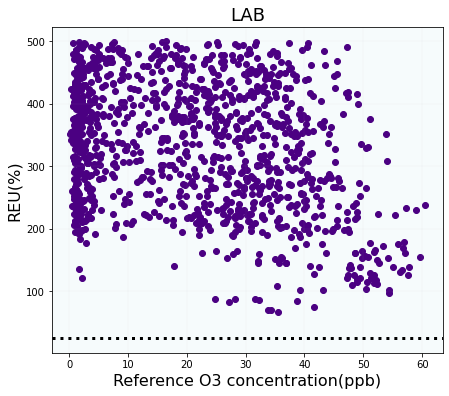

In [695]:
u_cal=REF(lab1,y_test,1.2)
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.1)
ind=[]
U_cal=[]
Ref=[]
for i in range(len(u_cal)):
    if -50<u_cal[i]<500:
        U_cal.append(u_cal[i])
        Ref.append(y_test[i])
plt.scatter(Ref,U_cal, color='#4B0082')
plt.axhline(y=25, color='black', linestyle=':',linewidth=3)
plt.ylabel('REU(%)', fontsize=16)
plt.xlabel('Reference O3 concentration(ppb)',fontsize=16)
plt.grid(linestyle='-.',linewidth=0.1)
plt.title('LAB', fontsize=18)
plt.show()

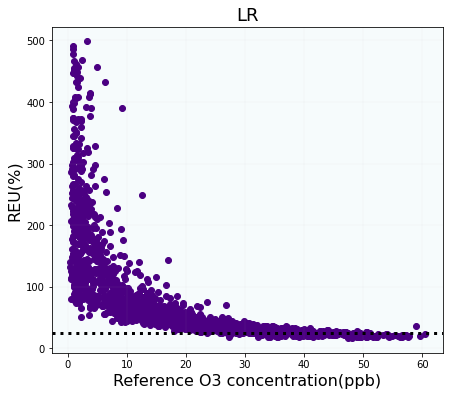

In [696]:
u_cal=REF(pred,y_test,1.2)
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.1)
ind=[]
U_cal=[]
Ref=[]
for i in range(len(u_cal)):
    if -50<u_cal[i]<500:
        U_cal.append(u_cal[i])
        Ref.append(y_test[i])
plt.scatter(Ref,U_cal, color='#4B0082')
plt.axhline(y=25, color='black', linestyle=':',linewidth=3)
plt.ylabel('REU(%)', fontsize=16)
plt.xlabel('Reference O3 concentration(ppb)',fontsize=16)
plt.grid(linestyle='-.',linewidth=0.1)
plt.title('LR', fontsize=18)
plt.show()

In [697]:
import random
alpha=1.2
LV=max(y_test)
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(lab1)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([1 for i in range(len(ref))])
u=prec
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/LV)*100
Random=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV1=120
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(lab1)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([1 for i in range(len(ref))])
u=prec
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV1)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV1)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV1)**2
P3=(Beta_0+(Beta_1-1)*LV1)
P=P1+P2+P3
Bias1=(2*(P3)/(LV1))*100
Random1=(2*(P1+P2)**0.5/(LV1))*100

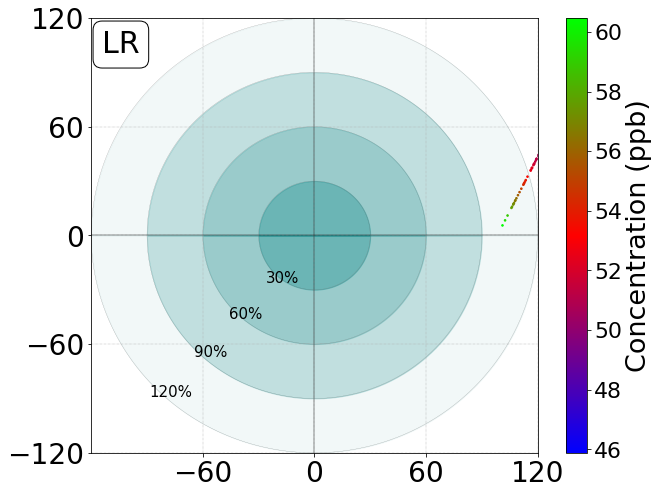

In [698]:
A=target(lab1,y_test,1.2)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =30
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =60
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =90
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =120
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))

plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='teal', alpha=0.3)
plt.fill_between(a2, b2, color='teal',alpha=0.2)
plt.fill_between(a3, b3, color='teal',alpha=0.2)
plt.fill_between(a4, b4, color='teal',alpha=0.05)

x1=np.arange(0,30.1,0.1)
r1=30
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,60.1,0.1)
r2=60
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,90.1,0.1)
r3=90
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,120.1,0.1)
r4=120
y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=0.2, color='grey')
plt.plot(x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(x2,y2, linewidth=0.2, color='grey')
plt.plot(x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(x3,y3, linewidth=0.2, color='grey')
plt.plot(x3,-1*y3, linewidth=0.2, color='grey')
plt.plot(x4,y4, linewidth=0.2, color='grey')
plt.plot(x4,-1*y4, linewidth=0.2, color='grey')

plt.plot(-1*x1,y1, linewidth=0.2, color='grey')
plt.plot(-1*x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(-1*x2,y2, linewidth=0.2, color='grey')
plt.plot(-1*x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(-1*x3,y3, linewidth=0.2, color='grey')
plt.plot(-1*x3,-1*y3, linewidth=0.2, color='grey')
plt.plot(-1*x4,y4, linewidth=0.2, color='grey')
plt.plot(-1*x4,-1*y4, linewidth=0.2, color='grey')

#plt.xlabel('Random uncertainty effect (%)',fontsize=24)
#plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title('CO',fontsize=18)
color_map = plt.cm.get_cmap('brg')
reversed_color_map = color_map
plt.scatter(A[0],A[1],marker='.',s=200,c=np.array(A[2]),cmap=reversed_color_map)
plt.scatter(A[3],A[1],marker='.',s=10,c=np.array(A[2]),cmap=reversed_color_map)
plt.scatter(A[4],A[1],marker='.',s=10,c=np.array(A[2]),cmap=reversed_color_map)
plt.vlines([0], -130, 130,color='black',linewidth=0.4)
plt.hlines([0], -130, 130, color='black',linewidth=0.4)
plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-120)
plt.ylim(ymax=120)
plt.xlim(xmax=120)
plt.xlim(xmin=-120)
plt.xticks(np.arange(-60,121, 60),fontsize=28)
plt.yticks(np.arange(-120,121, 60),fontsize=28)
#plt.colorbar()
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=22)
cbar.set_label('Concentration (ppb)', rotation=90,fontsize=27)
plt.scatter(Random,Bias,marker=(5, 2),s=200, color='black')
plt.scatter(Random1+2,Bias1,marker=(5, 2),s=200, color='brown')
textstr = 'LR'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.1, 1.26, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)
plt.text(-26,-26, '30%',fontsize=15)
plt.text(-46,-46, '60%',fontsize=15)
plt.text(-65,-67, '90%',fontsize=15)
plt.text(-89,-89, '120%',fontsize=15)
plt.show()

In [699]:
import random
alpha=1.2
LV=max(y_test)
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([1 for i in range(len(ref))])
u=prec
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/LV)*100
Random=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV1=120
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([1 for i in range(len(ref))])
u=prec
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV1)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV1)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV1)**2
P3=(Beta_0+(Beta_1-1)*LV1)
P=P1+P2+P3
Bias1=(2*(P3)/(LV1))*100
Random1=(2*(P1+P2)**0.5/(LV1))*100

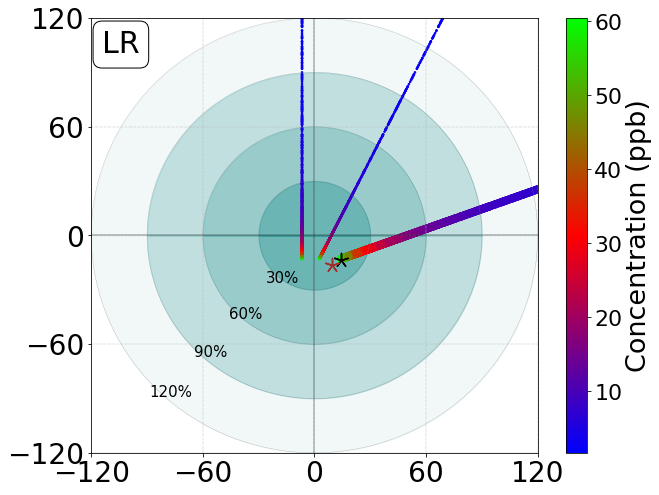

In [700]:
A=target(pred,y_test,1.2)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =30
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =60
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =90
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =120
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))

plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='teal', alpha=0.3)
plt.fill_between(a2, b2, color='teal',alpha=0.2)
plt.fill_between(a3, b3, color='teal',alpha=0.2)
plt.fill_between(a4, b4, color='teal',alpha=0.05)

x1=np.arange(0,30.1,0.1)
r1=30
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,60.1,0.1)
r2=60
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,90.1,0.1)
r3=90
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,120.1,0.1)
r4=120
y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=0.2, color='grey')
plt.plot(x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(x2,y2, linewidth=0.2, color='grey')
plt.plot(x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(x3,y3, linewidth=0.2, color='grey')
plt.plot(x3,-1*y3, linewidth=0.2, color='grey')
plt.plot(x4,y4, linewidth=0.2, color='grey')
plt.plot(x4,-1*y4, linewidth=0.2, color='grey')

plt.plot(-1*x1,y1, linewidth=0.2, color='grey')
plt.plot(-1*x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(-1*x2,y2, linewidth=0.2, color='grey')
plt.plot(-1*x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(-1*x3,y3, linewidth=0.2, color='grey')
plt.plot(-1*x3,-1*y3, linewidth=0.2, color='grey')
plt.plot(-1*x4,y4, linewidth=0.2, color='grey')
plt.plot(-1*x4,-1*y4, linewidth=0.2, color='grey')

#plt.xlabel('Random uncertainty effect (%)',fontsize=24)
#plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title('CO',fontsize=18)
color_map = plt.cm.get_cmap('brg')
reversed_color_map = color_map
plt.scatter(A[0],A[1],marker='.',s=200,c=np.array(A[2]),cmap=reversed_color_map)
plt.scatter(A[3],A[1],marker='.',s=10,c=np.array(A[2]),cmap=reversed_color_map)
plt.scatter(A[4],A[1],marker='.',s=10,c=np.array(A[2]),cmap=reversed_color_map)
plt.vlines([0], -130, 130,color='black',linewidth=0.4)
plt.hlines([0], -130, 130, color='black',linewidth=0.4)
plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-100)
plt.ylim(ymax=100)
plt.xlim(xmax=100)
plt.xlim(xmin=-100)
plt.xticks(np.arange(-120,121, 60),fontsize=28)
plt.yticks(np.arange(-120,121, 60),fontsize=28)
#plt.colorbar()
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=22)
cbar.set_label('Concentration (ppb)', rotation=90,fontsize=27)
plt.scatter(Random,Bias,marker=(5, 2),s=200, color='black')
plt.scatter(Random1+2,Bias1,marker=(5, 2),s=200, color='brown')
textstr = 'LR'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.1, 1.26, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)
plt.text(-26,-26, '30%',fontsize=15)
plt.text(-46,-46, '60%',fontsize=15)
plt.text(-65,-67, '90%',fontsize=15)
plt.text(-89,-89, '120%',fontsize=15)
plt.show()

## Model 2: SVR

In [701]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
regressor = SVR(kernel = 'linear')
regressor.fit(X_train.drop(['Lab1'], axis=1), y_train)
pred = regressor.predict(X_test.drop(['Lab1'], axis=1))

In [702]:
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_svr_O3=sMAPE_lr
RMSE_svr_O3=RMSE_lr/np.mean(np.array(y_test))
Pearson_svr_O3=Pearson_lr
R2_svr_O3=round(sm.r2_score(y_test, pred), 2)
RMSE_Svr_O3=RMSE_lr
Pearson_svr_O3,R2_svr_O3,RMSE_Svr_O3

(0.95, 0.9, 4.6)

fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test, color='limegreen',linewidth=3)
plt.plot(index,pred, color='brown',linewidth=3)
plt.plot(index,lab1, color='#426eff',linewidth=3)
plt.legend(['Ref', 'SVR-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.75,1))
plt.ylabel('O3 Concentration(ppb)'.translate(subscript),fontsize=18)
#plt.text(B-5, C,r'$R^{2}(SVR)=$'+str(R2_svr_O3) , fontsize = 14, color='brown')
#plt.text(B-5, D,r'$R^{2}(Lab)=$'+str(R2_lab_O3) , fontsize = 14, color='#426eff')
#plt.text(B-70, C, 'Pearson r(SVR)='+str(Pearson_lr), fontsize = 14, color='brown')
#plt.text(B-70, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
plt.xlabel('Testing period(hours)',fontsize=18)
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Support Vector Regression(SVR) vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [703]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_SVR_O3=MBE(pred,y_test)/np.std(y_test)
CRMSE_SVR_O3=CRMSE(y_test,pred)/np.std(y_test)
pred_svr=pred

Regressor model performance:
Mean absolute error(MAE) = 3.58
Mean squared error(MSE) = 21.0
Median absolute error = 2.96
Explain variance score = 0.91
R2 score = 0.9


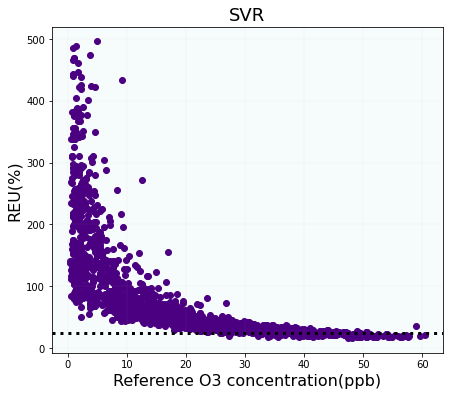

In [704]:
u_cal=REF(pred,y_test,1.2)
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.1)
ind=[]
U_cal=[]
Ref=[]
for i in range(len(u_cal)):
    if -50<u_cal[i]<500:
        U_cal.append(u_cal[i])
        Ref.append(y_test[i])
plt.scatter(Ref,U_cal, color='#4B0082')
plt.axhline(y=25, color='black', linestyle=':',linewidth=3)
plt.ylabel('REU(%)', fontsize=16)
plt.xlabel('Reference O3 concentration(ppb)',fontsize=16)
plt.grid(linestyle='-.',linewidth=0.1)
plt.title('SVR', fontsize=18)

plt.show()

In [705]:
import random
alpha=1.2
LV=max(y_test)
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([1 for i in range(len(ref))])
u=prec
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/LV)*100
Random=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV1=120
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([1 for i in range(len(ref))])
u=prec
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV1)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV1)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV1)**2
P3=(Beta_0+(Beta_1-1)*LV1)
P=P1+P2+P3
Bias1=(2*(P3)/(LV1))*100
Random1=(2*(P1+P2)**0.5/(LV1))*100

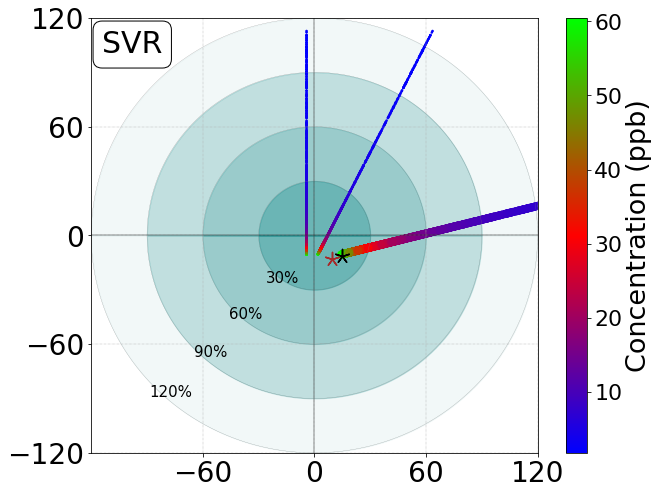

In [706]:
A=target(pred,y_test,1.2)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =30
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =60
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =90
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =120
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))

plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='teal', alpha=0.3)
plt.fill_between(a2, b2, color='teal',alpha=0.2)
plt.fill_between(a3, b3, color='teal',alpha=0.2)
plt.fill_between(a4, b4, color='teal',alpha=0.05)

x1=np.arange(0,30.1,0.1)
r1=30
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,60.1,0.1)
r2=60
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,90.1,0.1)
r3=90
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,120.1,0.1)
r4=120
y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=0.2, color='grey')
plt.plot(x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(x2,y2, linewidth=0.2, color='grey')
plt.plot(x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(x3,y3, linewidth=0.2, color='grey')
plt.plot(x3,-1*y3, linewidth=0.2, color='grey')
plt.plot(x4,y4, linewidth=0.2, color='grey')
plt.plot(x4,-1*y4, linewidth=0.2, color='grey')

plt.plot(-1*x1,y1, linewidth=0.2, color='grey')
plt.plot(-1*x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(-1*x2,y2, linewidth=0.2, color='grey')
plt.plot(-1*x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(-1*x3,y3, linewidth=0.2, color='grey')
plt.plot(-1*x3,-1*y3, linewidth=0.2, color='grey')
plt.plot(-1*x4,y4, linewidth=0.2, color='grey')
plt.plot(-1*x4,-1*y4, linewidth=0.2, color='grey')

#plt.xlabel('Random uncertainty effect (%)',fontsize=24)
#plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title('CO',fontsize=18)
color_map = plt.cm.get_cmap('brg')
reversed_color_map = color_map
plt.scatter(A[0],A[1],marker='.',s=200,c=np.array(A[2]),cmap=reversed_color_map)
plt.scatter(A[3],A[1],marker='.',s=10,c=np.array(A[2]),cmap=reversed_color_map)
plt.scatter(A[4],A[1],marker='.',s=10,c=np.array(A[2]),cmap=reversed_color_map)
plt.vlines([0], -130, 130,color='black',linewidth=0.4)
plt.hlines([0], -130, 130, color='black',linewidth=0.4)
plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-120)
plt.ylim(ymax=120)
plt.xlim(xmax=120)
plt.xlim(xmin=-120)
plt.xticks(np.arange(-60,121, 60),fontsize=28)
plt.yticks(np.arange(-120,121, 60),fontsize=28)
#plt.colorbar()
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=22)
cbar.set_label('Concentration (ppb)', rotation=90,fontsize=27)
plt.scatter(Random,Bias,marker=(5, 2),s=200, color='black')
plt.scatter(Random1+2,Bias1,marker=(5, 2),s=200, color='brown')
textstr = 'SVR'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.1, 1.26, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)
plt.text(-26,-26, '30%',fontsize=15)
plt.text(-46,-46, '60%',fontsize=15)
plt.text(-65,-67, '90%',fontsize=15)
plt.text(-89,-89, '120%',fontsize=15)
plt.show()

##  Model 3 : Random Forest

In [707]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 500,min_samples_split= 2,min_samples_leaf= 1,max_features= 'sqrt', 
                                  random_state = 0,max_depth=None,bootstrap=False)
# fit the regressor with x and y data
regressor.fit(X_train.drop(['Lab1'], axis=1), y_train)  

RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=500,
                      random_state=0)

In [708]:
Index=[i for i in range(len(y_test))]
features_O3=regressor.feature_importances_
pred = regressor.predict(X_test.drop(['Lab1'], axis=1))
pred_rf_o3=pred
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_rf_O3=sMAPE_lr
RMSE_rf_O3=RMSE_lr/np.mean(np.array(y_test))
Pearson_rf_O3=Pearson_lr
R2_rf_O3=round(sm.r2_score(y_test, pred), 2)
RMSE_Rf_O3=RMSE_lr
Pearson_rf_O3,R2_rf_O3,RMSE_Rf_O3

(0.99, 0.98, 2.3)

fig= plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
ax.plot(index,y_test, color='limegreen',linewidth=3)
ax.plot(index,pred, color='indigo',linewidth=3)
ax.plot(index,lab1, color='#426eff',linewidth=3)
plt.legend(['Ref', 'RF-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.79,1))
plt.ylabel('O3 Concentration(ppb)'.translate(subscript),fontsize=18)
plt.text(B-22, C,r'$R^{2}(RF)=$'+str(R2_rf_O3) , fontsize = 14, color='indigo')
plt.text(B-22, D,r'$R^{2}(Lab)=$'+str(R2_lab_O3) , fontsize = 14, color='#426eff')
plt.text(B-72, C, 'Pearson r(RF)='+str(Pearson_lr), fontsize = 14, color='indigo')
plt.text(B-72, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
plt.xlabel('Last 100 hours of testing period',fontsize=18)
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Random Forest(RF) vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [709]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))
MBE_RF_O3=MBE(pred,y_test)/np.std(y_test)
CRMSE_RF_O3=CRMSE(y_test,pred)/np.std(y_test)
pred_rf=pred

Regressor model performance:
Mean absolute error(MAE) = 1.65
Mean squared error(MSE) = 5.34
Median absolute error = 1.19
Explain variance score = 0.98
R2 score = 0.98


In [710]:
features_O3

array([0.09161521, 0.15443193, 0.20170717, 0.06756315, 0.01190181,
       0.07543335, 0.39734737])

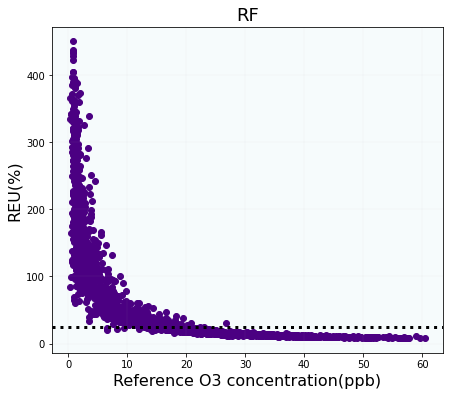

In [711]:
u_cal=REF(pred,y_test,1.2)
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.1)
ind=[]
U_cal=[]
Ref=[]
for i in range(len(u_cal)):
    if -50<u_cal[i]<500:
        U_cal.append(u_cal[i])
        Ref.append(y_test[i])
plt.scatter(Ref,U_cal, color='#4B0082')
plt.axhline(y=25, color='black', linestyle=':',linewidth=3)
plt.ylabel('REU(%)', fontsize=16)
plt.xlabel('Reference O3 concentration(ppb)',fontsize=16)
plt.grid(linestyle='-.',linewidth=0.1)
plt.title('RF', fontsize=18)
plt.show()

In [712]:
import random
alpha=1.2
LV=max(y_test)
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([1 for i in range(len(ref))])
u=prec
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/LV)*100
Random=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV1=120
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([1 for i in range(len(ref))])
u=prec
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV1)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV1)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV1)**2
P3=(Beta_0+(Beta_1-1)*LV1)
P=P1+P2+P3
Bias1=(2*(P3)/(LV1))*100
Random1=(2*(P1+P2)**0.5/(LV1))*100

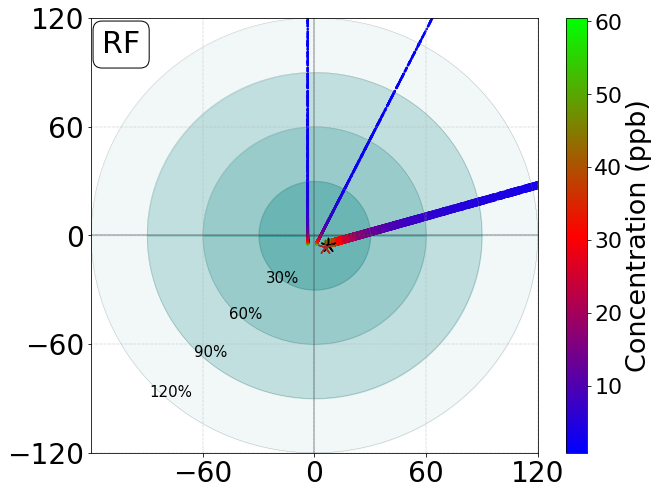

In [713]:
A=target(pred,y_test,1.2)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =30
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =60
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =90
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =120
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))

plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='teal', alpha=0.3)
plt.fill_between(a2, b2, color='teal',alpha=0.2)
plt.fill_between(a3, b3, color='teal',alpha=0.2)
plt.fill_between(a4, b4, color='teal',alpha=0.05)

x1=np.arange(0,30.1,0.1)
r1=30
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,60.1,0.1)
r2=60
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,90.1,0.1)
r3=90
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,120.1,0.1)
r4=120
y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=0.2, color='grey')
plt.plot(x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(x2,y2, linewidth=0.2, color='grey')
plt.plot(x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(x3,y3, linewidth=0.2, color='grey')
plt.plot(x3,-1*y3, linewidth=0.2, color='grey')
plt.plot(x4,y4, linewidth=0.2, color='grey')
plt.plot(x4,-1*y4, linewidth=0.2, color='grey')

plt.plot(-1*x1,y1, linewidth=0.2, color='grey')
plt.plot(-1*x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(-1*x2,y2, linewidth=0.2, color='grey')
plt.plot(-1*x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(-1*x3,y3, linewidth=0.2, color='grey')
plt.plot(-1*x3,-1*y3, linewidth=0.2, color='grey')
plt.plot(-1*x4,y4, linewidth=0.2, color='grey')
plt.plot(-1*x4,-1*y4, linewidth=0.2, color='grey')

#plt.xlabel('Random uncertainty effect (%)',fontsize=24)
#plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title('CO',fontsize=18)
color_map = plt.cm.get_cmap('brg')
reversed_color_map = color_map
plt.scatter(A[0],A[1],marker='.',s=200,c=np.array(A[2]),cmap=reversed_color_map)
plt.scatter(A[3],A[1],marker='.',s=10,c=np.array(A[2]),cmap=reversed_color_map)
plt.scatter(A[4],A[1],marker='.',s=10,c=np.array(A[2]),cmap=reversed_color_map)
plt.vlines([0], -130, 130,color='black',linewidth=0.4)
plt.hlines([0], -130, 130, color='black',linewidth=0.4)
plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-120)
plt.ylim(ymax=120)
plt.xlim(xmax=120)
plt.xlim(xmin=-120)
plt.xticks(np.arange(-60,121, 60),fontsize=28)
plt.yticks(np.arange(-120,121, 60),fontsize=28)
#plt.colorbar()
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=22)
cbar.set_label('Concentration (ppb)', rotation=90,fontsize=27)
plt.scatter(Random,Bias,marker=(5, 2),s=200, color='black')
plt.scatter(Random1+2,Bias1,marker=(5, 2),s=200, color='brown')
textstr = 'RF'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.1, 1.26, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)
plt.text(-26,-26, '30%',fontsize=15)
plt.text(-46,-46, '60%',fontsize=15)
plt.text(-65,-67, '90%',fontsize=15)
plt.text(-89,-89, '120%',fontsize=15)
plt.show()

In [714]:
A=[i for i in np.arange(1,20,0.1)]
K=[]
for i in A:
    k=REF2(pred,y_test,i,350)
    K.append(k)
for i in range(len(K)):
    if K[i]==min(K):
        print(A[i])

1.2000000000000002


## Model 4: ANN

In [715]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn.preprocessing import StandardScaler
model = Sequential()
model.add(Dense(6, input_shape = (7,),kernel_initializer='normal', activation= 'linear'))
model.add(Dense(128,kernel_initializer='normal', activation= 'relu'))
model.add(Dense(128, kernel_initializer='normal',activation= 'relu'))
model.add(Dense(100, kernel_initializer='normal',activation= 'relu'))
model.add(Dense(1,kernel_initializer='normal',activation='linear',))
sgd = optimizers.Adam(learning_rate=0.01)

model.compile(optimizer = sgd, loss = 'mean_squared_error', metrics= ['mse', 'mae'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 6)                 48        
_________________________________________________________________
dense_53 (Dense)             (None, 128)               896       
_________________________________________________________________
dense_54 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_55 (Dense)             (None, 100)               12900     
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 101       
Total params: 30,457
Trainable params: 30,457
Non-trainable params: 0
_________________________________________________________________


In [716]:
scaler = StandardScaler()
scaler.fit(X_train.drop(['Lab1'], axis=1))
X_train_scaled=scaler.transform(X_train.drop(['Lab1'], axis=1))
X_test_scaled=scaler.transform(X_test.drop(['Lab1'], axis=1))
model.fit(X_train_scaled, y_train, batch_size= 100, epochs=200, verbose= 0)

In [717]:
train_pred = model.predict(X_train_scaled)
test_pred = model.predict(X_test_scaled)
pred=[]
for i in range(len(test_pred)):
    pred.append(sum(list(test_pred[i])))
len(y_test)

2002

In [718]:

Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_ann_O3=sMAPE_lr
RMSE_ann_O3=RMSE_lr/np.mean(np.array(y_test))
Pearson_ann_O3=Pearson_lr
R2_ann_O3=round(sm.r2_score(y_test, pred), 2)
RMSE_Ann_O3=RMSE_lr
Pearson_ann_O3,R2_ann_O3,RMSE_Ann_O3

(0.99, 0.97, 2.5)

fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
ax.plot(index,y_test, color='limegreen',linewidth=3)
ax.plot(index,pred, color='tomato',linewidth=3)
ax.plot(index,lab1, color='#426eff',linewidth=3)
plt.legend(['Ref', 'ANN-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.75,1))
plt.ylabel('O3 Concentration(ppm)'.translate(subscript),fontsize=18)
#plt.text(B-5, C,r'$R^{2}(ANN)=$'+str(R2_ann_O3) , fontsize = 14, color='tomato')
#plt.text(B-5, D, r'$R^{2}(Lab)=$'+str(R2_lab_O3), fontsize = 14, color='#426eff')
#plt.text(B-70, C, 'Pearson r(ANN)='+str(Pearson_lr), fontsize = 14, color='tomato')
#plt.text(B-70, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
plt.xlabel('Testing period(hours)',fontsize=18)
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Artificial Neural Network(ANN) vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [719]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_ANN_O3=MBE(pred,y_test)/np.std(y_test)
CRMSE_ANN_O3=CRMSE(y_test,pred)/np.std(y_test)
pred_ann=pred

Regressor model performance:
Mean absolute error(MAE) = 1.84
Mean squared error(MSE) = 6.46
Median absolute error = 1.37
Explain variance score = 0.97
R2 score = 0.97


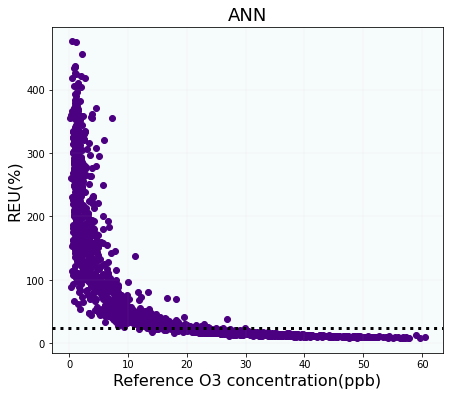

In [720]:
u_cal=REF(pred,y_test,1.2)
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.1)
ind=[]
U_cal=[]
Ref=[]
for i in range(len(u_cal)):
    if -50<u_cal[i]<500:
        U_cal.append(u_cal[i])
        Ref.append(y_test[i])
plt.scatter(Ref,U_cal, color='#4B0082')
plt.axhline(y=25, color='black', linestyle=':',linewidth=3)
plt.ylabel('REU(%)', fontsize=16)
plt.xlabel('Reference O3 concentration(ppb)',fontsize=16)
plt.grid(linestyle='-.',linewidth=0.1)
plt.title('ANN', fontsize=18)
plt.show()

In [721]:
import random
alpha=1.2
LV=max(y_test)
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([1 for i in range(len(ref))])
u=prec
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/LV)*100
Random=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV1=120
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([1 for i in range(len(ref))])
u=prec
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV1)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV1)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV1)**2
P3=(Beta_0+(Beta_1-1)*LV1)
P=P1+P2+P3
Bias1=(2*(P3)/(LV1))*100
Random1=(2*(P1+P2)**0.5/(LV1))*100

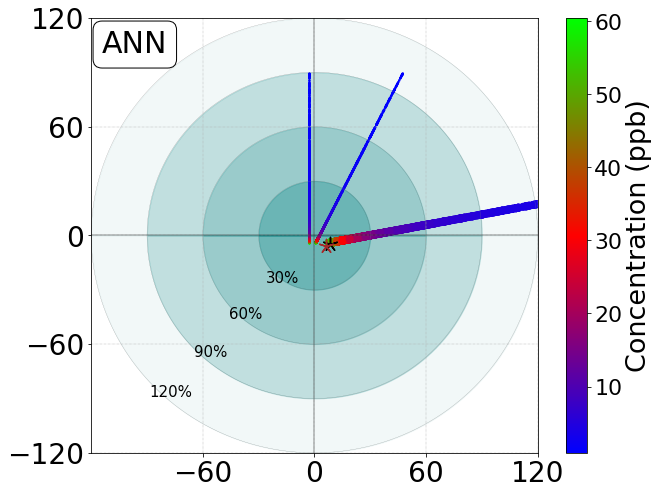

In [722]:
A=target(pred,y_test,1.2)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =30
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =60
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =90
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =120
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))

plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='teal', alpha=0.3)
plt.fill_between(a2, b2, color='teal',alpha=0.2)
plt.fill_between(a3, b3, color='teal',alpha=0.2)
plt.fill_between(a4, b4, color='teal',alpha=0.05)

x1=np.arange(0,30.1,0.1)
r1=30
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,60.1,0.1)
r2=60
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,90.1,0.1)
r3=90
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,120.1,0.1)
r4=120
y4=np.sqrt(r4**2-x4**2)

plt.plot(x1,y1, linewidth=0.2, color='grey')
plt.plot(x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(x2,y2, linewidth=0.2, color='grey')
plt.plot(x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(x3,y3, linewidth=0.2, color='grey')
plt.plot(x3,-1*y3, linewidth=0.2, color='grey')
plt.plot(x4,y4, linewidth=0.2, color='grey')
plt.plot(x4,-1*y4, linewidth=0.2, color='grey')

plt.plot(-1*x1,y1, linewidth=0.2, color='grey')
plt.plot(-1*x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(-1*x2,y2, linewidth=0.2, color='grey')
plt.plot(-1*x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(-1*x3,y3, linewidth=0.2, color='grey')
plt.plot(-1*x3,-1*y3, linewidth=0.2, color='grey')
plt.plot(-1*x4,y4, linewidth=0.2, color='grey')
plt.plot(-1*x4,-1*y4, linewidth=0.2, color='grey')

#plt.xlabel('Random uncertainty effect (%)',fontsize=24)
#plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title('CO',fontsize=18)
color_map = plt.cm.get_cmap('brg')
reversed_color_map = color_map
plt.scatter(A[0],A[1],marker='.',s=200,c=np.array(A[2]),cmap=reversed_color_map)
plt.scatter(A[3],A[1],marker='.',s=10,c=np.array(A[2]),cmap=reversed_color_map)
plt.scatter(A[4],A[1],marker='.',s=10,c=np.array(A[2]),cmap=reversed_color_map)
plt.vlines([0], -130, 130,color='black',linewidth=0.4)
plt.hlines([0], -130, 130, color='black',linewidth=0.4)
plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-120)
plt.ylim(ymax=120)
plt.xlim(xmax=120)
plt.xlim(xmin=-120)
plt.xticks(np.arange(-60,121, 60),fontsize=28)
plt.yticks(np.arange(-120,121, 60),fontsize=28)
#plt.colorbar()
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=22)
cbar.set_label('Concentration (ppb)', rotation=90,fontsize=27)
plt.scatter(Random,Bias,marker=(5, 2),s=200, color='black')
plt.scatter(Random1+2,Bias1,marker=(5, 2),s=200, color='brown')
textstr = 'ANN'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.1, 1.26, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)
plt.text(-26,-26, '30%',fontsize=15)
plt.text(-46,-46, '60%',fontsize=15)
plt.text(-65,-67, '90%',fontsize=15)
plt.text(-89,-89, '120%',fontsize=15)
plt.show()

# Model 5:  XGBoost

In [723]:
from xgboost import  XGBRegressor
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
# create an xgboost regression model
#n_estimators=10000, max_depth=5, eta=0.01, subsample=0.9,colsample_bytree=0.4,alpha=10
model = XGBRegressor(n_estimators=10000, max_depth=5, eta=0.01, subsample=0.9, 
                     colsample_bytree=0.4,alpha=10)

model.fit(X_train.drop(['Lab1'], axis=1),y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, eta=0.01, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [724]:
pred = model.predict(X_test.drop(['Lab1'], axis=1))
pred_xgb_o3=pred
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_xgb_O3=sMAPE_lr
RMSE_xgb_O3=RMSE_lr/np.mean(np.array(y_test))
Pearson_xgb_O3=Pearson_lr
R2_xgb_O3=round(sm.r2_score(y_test, pred), 2)
RMSE_Xgb_O3=RMSE_lr
Pearson_xgb_O3,R2_xgb_O3,RMSE_Xgb_O3

(0.98, 0.97, 2.6)

fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
ax.plot(index,y_test, color='limegreen',linewidth=3)
ax.plot(index,pred, color='darkgoldenrod',linewidth=3)
ax.plot(index,lab1, color='#426eff',linewidth=3)
plt.legend(['Ref', 'XGBoost-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.75,1))
plt.ylabel('O3 Concentration(ppb)'.translate(subscript),fontsize=18)
#plt.text(B-5, C,r'$R^{2}(XGB)=$'+str(R2_xgb_O3) , fontsize = 14, color='darkgoldenrod')
#plt.text(B-5, D,r'$R^{2}(Lab)=$'+str(R2_lab_O3) , fontsize = 14, color='#426eff')
#plt.text(B-70, C, 'Pearson r(XGB)='+str(Pearson_lr), fontsize = 14, color='darkgoldenrod')
#plt.text(B-70, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
plt.xlabel('Testing period(hours)',fontsize=18)
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('XGBoost vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [725]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))
MBE_XGB_O3=MBE(pred,y_test)/np.std(y_test)
CRMSE_XGB_O3=CRMSE(y_test,pred)/np.std(y_test)
pred_xgb=pred

Regressor model performance:
Mean absolute error(MAE) = 1.98
Mean squared error(MSE) = 7.0
Median absolute error = 1.57
Explain variance score = 0.97
R2 score = 0.97


In [726]:
A=len(y_test)-200

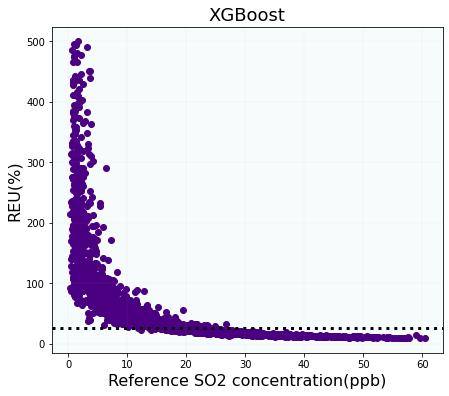

In [727]:
u_cal=REF(pred,y_test,1)
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.1)
ind=[]
U_cal=[]
Ref=[]
for i in range(len(u_cal)):
    if -50<u_cal[i]<500:
        U_cal.append(u_cal[i])
        Ref.append(y_test[i])
plt.scatter(Ref,U_cal, color='#4B0082')
plt.axhline(y=25, color='black', linestyle=':',linewidth=3)
plt.ylabel('REU(%)', fontsize=16)
plt.xlabel('Reference SO2 concentration(ppb)',fontsize=16)
plt.grid(linestyle='-.',linewidth=0.1)
plt.title('XGBoost', fontsize=18)
plt.show()

In [728]:
import random
alpha=1.2
LV=max(y_test)
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([1 for i in range(len(ref))])
u=prec
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/LV)*100
Random=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV1=120
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([1 for i in range(len(ref))])
u=prec
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV1)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV1)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV1)**2
P3=(Beta_0+(Beta_1-1)*LV1)
P=P1+P2+P3
Bias1=(2*(P3)/(LV1))*100
Random1=(2*(P1+P2)**0.5/(LV1))*100

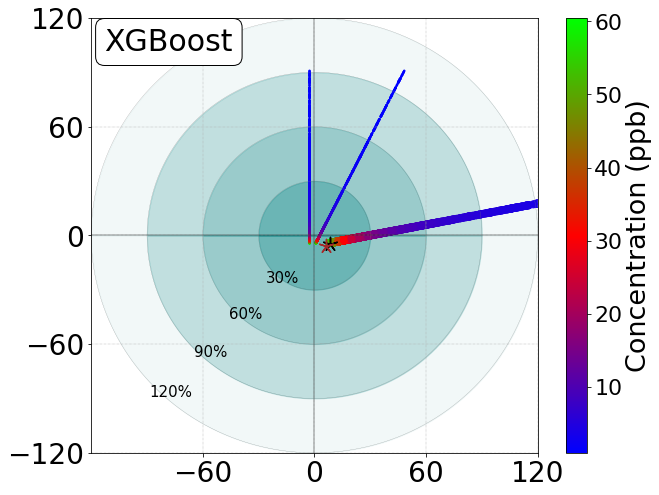

In [776]:
A=target(pred,y_test,1.2)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =30
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =60
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =90
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =120
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))

plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='teal', alpha=0.3)
plt.fill_between(a2, b2, color='teal',alpha=0.2)
plt.fill_between(a3, b3, color='teal',alpha=0.2)
plt.fill_between(a4, b4, color='teal',alpha=0.05)

x1=np.arange(0,30.1,0.1)
r1=30
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,60.1,0.1)
r2=60
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,90.1,0.1)
r3=90
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,120.1,0.1)
r4=120
y4=np.sqrt(r4**2-x4**2)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.plot(x1,y1, linewidth=0.2, color='grey')
plt.plot(x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(x2,y2, linewidth=0.2, color='grey')
plt.plot(x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(x3,y3, linewidth=0.2, color='grey')
plt.plot(x3,-1*y3, linewidth=0.2, color='grey')
plt.plot(x4,y4, linewidth=0.2, color='grey')
plt.plot(x4,-1*y4, linewidth=0.2, color='grey')

plt.plot(-1*x1,y1, linewidth=0.2, color='grey')
plt.plot(-1*x1,-1*y1, linewidth=0.2, color='grey')
plt.plot(-1*x2,y2, linewidth=0.2, color='grey')
plt.plot(-1*x2,-1*y2, linewidth=0.2, color='grey')
plt.plot(-1*x3,y3, linewidth=0.2, color='grey')
plt.plot(-1*x3,-1*y3, linewidth=0.2, color='grey')
plt.plot(-1*x4,y4, linewidth=0.2, color='grey')
plt.plot(-1*x4,-1*y4, linewidth=0.2, color='grey')

#plt.xlabel('Random uncertainty effect (%)',fontsize=24)
#plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title('CO',fontsize=18)
color_map = plt.cm.get_cmap('brg')
reversed_color_map = color_map
plt.scatter(A[0],A[1],marker='.',s=200,c=np.array(A[2]),cmap=reversed_color_map)
plt.scatter(A[3],A[1],marker='.',s=10,c=np.array(A[2]),cmap=reversed_color_map)
plt.scatter(A[4],A[1],marker='.',s=10,c=np.array(A[2]),cmap=reversed_color_map)
plt.vlines([0], -130, 130,color='black',linewidth=0.4)
plt.hlines([0], -130, 130, color='black',linewidth=0.4)
plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-120)
plt.ylim(ymax=120)
plt.xlim(xmax=120)
plt.xlim(xmin=-120)
plt.xticks(np.arange(-60,121, 60),fontsize=28)
plt.yticks(np.arange(-120,121, 60),fontsize=28)
#plt.colorbar()
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=22)
cbar.set_label('Concentration (ppb)', rotation=90,fontsize=27)
plt.scatter(Random,Bias,marker=(5, 2),s=200, color='black')
plt.scatter(Random1+2,Bias1,marker=(5, 2),s=200, color='brown')
textstr = 'XGBoost'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.047, 0.79, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)
plt.text(-26,-26, '30%',fontsize=15)
plt.text(-46,-46, '60%',fontsize=15)
plt.text(-65,-67, '90%',fontsize=15)
plt.text(-89,-89, '120%',fontsize=15)
plt.show()

# Data Analytics

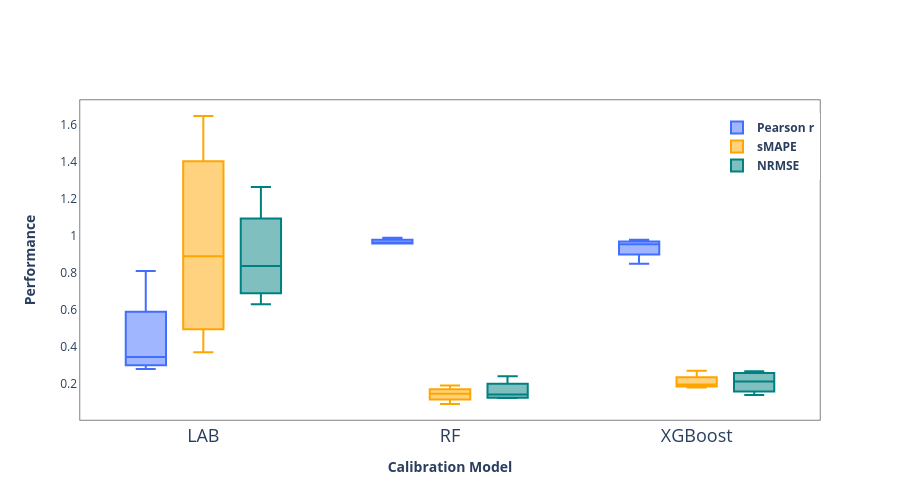

In [730]:
import chart_studio.plotly
import plotly.express as px
from IPython.display import Image
import plotly.graph_objects as go
import numpy as np

LAB_PR=[Pearson_lab_CO,Pearson_lab_NO2,Pearson_lab_SO2,Pearson_lab_O3]
LR_PR=[Pearson_lr_CO,Pearson_lr_NO2,Pearson_lr_SO2,Pearson_lr_O3]
SVR_PR=[Pearson_svr_CO,Pearson_svr_NO2,Pearson_svr_SO2,Pearson_svr_O3]
RF_PR=[Pearson_rf_CO,Pearson_rf_NO2,Pearson_rf_SO2,Pearson_rf_O3]
ANN_PR=[Pearson_ann_CO,Pearson_ann_NO2,Pearson_ann_SO2,Pearson_ann_O3]
XGB_PR=[Pearson_xgb_CO,Pearson_xgb_NO2,Pearson_xgb_SO2,Pearson_xgb_O3]


LAB_SM=[sMAPE_lab_CO,sMAPE_lab_NO2,sMAPE_lab_SO2,sMAPE_lab_O3]
LR_SM=[sMAPE_lr_CO,sMAPE_lr_NO2,sMAPE_lr_SO2,sMAPE_lr_O3]
SVR_SM=[sMAPE_svr_CO,sMAPE_svr_NO2,sMAPE_svr_SO2,sMAPE_svr_O3]
RF_SM=[sMAPE_rf_CO,sMAPE_rf_NO2,sMAPE_rf_SO2,sMAPE_rf_O3]
ANN_SM=[sMAPE_ann_CO,sMAPE_ann_NO2,sMAPE_ann_SO2,sMAPE_ann_O3]
XGB_SM=[sMAPE_xgb_CO,sMAPE_xgb_NO2,sMAPE_xgb_SO2,sMAPE_xgb_O3]

LAB_RM=[RMSE_lab_CO,RMSE_lab_NO2,RMSE_lab_SO2,RMSE_lab_O3]
LR_RM=[RMSE_lr_CO,RMSE_lr_NO2,RMSE_lr_SO2,RMSE_lr_O3]
SVR_RM=[RMSE_svr_CO,RMSE_svr_NO2,RMSE_svr_SO2,RMSE_svr_O3]
RF_RM=[RMSE_rf_CO,RMSE_rf_NO2,RMSE_rf_SO2,RMSE_rf_O3]
ANN_RM=[RMSE_ann_CO,RMSE_ann_NO2,RMSE_ann_SO2,RMSE_ann_O3]
XGB_RM=[RMSE_xgb_CO,RMSE_xgb_NO2,RMSE_xgb_SO2,RMSE_xgb_O3]

PR=LAB_PR+RF_PR+XGB_PR
SM=LAB_SM+RF_SM+XGB_SM
RM=LAB_RM+RF_RM+XGB_RM
x1=['LAB' for i in range(4)]
x2=['LR' for i in range(4)]
x3=['SVR' for i in range(4)]
x4=['RF' for i in range(4)]
x5=['ANN' for i in range(4)]
x6=['XGBoost' for i in range(4)]


x=x1+x4+x6
fig = go.Figure() 

# Defining x axis
x = x
fig.add_trace(go.Box(
  
    # defining y axis in corresponding
    # to x-axis
    y=PR,
    x=x,
    name='<b>Pearson r</b>',
    marker_color='#426eff'
))
  
fig.add_trace(go.Box(
    y=SM,
    x=x,
    name='<b>sMAPE</b>',
    marker_color='orange'

))
fig.add_trace(go.Box(
    y=RM,
    x=x,
    name='<b>NRMSE</b>',
    marker_color='teal'

))

fig.update_layout(autosize=False,
    width=900,
    height=500,
                  
  legend=dict(
    yanchor="bottom",
    y=0.75,
    xanchor="right",
    x=1),
    # group together boxes of the different
    # traces for each value of x
    boxmode='group',
                   plot_bgcolor='rgba(0,0,0,0)'
                  )

fig.update_xaxes(title_text="<b>Calibration Model</b>",tickfont = dict(size=18),showgrid=False,showline=True, 
                 linewidth=0.5, linecolor='black',mirror=True)
fig.update_yaxes(title_text="<b>Performance</b>",showgrid=False,showline=True, linewidth=0.5, linecolor='black',
                 mirror=True)
chart_studio.plotly.sign_in('vinylango', 'gybbJVWfRSUoTcRRSa6J')
chart_studio.plotly.image.save_as(fig, filename='models_boxplot.png')
Image('models_boxplot.png')

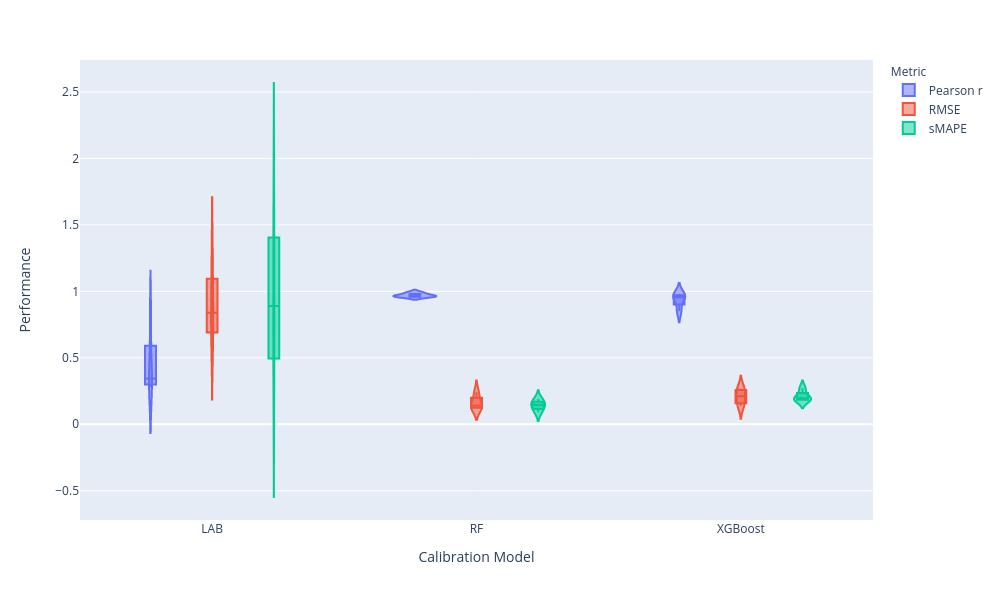

In [731]:
#Violin plot which also show the density of the distribution
import plotly.express as px
Metric1=['Pearson r' for i in range(len(PR))]
Metric2=['RMSE' for i in range(len(RM))]
Metric3=['sMAPE' for i in range(len(RM))]
Metric=Metric1+Metric2+Metric3
Model=x+x+x
Values=PR+RM+SM
lst=[[Model[i],Values[i],Metric[i]] for i in range(len(Model))]
df = pd.DataFrame(lst, columns =['Calibration Model', 'Performance','Metric'])

#fig = px.violin( df,y="Performance", x="Calibration Model", color='Metric', box=True,points="all",
          #hover_data=df.columns)
fig = px.violin( df,y="Performance", x="Calibration Model", color='Metric', box=True,
          hover_data=df.columns)


fig.update_layout(autosize=False,
    width=1000,
    height=600)
#fig.show()
chart_studio.plotly.sign_in('vinylango', 'gybbJVWfRSUoTcRRSa6J')
chart_studio.plotly.image.save_as(fig, filename='models_violinplots.png')
Image('models_violinplots.png')

## Target Diagrams

In [732]:
theta = np.linspace( 0 , 2 * np.pi , 150 )
 
radius = 1
 
a = radius * np.cos( theta )
b = radius * np.sin( theta )
CRMSE_LAB=[CRMSE_LAB_O3,CRMSE_LAB_CO,CRMSE_LAB_NO2,CRMSE_LAB_SO2]
CRMSE_LR=[CRMSE_LR_O3,CRMSE_LR_CO,CRMSE_LR_NO2,CRMSE_LR_SO2]
CRMSE_SVR=[CRMSE_SVR_O3,CRMSE_SVR_CO,CRMSE_SVR_NO2,CRMSE_SVR_SO2]
CRMSE_RF=[CRMSE_RF_O3,CRMSE_RF_CO,CRMSE_RF_NO2,CRMSE_RF_SO2]
CRMSE_ANN=[CRMSE_ANN_O3,CRMSE_ANN_CO,CRMSE_ANN_NO2,CRMSE_ANN_SO2]
CRMSE_XGB=[CRMSE_XGB_O3,CRMSE_XGB_CO,CRMSE_XGB_NO2,CRMSE_XGB_SO2]

MBE_LAB=[MBE_LAB_O3,MBE_LAB_CO,MBE_LAB_NO2,MBE_LAB_SO2]
MBE_LR=[MBE_LR_O3,MBE_LR_CO,MBE_LR_NO2,MBE_LR_SO2]
MBE_SVR=[MBE_SVR_O3,MBE_SVR_CO,MBE_SVR_NO2,MBE_SVR_SO2]
MBE_RF=[MBE_RF_O3,MBE_RF_CO,MBE_RF_NO2,MBE_RF_SO2]
MBE_ANN=[MBE_ANN_O3,MBE_ANN_CO,MBE_ANN_NO2,MBE_ANN_SO2]
MBE_XGB=[MBE_XGB_O3,MBE_XGB_CO,MBE_XGB_NO2,MBE_XGB_SO2]


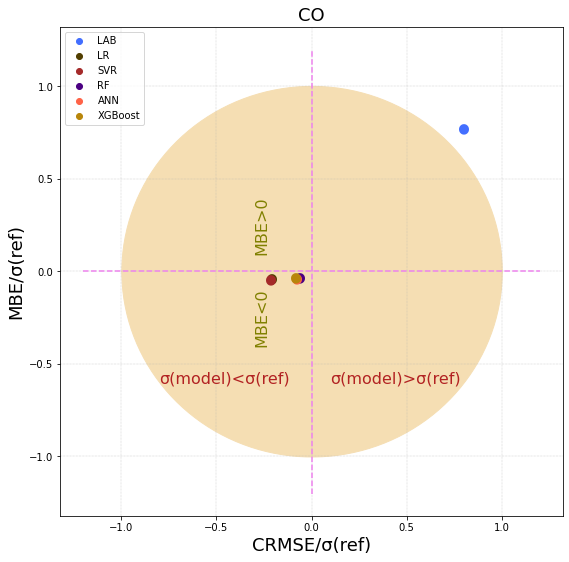

In [733]:
fig= plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
plt.text(CRMSE_LAB[0],MBE_LAB[0] , '•', rotation=90, va='center',fontsize = 36, color='#426eff')
plt.text(CRMSE_LR[0],MBE_LR[0] , '•', rotation=90, va='center',fontsize = 36, color='#513e00')
plt.text(CRMSE_SVR[0],MBE_SVR[0] , '•', rotation=90, va='center',fontsize = 36, color='brown')
plt.text(CRMSE_RF[0],MBE_RF[0] , '•', rotation=90, va='center',fontsize = 36, color='indigo')
plt.text(CRMSE_ANN[0],MBE_ANN[0] , '•', rotation=90, va='center',fontsize = 36, color='tomato')
plt.text(CRMSE_XGB[0],MBE_XGB[0] , '•', rotation=90, va='center',fontsize = 36, color='darkgoldenrod')
plt.scatter(CRMSE_LAB[2]/1.1,MBE_LAB[2],color='#426eff')
plt.scatter(CRMSE_LR,MBE_LR,color='#513e00')
plt.scatter(CRMSE_SVR[0],MBE_SVR[0],color='brown')
plt.scatter(CRMSE_RF,MBE_RF,color='indigo')
plt.scatter(CRMSE_ANN,MBE_ANN,color='tomato')
plt.scatter(CRMSE_XGB,MBE_XGB,color='darkgoldenrod')
plt.legend(['LAB','LR','SVR','RF','ANN','XGBoost'],loc = 2, bbox_to_anchor = (0,1))

plt.Circle((0, 0), 1, color='wheat')
plt.vlines([0], -1.2, 1.2, linestyles='dashed',color='violet')
plt.hlines([0], -1.2, 1.2, linestyles='dashed', color='violet')
plt.text(-0.8, -0.6, 'σ(model)<σ(ref)', fontsize = 16, color='firebrick')
plt.text(0.1, -0.6, 'σ(model)>σ(ref)', fontsize = 16, color='firebrick')
plt.text(-0.3, -0.25, 'MBE<0', rotation=90, va='center',fontsize = 16, color='olive')
plt.text(-0.3, 0.25, 'MBE>0', rotation=90, va='center',fontsize = 16, color='olive')
plt.fill_between(a, b, color='wheat')
plt.xlabel('CRMSE/σ(ref)',fontsize=18)
plt.ylabel('MBE/σ(ref)',fontsize=18)
plt.title('CO',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

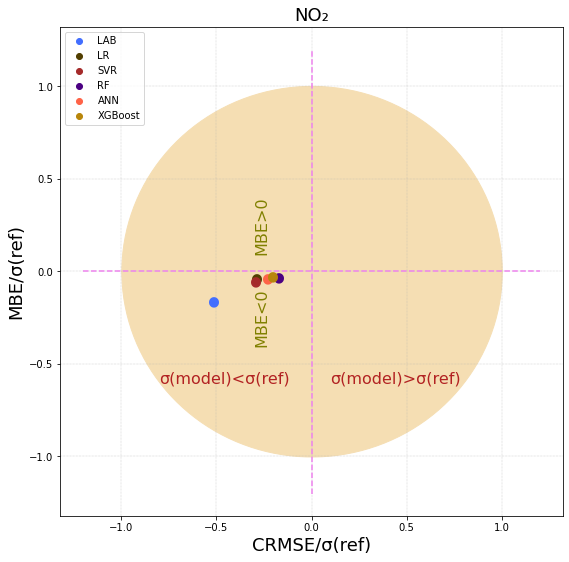

In [734]:
fig= plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
plt.text(CRMSE_LAB[1],MBE_LAB[1] , '•', rotation=90, va='center',fontsize = 36, color='#426eff')
plt.text(CRMSE_LR[1],MBE_LR[1] , '•', rotation=90, va='center',fontsize = 36, color='#513e00')
plt.text(CRMSE_SVR[1],MBE_SVR[1] , '•', rotation=90, va='center',fontsize = 36, color='brown')
plt.text(CRMSE_RF[1],MBE_RF[1] , '•', rotation=90, va='center',fontsize = 36, color='indigo')
plt.text(CRMSE_ANN[1],MBE_ANN[1] , '•', rotation=90, va='center',fontsize = 36, color='tomato')
plt.text(CRMSE_XGB[1],MBE_XGB[1] , '•', rotation=90, va='center',fontsize = 36, color='darkgoldenrod')
plt.scatter(CRMSE_LAB[2]/1.1,MBE_LAB[2],color='#426eff')
plt.scatter(CRMSE_LR,MBE_LR,color='#513e00')
plt.scatter(CRMSE_SVR[0],MBE_SVR[0],color='brown')
plt.scatter(CRMSE_RF,MBE_RF,color='indigo')
plt.scatter(CRMSE_ANN,MBE_ANN,color='tomato')
plt.scatter(CRMSE_XGB,MBE_XGB,color='darkgoldenrod')
plt.legend(['LAB','LR','SVR','RF','ANN','XGBoost'],loc = 2, bbox_to_anchor = (0,1))
plt.Circle((0, 0), 1, color='wheat')
plt.vlines([0], -1.2, 1.2, linestyles='dashed',color='violet')
plt.hlines([0], -1.2, 1.2, linestyles='dashed', color='violet')
plt.text(-0.8, -0.6, 'σ(model)<σ(ref)', fontsize = 16, color='firebrick')
plt.text(0.1, -0.6, 'σ(model)>σ(ref)', fontsize = 16, color='firebrick')
plt.text(-0.3, -0.25, 'MBE<0', rotation=90, va='center',fontsize = 16, color='olive')
plt.text(-0.3, 0.25, 'MBE>0', rotation=90, va='center',fontsize = 16, color='olive')
plt.fill_between(a, b, color='wheat')
plt.xlabel('CRMSE/σ(ref)',fontsize=18)
plt.ylabel('MBE/σ(ref)',fontsize=18)
plt.title('NO2'.translate(subscript),fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

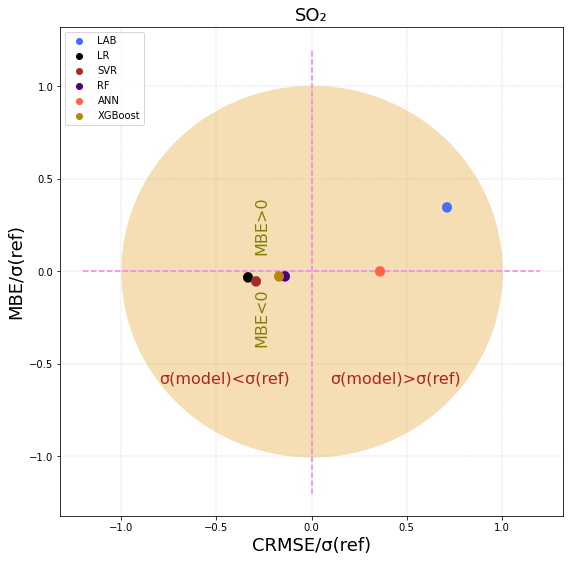

In [735]:
fig= plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
plt.text(CRMSE_LAB[2],MBE_LAB[2] , '•', rotation=90, va='center',fontsize = 36, color='#426eff')
plt.text(CRMSE_LR[2],MBE_LR[2] , '•', rotation=90, va='center',fontsize = 36, color='black')
plt.text(CRMSE_SVR[2],MBE_SVR[2] , '•', rotation=90, va='center',fontsize = 36, color='brown')
plt.text(CRMSE_RF[2],MBE_RF[2] , '•', rotation=90, va='center',fontsize = 36, color='indigo')
plt.text(CRMSE_ANN[2],MBE_ANN[2] , '•', rotation=90, va='center',fontsize = 36, color='tomato')
plt.text(CRMSE_XGB[2],MBE_XGB[2] , '•', rotation=90, va='center',fontsize = 36, color='darkgoldenrod')
plt.scatter(CRMSE_LAB[2]/1.1,MBE_LAB[2],color='#426eff')
plt.scatter(CRMSE_LR,MBE_LR,color='black')
plt.scatter(CRMSE_SVR[0],MBE_SVR[0],color='brown')
plt.scatter(CRMSE_RF,MBE_RF,color='indigo')
plt.scatter(CRMSE_ANN,MBE_ANN,color='tomato')
plt.scatter(CRMSE_XGB,MBE_XGB,color='darkgoldenrod')
plt.legend(['LAB','LR','SVR','RF','ANN','XGBoost'],loc = 2, bbox_to_anchor = (0,1))
plt.Circle((0, 0), 1, color='wheat')
plt.vlines([0], -1.2, 1.2, linestyles='dashed',color='violet')
plt.hlines([0], -1.2, 1.2, linestyles='dashed', color='violet')
plt.text(-0.8, -0.6, 'σ(model)<σ(ref)', fontsize = 16, color='firebrick')
plt.text(0.1, -0.6, 'σ(model)>σ(ref)', fontsize = 16, color='firebrick')
plt.text(-0.3, -0.25, 'MBE<0', rotation=90, va='center',fontsize = 16, color='olive')
plt.text(-0.3, 0.25, 'MBE>0', rotation=90, va='center',fontsize = 16, color='olive')
plt.fill_between(a, b, color='wheat')
plt.xlabel('CRMSE/σ(ref)',fontsize=18)
plt.ylabel('MBE/σ(ref)',fontsize=18)
plt.title('SO2'.translate(subscript),fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

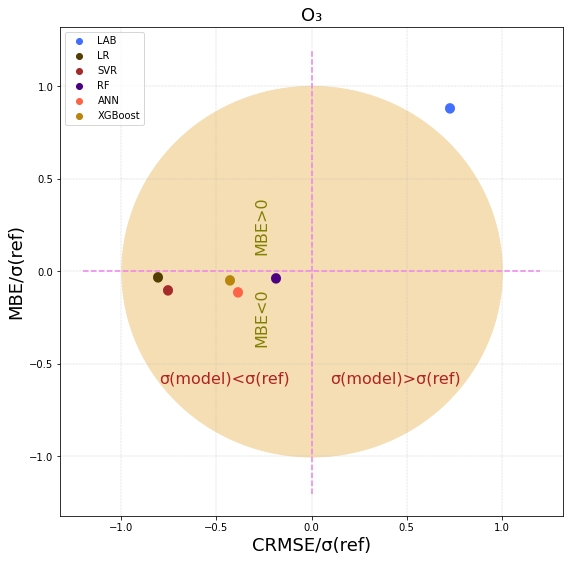

<Figure size 432x288 with 0 Axes>

In [736]:
fig= plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
plt.text(CRMSE_LAB[3],MBE_LAB[3]/1.5 , '•', rotation=90, va='center',fontsize = 36, color='#426eff')
plt.text(CRMSE_LR[3],MBE_LR[3] , '•', rotation=90, va='center',fontsize = 36, color='#513e00')
plt.text(CRMSE_SVR[3],MBE_SVR[3] , '•', rotation=90, va='center',fontsize = 36, color='brown')
plt.text(CRMSE_RF[3],MBE_RF[3] , '•', rotation=90, va='center',fontsize = 36, color='indigo')
plt.text(CRMSE_ANN[3],MBE_ANN[3] , '•', rotation=90, va='center',fontsize = 36, color='tomato')
plt.text(CRMSE_XGB[3],MBE_XGB[3] , '•', rotation=90, va='center',fontsize = 36, color='darkgoldenrod')
plt.scatter(CRMSE_LAB[2]/1.1,MBE_LAB[2]/1.7,color='#426eff')
plt.scatter(CRMSE_LR,MBE_LR,color='#513e00')
plt.scatter(CRMSE_SVR[0],MBE_SVR[0],color='brown')
plt.scatter(CRMSE_RF,MBE_RF,color='indigo')
plt.scatter(CRMSE_ANN,MBE_ANN,color='tomato')
plt.scatter(CRMSE_XGB,MBE_XGB,color='darkgoldenrod')
plt.legend(['LAB','LR','SVR','RF','ANN','XGBoost'],loc = 2, bbox_to_anchor = (0,1))
plt.Circle((0, 0), 1, color='wheat')
plt.vlines([0], -1.2, 1.2, linestyles='dashed',color='violet')
plt.hlines([0], -1.2, 1.2, linestyles='dashed', color='violet')
plt.text(-0.8, -0.6, 'σ(model)<σ(ref)', fontsize = 16, color='firebrick')
plt.text(0.1, -0.6, 'σ(model)>σ(ref)', fontsize = 16, color='firebrick')
plt.text(-0.3, -0.25, 'MBE<0', rotation=90, va='center',fontsize = 16, color='olive')
plt.text(-0.3, 0.25, 'MBE>0', rotation=90, va='center',fontsize = 16, color='olive')
plt.fill_between(a, b, color='wheat')
plt.xlabel('CRMSE/σ(ref)',fontsize=18)
plt.ylabel('MBE/σ(ref)',fontsize=18)
plt.title('O3'.translate(subscript),fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()
plt.savefig("Target2.pdf", format="pdf", bbox_inches="tight")

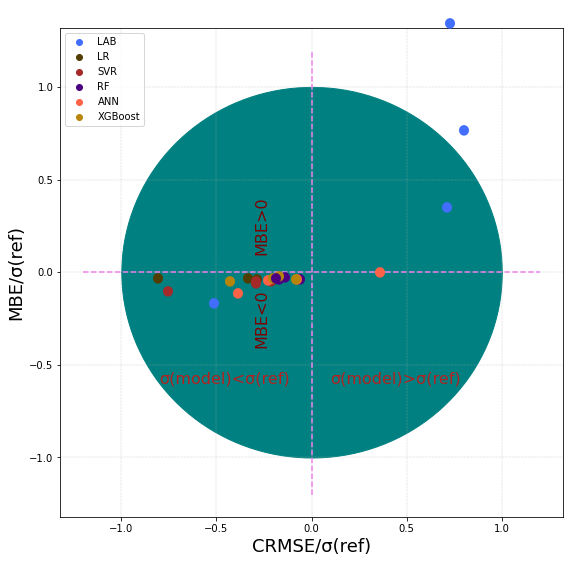

In [737]:
fig= plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
for i in range(4):
    plt.text(CRMSE_LAB[i],MBE_LAB[i] , '•', rotation=90, va='center',fontsize = 36, color='#426eff')
    plt.text(CRMSE_LR[i],MBE_LR[i] , '•', rotation=90, va='center',fontsize = 36, color='#513e00')
    plt.text(CRMSE_SVR[i],MBE_SVR[i] , '•', rotation=90, va='center',fontsize = 36, color='brown')
    plt.text(CRMSE_RF[i],MBE_RF[i] , '•', rotation=90, va='center',fontsize = 36, color='indigo')
    plt.text(CRMSE_ANN[i],MBE_ANN[i] , '•', rotation=90, va='center',fontsize = 36, color='tomato')
    plt.text(CRMSE_XGB[i],MBE_XGB[i] , '•', rotation=90, va='center',fontsize = 36, color='darkgoldenrod')
plt.scatter(CRMSE_LAB[2]-0.2,MBE_LAB[2],color='#426eff')
plt.scatter(CRMSE_LR,MBE_LR,color='#513e00')
plt.scatter(CRMSE_SVR,MBE_SVR,color='brown')
plt.scatter(CRMSE_RF,MBE_RF,color='indigo')
plt.scatter(CRMSE_ANN,MBE_ANN,color='tomato')
plt.scatter(CRMSE_XGB,MBE_XGB,color='darkgoldenrod')
plt.legend(['LAB','LR','SVR','RF','ANN','XGBoost'],loc = 2, bbox_to_anchor = (0,1))
plt.vlines([0], -1.2, 1.2, linestyles='dashed',color='violet')
plt.hlines([0], -1.2, 1.2, linestyles='dashed', color='violet')
plt.text(-0.8, -0.6, 'σ(model)<σ(ref)', fontsize = 16, color='firebrick')
plt.text(0.1, -0.6, 'σ(model)>σ(ref)', fontsize = 16, color='firebrick')
plt.text(-0.3, -0.25, 'MBE<0', rotation=90, va='center',fontsize = 16, color='maroon')
plt.text(-0.3, 0.25, 'MBE>0', rotation=90, va='center',fontsize = 16, color='maroon')
plt.fill_between(a, b, color='teal')
plt.xlabel('CRMSE/σ(ref)',fontsize=18)
plt.ylabel('MBE/σ(ref)',fontsize=18)
#plt.title('Overal',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

## Feature Importance

# libraries
import numpy as np
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(10,5)) 
# set width of bars
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
barWidth = 0.15
 
# set heights of bars
Signal1 = [features_CO[0],features_NO2[0],features_SO2[0],features_O3[0]]
Signal2 = [features_CO[1],features_NO2[1],features_SO2[1],features_O3[1]]
Signal3 = [features_CO[2],features_NO2[2],features_SO2[2],features_O3[2]]
Signal4 = [features_CO[3],features_NO2[3],features_SO2[3],features_O3[3]]
Temp = [features_CO[4],features_NO2[4],features_SO2[4],features_O3[4]]
RH = [features_CO[5],features_NO2[5],features_SO2[5],features_O3[5]]


 
# Set position of bar on X axis
r1 = np.arange(len(Signal1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
 
 
# Make the plot
plt.bar(r1, Signal1, color='magenta', width=barWidth, edgecolor='white', label='CO')
plt.bar(r2, Signal2, color='teal', width=barWidth, edgecolor='white', label='NO2')
plt.bar(r3, Signal3, color='salmon', width=barWidth, edgecolor='white', label='SO2')
plt.bar(r4, Signal4, color='rebeccapurple', width=barWidth, edgecolor='white', label='O3')
plt.bar(r5, Temp, color='olive', width=barWidth, edgecolor='white', label='Temperature')
plt.bar(r6, RH, color='darkgoldenrod', width=barWidth, edgecolor='white', label='RH')
 
# Add xticks on the middle of the group bars
plt.xlabel('Sensor', fontweight='bold')
plt.ylabel('Feature Importance', fontweight='bold')
plt.xticks([r + barWidth+0.25 for r in range(len(Signal1))], ['CO', 'NO2', 'SO2', 'O3'])
 
# Create legend & Show graphic
plt.legend()
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

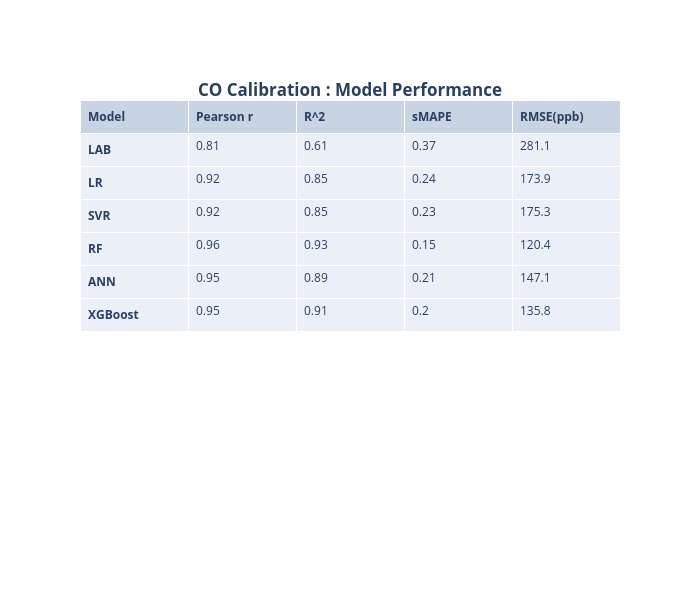

In [738]:
import plotly.graph_objects as go
import pandas as pd
model=['<b>LAB</b>','<b>LR</b>','<b>SVR</b>','<b>RF</b>','<b>ANN</b>','<b>XGBoost</b>']
Pearson=[Pearson_lab_CO,Pearson_lr_CO,Pearson_svr_CO,Pearson_rf_CO,Pearson_ann_CO,Pearson_xgb_CO]
         
R2=[R2_lab_CO,R2_lr_CO,R2_svr_CO,R2_rf_CO,R2_ann_CO,R2_xgb_CO]
RMSE=[RMSE_Lab_CO,RMSE_Lr_CO,RMSE_Svr_CO,RMSE_Rf_CO,RMSE_Ann_CO,RMSE_Xgb_CO]
sMAPE=[sMAPE_lab_CO,sMAPE_lr_CO,sMAPE_svr_CO,sMAPE_rf_CO,sMAPE_ann_CO,sMAPE_xgb_CO]

fig = go.Figure(data=[go.Table(
    header=dict(values=['<b>Model</b>','<b>Pearson r</b>','<b>R^2</b>','<b>sMAPE</b>','<b>RMSE(ppb)</b>'],
                #fill_color='white',
                align='left'),
    cells=dict(values=[model,Pearson,R2,sMAPE,RMSE ],
               #fill_color='white',
               align='left'))
   ])

fig.update_layout(
title={'text': "<b>CO Calibration : Model Performance</b>",
        'y':0.86,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
width=700,
height=600,
)
fig.show()
chart_studio.plotly.sign_in('vinylango', 'gybbJVWfRSUoTcRRSa6J')
chart_studio.plotly.image.save_as(fig, filename='models_performance_CO.png')
Image('models_performance_CO.png')


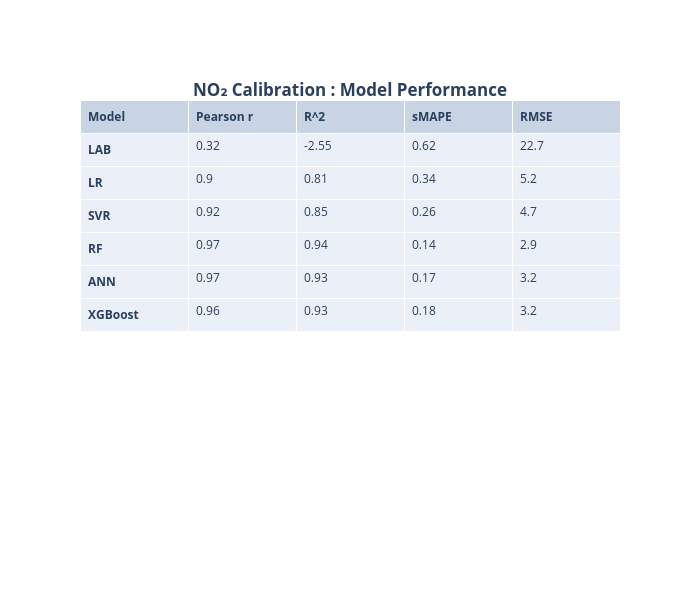

In [739]:
import plotly.graph_objects as go
import pandas as pd
model=['<b>LAB</b>','<b>LR</b>','<b>SVR</b>','<b>RF</b>','<b>ANN</b>','<b>XGBoost</b>']
Pearson=[Pearson_lab_NO2,Pearson_lr_NO2,Pearson_svr_NO2,Pearson_rf_NO2,Pearson_ann_NO2,Pearson_xgb_NO2]
R2=[R2_lab_NO2,R2_lr_NO2,R2_svr_NO2,R2_rf_NO2,R2_ann_NO2,R2_xgb_NO2]
RMSE=[RMSE_Lab_NO2,RMSE_Lr_NO2,RMSE_Svr_NO2,RMSE_Rf_NO2,RMSE_Ann_NO2,RMSE_Xgb_NO2]
sMAPE=[sMAPE_lab_NO2,sMAPE_lr_NO2,sMAPE_svr_NO2,sMAPE_rf_NO2,sMAPE_ann_NO2,sMAPE_xgb_NO2]

fig = go.Figure(data=[go.Table(
    header=dict(values=['<b>Model</b>','<b>Pearson r</b>','<b>R^2</b>','<b>sMAPE</b>','<b>RMSE</b>'],
                #fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[model,Pearson,R2,sMAPE,RMSE ],
               #fill_color='lavender',
               align='left'))
   ])
fig.update_layout(
title={'text': "<b>NO2 Calibration : Model Performance</b>".translate(subscript),
        'y':0.86,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
width=700,
height=600,

)
fig.show()
chart_studio.plotly.sign_in('vinylango', 'gybbJVWfRSUoTcRRSa6J')
chart_studio.plotly.image.save_as(fig, filename='models_performance_NO2.png')
Image('models_performance_NO2.png')

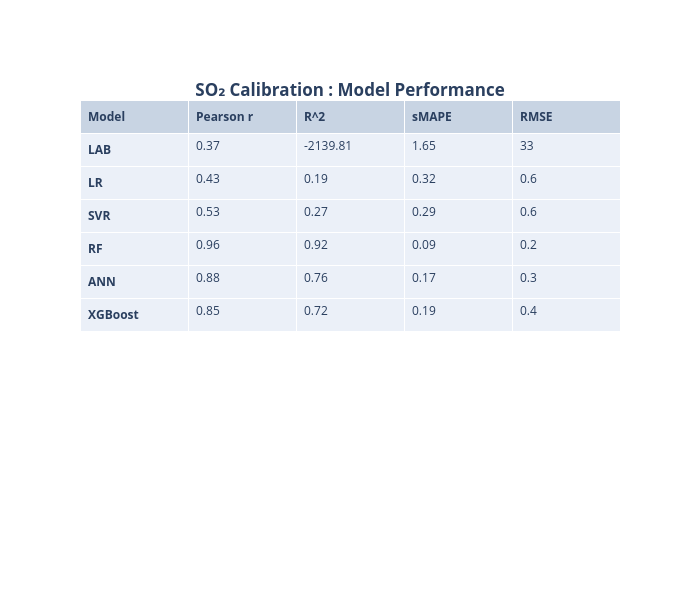

In [740]:
import plotly.graph_objects as go
import pandas as pd
model=['<b>LAB</b>','<b>LR</b>','<b>SVR</b>','<b>RF</b>','<b>ANN</b>','<b>XGBoost</b>']
Pearson=[Pearson_lab_SO2,Pearson_lr_SO2,Pearson_svr_SO2,Pearson_rf_SO2,Pearson_ann_SO2,Pearson_xgb_SO2]
R2=[R2_lab_SO2,R2_lr_SO2,R2_svr_SO2,R2_rf_SO2,R2_ann_SO2,R2_xgb_SO2,]
RMSE=[RMSE_Lab_SO2,RMSE_Lr_SO2,RMSE_Svr_SO2,RMSE_Rf_SO2,RMSE_Ann_SO2,RMSE_Xgb_SO2]
sMAPE=[sMAPE_lab_SO2,sMAPE_lr_SO2,sMAPE_svr_SO2,sMAPE_rf_SO2,sMAPE_ann_SO2,sMAPE_xgb_SO2]

fig = go.Figure(data=[go.Table(
    header=dict(values=['<b>Model</b>','<b>Pearson r</b>','<b>R^2</b>','<b>sMAPE</b>','<b>RMSE</b>'],
                #fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[model,Pearson,R2,sMAPE,RMSE ],
               #fill_color='lavender',
               align='left'))
   ])
fig.update_layout(
title={'text': "<b>SO2 Calibration : Model Performance</b>".translate(subscript),
        'y':0.86,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
width=700,
height=600,

)
fig.show()
chart_studio.plotly.sign_in('vinylango', 'gybbJVWfRSUoTcRRSa6J')
chart_studio.plotly.image.save_as(fig, filename='models_performance_SO2.png')
Image('models_performance_SO2.png')

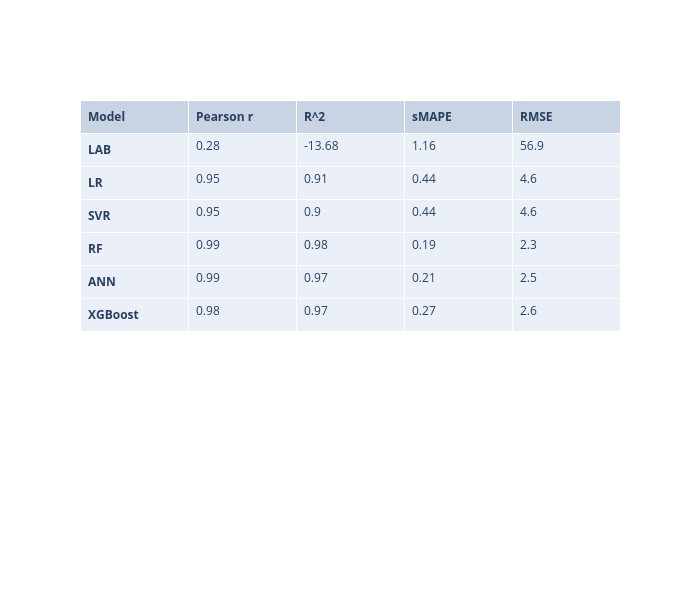

In [741]:
import plotly.graph_objects as go
import pandas as pd
model=['<b>LAB</b>','<b>LR</b>','<b>SVR</b>','<b>RF</b>','<b>ANN</b>','<b>XGBoost</b>']
Pearson=[str(Pearson_lab_O3),Pearson_lr_O3,Pearson_svr_O3,Pearson_rf_O3,Pearson_ann_O3,Pearson_xgb_O3]
R2=[R2_lab_O3,R2_lr_O3,R2_svr_O3,R2_rf_O3,R2_ann_O3,R2_xgb_O3]
RMSE=[RMSE_Lab_O3,RMSE_Lr_O3,RMSE_Svr_O3,RMSE_Rf_O3,RMSE_Ann_O3,RMSE_Xgb_O3]
sMAPE=[sMAPE_lab_O3,sMAPE_lr_O3,sMAPE_svr_O3,sMAPE_rf_O3,sMAPE_ann_O3,sMAPE_xgb_O3]

fig = go.Figure(data=[go.Table(
    header=dict(values=['<b>Model</b>','<b>Pearson r</b>','<b>R^2</b>','<b>sMAPE</b>','<b>RMSE</b>'],
                #fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[model,Pearson,R2,sMAPE,RMSE ],
               #fill_color='lavender',
               align='left'))
   ])
fig.update_layout(
title={#'text': "<b>O3 Calibration : Model Performance</b>".translate(subscript),
        'y':0.86,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
width=700,
height=600,

)
fig.show()
chart_studio.plotly.sign_in('vinylango', 'gybbJVWfRSUoTcRRSa6J')
chart_studio.plotly.image.save_as(fig, filename='models_performance_O3.png')
Image('models_performance_O3.png')

In [742]:
Pearson_lab=np.array([Pearson_lab_CO,Pearson_lab_NO2,Pearson_lab_SO2,Pearson_lab_O3])
Pearson_lr=np.array([Pearson_lr_CO,Pearson_lr_NO2,Pearson_lr_SO2,Pearson_lr_O3])
Pearson_svr=np.array([Pearson_svr_CO,Pearson_svr_NO2,Pearson_svr_SO2,Pearson_svr_O3])
Pearson_rf=np.array([Pearson_rf_CO,Pearson_rf_NO2,Pearson_rf_SO2,Pearson_rf_O3])
Pearson_ann=np.array([Pearson_ann_CO,Pearson_ann_NO2,Pearson_ann_SO2,Pearson_ann_O3])
Pearson_xgb=np.array([Pearson_xgb_CO,Pearson_xgb_NO2,Pearson_xgb_SO2,Pearson_xgb_O3])
R2_lab=np.array([R2_lab_CO,R2_lab_NO2,R2_lab_SO2,R2_lab_O3])
R2_lr=np.array([R2_lr_CO,R2_lr_NO2,R2_lr_SO2,R2_lr_O3])
R2_svr=np.array([R2_svr_CO,R2_svr_NO2,R2_svr_SO2,R2_svr_O3])
R2_rf=np.array([R2_rf_CO,R2_rf_NO2,R2_rf_SO2,R2_rf_O3])
R2_ann=np.array([R2_ann_CO,R2_ann_NO2,R2_ann_SO2,R2_ann_O3])
R2_xgb=np.array([R2_xgb_CO,R2_xgb_NO2,R2_xgb_SO2,R2_xgb_O3])
RMSE_lab=np.array([RMSE_Lab_CO,RMSE_Lab_NO2,RMSE_Lab_SO2,RMSE_Lab_O3])
RMSE_lr=np.array([RMSE_Lr_CO,RMSE_Lr_NO2,RMSE_Lr_SO2,RMSE_Lr_O3])
RMSE_svr=np.array([RMSE_Svr_CO,RMSE_Svr_NO2,RMSE_Svr_SO2,RMSE_Svr_O3])
RMSE_rf=np.array([RMSE_Rf_CO,RMSE_Rf_NO2,RMSE_Rf_SO2,RMSE_Rf_O3])
RMSE_ann=np.array([RMSE_Ann_CO,RMSE_Ann_NO2,RMSE_Ann_SO2,RMSE_Ann_O3])
RMSE_xgb=np.array([RMSE_Xgb_CO,RMSE_Xgb_NO2,RMSE_Xgb_SO2,RMSE_Xgb_O3])
sMAPE_lab=np.array([sMAPE_lab_CO,sMAPE_lab_NO2,sMAPE_lab_SO2,sMAPE_lab_O3])
sMAPE_lr=np.array([sMAPE_lr_CO,sMAPE_lr_NO2,sMAPE_lr_SO2,sMAPE_lr_O3])
sMAPE_svr=np.array([sMAPE_svr_CO,sMAPE_svr_NO2,sMAPE_svr_SO2,sMAPE_svr_O3])
sMAPE_rf=np.array([sMAPE_rf_CO,sMAPE_rf_NO2,sMAPE_rf_SO2,sMAPE_rf_O3])
sMAPE_ann=np.array([sMAPE_ann_CO,sMAPE_ann_NO2,sMAPE_ann_SO2,sMAPE_ann_O3])
sMAPE_xgb=np.array([sMAPE_xgb_CO,sMAPE_xgb_NO2,sMAPE_xgb_SO2,sMAPE_xgb_O3])
Pearson_lab_mean=round(np.mean(Pearson_lab),2)
Pearson_lab_std=round(np.std(Pearson_lab),2)
Pearson_lr_mean=round(np.mean(Pearson_lr),2)
Pearson_lr_std=round(np.std(Pearson_lr),2)
Pearson_svr_mean=round(np.mean(Pearson_svr),2)
Pearson_svr_std=round(np.std(Pearson_svr),2)
Pearson_rf_mean=round(np.mean(Pearson_rf),2)
Pearson_rf_std=round(np.std(Pearson_rf),2)
Pearson_ann_mean=round(np.mean(Pearson_ann),2)
Pearson_ann_std=round(np.std(Pearson_ann),2)
Pearson_xgb_mean=round(np.mean(Pearson_xgb),2)
Pearson_xgb_std=round(np.std(Pearson_xgb),2)
R2_lab_mean=round(np.mean(R2_lab),2)
R2_lab_std=round(np.std(R2_lab),2)
R2_lr_mean=round(np.mean(R2_lr),2)
R2_lr_std=round(np.std(R2_lr),2)
R2_svr_mean=round(np.mean(R2_svr),2)
R2_svr_std=round(np.std(R2_svr),2)
R2_rf_mean=round(np.mean(R2_rf),2)
R2_rf_std=round(np.std(R2_rf),2)
R2_ann_mean=round(np.mean(R2_ann),2)
R2_ann_std=round(np.std(R2_ann),2)
R2_xgb_mean=round(np.mean(R2_xgb),2)
R2_xgb_std=round(np.std(R2_xgb),2)
RMSE_lab_mean=round(np.mean(RMSE_lab),2)
RMSE_lab_std=round(np.std(RMSE_lab),2)
RMSE_lr_mean=round(np.mean(RMSE_lr),2)
RMSE_lr_std=round(np.std(RMSE_lr),2)
RMSE_svr_mean=round(np.mean(RMSE_svr),2)
RMSE_svr_std=round(np.std(RMSE_svr),2)
RMSE_rf_mean=round(np.mean(RMSE_rf),2)
RMSE_rf_std=round(np.std(RMSE_rf),2)
RMSE_ann_mean=round(np.mean(RMSE_ann),2)
RMSE_ann_std=round(np.std(RMSE_ann),2)
RMSE_xgb_mean=round(np.mean(RMSE_xgb),2)
RMSE_xgb_std=round(np.std(RMSE_xgb),2)
sMAPE_lab_mean=round(np.mean(sMAPE_lab),2)
sMAPE_lab_std=round(np.std(sMAPE_lab),2)
sMAPE_lr_mean=round(np.mean(sMAPE_lr),2)
sMAPE_lr_std=round(np.std(sMAPE_lr),2)
sMAPE_svr_mean=round(np.mean(sMAPE_svr),2)
sMAPE_svr_std=round(np.std(sMAPE_svr),2)
sMAPE_rf_mean=round(np.mean(sMAPE_rf),2)
sMAPE_rf_std=round(np.std(sMAPE_rf),2)
sMAPE_ann_mean=round(np.mean(sMAPE_ann),2)
sMAPE_ann_std=round(np.std(sMAPE_ann),2)
sMAPE_xgb_mean=round(np.mean(sMAPE_xgb),2)
sMAPE_xgb_std=round(np.std(sMAPE_xgb),2)

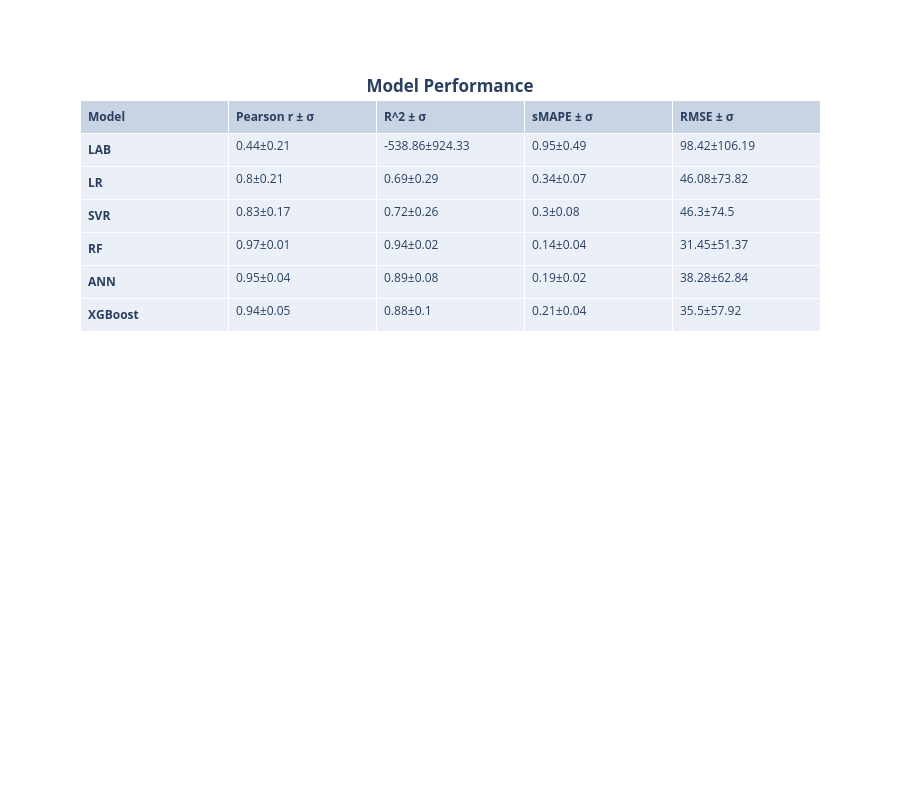

In [743]:
import plotly.graph_objects as go
import pandas as pd
model=['<b>LAB</b>','<b>LR</b>','<b>SVR</b>','<b>RF</b>','<b>ANN</b>','<b>XGBoost</b>']
Pearson=[str(Pearson_lab_mean)+ '±' +str(Pearson_lab_std),str(Pearson_lr_mean)+ '±' +str(Pearson_lr_std),
         str(Pearson_svr_mean)+ '±' +str(Pearson_svr_std),str(Pearson_rf_mean)+ '±' +str(Pearson_rf_std),
         str(Pearson_ann_mean)+ '±' +str(Pearson_ann_std),str(Pearson_xgb_mean)+ '±' +str(Pearson_xgb_std)]


R2=[str(R2_lab_mean)+ '±' +str(R2_lab_std),str(R2_lr_mean)+ '±' +str(R2_lr_std),
    str(R2_svr_mean)+ '±' +str(R2_svr_std),str(R2_rf_mean)+ '±' +str(R2_rf_std),
    str(R2_ann_mean)+ '±' +str(R2_ann_std),str(R2_xgb_mean)+ '±' +str(R2_xgb_std)]



RMSE=[str(RMSE_lab_mean)+ '±' +str(RMSE_lab_std),str(RMSE_lr_mean)+ '±' +str(RMSE_lr_std),
      str(RMSE_svr_mean)+ '±' +str(RMSE_svr_std),str(RMSE_rf_mean)+ '±' +str(RMSE_rf_std),
     str(RMSE_ann_mean)+ '±' +str(RMSE_ann_std),str(RMSE_xgb_mean)+ '±' +str(RMSE_xgb_std)]


sMAPE=[str(sMAPE_lab_mean)+ '±' +str(sMAPE_lab_std),str(sMAPE_lr_mean)+ '±' +str(sMAPE_lr_std),
       str(sMAPE_svr_mean)+ '±' +str(sMAPE_svr_std),str(sMAPE_rf_mean)+ '±' +str(sMAPE_rf_std),
       str(sMAPE_ann_mean)+ '±' +str(sMAPE_ann_std),str(sMAPE_xgb_mean)+ '±' +str(sMAPE_xgb_std)]

fig = go.Figure(data=[go.Table(
    header=dict(values=['<b>Model</b>','<b>Pearson r ± σ</b>','<b>R^2 ± σ</b> ','<b>sMAPE ± σ</b>','<b>RMSE ± σ</b>'],
                #fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[model,Pearson,R2,sMAPE,RMSE ],
               #fill_color='lavender',
               align='left'))
   ])
fig.update_layout(
title={'text': "<b>Model Performance</b>",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
width=900,
height=800,

)
fig.show()
chart_studio.plotly.sign_in('vinylango', 'gybbJVWfRSUoTcRRSa6J')
chart_studio.plotly.image.save_as(fig, filename='models_performance_O3.png')
Image('models_performance_O3.png')

In [744]:
import plotly.graph_objects as go
from functools import reduce
from itertools import product

z=[[Pearson_lab_CO,Pearson_lr_CO , Pearson_svr_CO, Pearson_rf_CO, Pearson_ann_CO,Pearson_xgb_CO], 
   [Pearson_lab_NO2,Pearson_lr_NO2 , Pearson_svr_NO2, Pearson_rf_NO2, Pearson_ann_NO2,Pearson_xgb_NO2], 
   [Pearson_lab_SO2,Pearson_lr_SO2 , Pearson_svr_SO2, Pearson_rf_SO2, Pearson_ann_SO2,Pearson_xgb_SO2],
  [Pearson_lab_O3,Pearson_lr_O3 , Pearson_svr_O3, Pearson_rf_O3, Pearson_ann_O3,Pearson_xgb_O3]]
x=['<b>LAB</b>', '<b>LR</b>', '<b>SVR</b>', '<b>RF</b>', '<b>ANN</b>','<b>XGBoost</b>']
y=['<b>CO</b>', '<b>NO2</b>'.translate(subscript), '<b>SO2</b>'.translate(subscript),'<b>O3</b>'.translate(subscript)]

def get_anno_text(z_value):
    annotations=[]
    a, b = len(z_value), len(z_value[0])
    flat_z = reduce(lambda x,y: x+y, z_value) # z_value.flat if you deal with numpy
    coords = product(range(a), range(b))
    for pos, elem in zip(coords, flat_z):
        annotations.append({'font': {'color': '#FFFFFF'},
                    'showarrow': False,
                    'text': str(elem),
                    'x': pos[1],
                    'y': pos[0]})
    return annotations

fig = go.Figure(data=go.Heatmap(
                   z=z,
                   x=x,
                   y=y,
                   hoverongaps = True, colorscale = "curl"))#matter#

fig.update_layout(title={'text': "<b>Pearson r</b>",
        'y':0.8,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    annotations = get_anno_text(z),
                 width=500,
height=400)
fig.show()

In [745]:
import plotly.graph_objects as go
from functools import reduce
from itertools import product

z=[[round(R2_lab_CO/(-10*R2_lab_CO),2),R2_lr_CO , R2_svr_CO, R2_rf_CO, R2_ann_CO,R2_xgb_CO], 
   [round(R2_lab_NO2/(-10*R2_lab_NO2),2),R2_lr_NO2 , R2_svr_NO2, R2_rf_NO2, R2_ann_NO2,R2_xgb_NO2], 
   [round(R2_lab_SO2/(-10*R2_lab_SO2),2),R2_lr_SO2 , R2_svr_SO2, R2_rf_SO2, R2_ann_SO2,R2_xgb_SO2],
  [round(R2_lab_O3/(-10*R2_lab_O3),2),R2_lr_O3 , R2_svr_O3, R2_rf_O3, R2_ann_O3,R2_xgb_O3]]
x=['<b>LAB(scaled)</b>', '<b>LR</b>', '<b>SVR</b>', '<b>RF</b>', '<b>ANN</b>','<b>XGBoost</b>']
y=['<b>CO</b>', '<b>NO2</b>'.translate(subscript), '<b>SO2</b>'.translate(subscript),'<b>O3</b>'.translate(subscript)]

def get_anno_text(z_value):
    annotations=[]
    a, b = len(z_value), len(z_value[0])
    flat_z = reduce(lambda x,y: x+y, z_value) # z_value.flat if you deal with numpy
    coords = product(range(a), range(b))
    for pos, elem in zip(coords, flat_z):
        annotations.append({'font': {'color': '#FFFFFF'},
                    'showarrow': False,
                    'text': str(elem),
                    'x': pos[1],
                    'y': pos[0]})
    return annotations

fig = go.Figure(data=go.Heatmap(
                   z=z,
                   x=x,
                   y=y,
                   hoverongaps = True, colorscale = "curl"))#matter#

fig.update_layout(title={'text': "<b>R-squared</b>",
        'y':0.8,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    annotations = get_anno_text(z),
                 width=500,
height=400)
fig.show()

In [746]:
import plotly.graph_objects as go
from functools import reduce
from itertools import product

z=[[round(RMSE_lab_CO,2),round(RMSE_lr_CO,2) , round(RMSE_svr_CO,2), round(RMSE_rf_CO,2), 
    round(RMSE_ann_CO,2),round(RMSE_xgb_CO,2)], 
   [round(RMSE_lab_NO2,2),round(RMSE_lr_NO2,2) , round(RMSE_svr_NO2,2), round(RMSE_rf_NO2,2), 
   round( RMSE_ann_NO2,2),round(RMSE_xgb_NO2,2)], 
   [round(RMSE_lab_SO2,2),round(RMSE_lr_SO2,2) , round(RMSE_svr_SO2,2),round(RMSE_rf_SO2,2), 
    round(RMSE_ann_SO2,2),round(RMSE_xgb_SO2,2)],
  [round(RMSE_lab_O3,2),round(RMSE_lr_O3,2) , round(RMSE_svr_O3,2), round(RMSE_rf_O3,2), 
   round(RMSE_ann_O3,2),round(RMSE_xgb_O3,2)]]
x=['<b>LAB</b>', '<b>LR</b>', '<b>SVR</b>', '<b>RF</b>', '<b>ANN</b>','<b>XGBoost</b>']
y=['<b>CO</b>', '<b>NO2</b>'.translate(subscript), '<b>SO2</b>'.translate(subscript),'<b>O3</b>'.translate(subscript)]

def get_anno_text(z_value):
    annotations=[]
    a, b = len(z_value), len(z_value[0])
    flat_z = reduce(lambda x,y: x+y, z_value) # z_value.flat if you deal with numpy
    coords = product(range(a), range(b))
    for pos, elem in zip(coords, flat_z):
        annotations.append({'font': {'color': '#FFFFFF'},
                    'showarrow': False,
                    'text': str(elem),
                    'x': pos[1],
                    'y': pos[0]})
    return annotations

fig = go.Figure(data=go.Heatmap(
                   z=z,
                   x=x,
                   y=y,
                   hoverongaps = True, colorscale = "curl"))#matter#

fig.update_layout(title={'text': "<b>RMSE(normalized)</b>",
        'y':0.8,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    annotations = get_anno_text(z),
                 width=500,
height=400)
fig.show()

import seaborn as sns
#+list(features_NO2)+list(features_SO2)+list(features_O3)
fi=list(features_CO)
fi=list(100*np.array(fi))
#+['NO2'.translate(subscript) for i in range(7)]+
#['SO2'.translate(subscript) for i in range(7)]+['O3'.translate(subscript) for i in range(7)]
pollutants=(['CO' for i in range(7)])
feature=['Net signal', 'Temperature', 'RH','Month','Day','Day of week','Hour' ]
#+feature+feature+feature
features=feature

data=[[fi[i],pollutants[i],features[i]] for i in range(len(fi))]

df=pd.DataFrame(data=data, columns=['fi','pollutant','features'])
fig= plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0)
percentage=fi
ax=sns.barplot(x="pollutant", y="fi", hue="features", data=df,
            palette=['gold','rebeccapurple','salmon','palevioletred','steelblue','darkkhaki','plum'])
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.05
   ax.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')
plt.ylabel( 'Feature importance (%)')
plt.xlabel('')
plt.legend(loc = 2, bbox_to_anchor = (1,1))
#plt.grid(True)
plt.show()

fi=list(features_NO2)
fi=list(100*np.array(fi))
#+['NO2'.translate(subscript) for i in range(7)]+
#['SO2'.translate(subscript) for i in range(7)]+['O3'.translate(subscript) for i in range(7)]
pollutants=(['NO2'.translate(subscript) for i in range(7)])
feature=['Net signal', 'Temperature', 'RH','Month','Day','Day of week','Hour' ]
#+feature+feature+feature
features=feature

data=[[fi[i],pollutants[i],features[i]] for i in range(len(fi))]

df=pd.DataFrame(data=data, columns=['fi','pollutant','features'])
fig= plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0)
percentage=fi
ax=sns.barplot(x="pollutant", y="fi", hue="features", data=df,
            palette=['gold','rebeccapurple','salmon','palevioletred','steelblue','darkkhaki','plum'])
ax.legend_.remove()
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.05
   ax.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')
plt.ylabel( 'Feature importance (%)')
plt.xlabel('')
plt.legend(loc = 2, bbox_to_anchor = (1,1))
#plt.grid(True)
plt.show()

fi=list(features_SO2)
fi=list(100*np.array(fi))
#+['NO2'.translate(subscript) for i in range(7)]+
#['SO2'.translate(subscript) for i in range(7)]+['O3'.translate(subscript) for i in range(7)]
pollutants=(['SO2'.translate(subscript) for i in range(7)])
feature=['Net signal', 'Temperature', 'RH','Month','Day','Day of week','Hour' ]
#+feature+feature+feature
features=feature

data=[[fi[i],pollutants[i],features[i]] for i in range(len(fi))]

df=pd.DataFrame(data=data, columns=['fi','pollutant','features'])
fig= plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0)
percentage=fi
ax=sns.barplot(x="pollutant", y="fi", hue="features", data=df,
            palette=['gold','rebeccapurple','salmon','palevioletred','steelblue','darkkhaki','plum'])
ax.legend_.remove()
patches = ax.patches
for i in range(len(patches)):
   x= patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.05
   ax.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')
plt.ylabel( 'Feature importance (%)')
plt.xlabel('')
plt.legend(loc = 2, bbox_to_anchor = (1,1))
#plt.grid(True)
plt.show()

column=['features','CO','NO2'.translate(subscript),'SO2'.translate(subscript),'O3'.translate(subscript)]
data=[[features[i],100*features_CO[i],100*features_NO2[i],100*features_SO2[i],100*features_O3[i]] for i in range(7)]
df=pd.DataFrame(data=data, columns=['features','CO','NO2','SO2','O3'])
import seaborn as sns
fig= plt.figure(figsize=(15,5))
sns.set()
df.set_index('features').T.plot(kind='bar', stacked=True)
plt.legend(loc = 2, bbox_to_anchor = (1,1))

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]
harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])

fig= plt.figure(figsize=(15,5))
fig, ax = plt.subplots()
im = ax.imshow(harvest)

# We want to show all ticks...
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="green")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

In [747]:
features_SO2

array([0.21693965, 0.24420384, 0.27997526, 0.06922822, 0.07987885,
       0.10977418])

In [748]:
A=[0,0]
B=[0]
C=[0,features_O3[6]]
features_co=np.array(list(features_CO)+A)
features_no2=np.array(list(features_NO2)+B)
features_so2=np.array(list(features_SO2)+A)
features_o3=np.array(list(features_O3[:6])+C)
data=[100*features_co,100*features_no2,100*features_so2,100*features_o3]
df=pd.DataFrame(data=data, columns=['Net signal', 'Temperature', 'RH','Month','Day of week','Hour',
                                    'O3 Concentraion'.translate(subscript),
                                    'NO2 Concentration'.translate(subscript) ] )
pollutants=['CO','NO2'.translate(subscript),'SO2'.translate(subscript),'O3'.translate(subscript)]
df.insert(0, 'pollutants', pollutants)
#df['pollutants']=pollutants
df

pollutants  Net signal  Temperature         RH     Month  Day of week  \
0         CO   72.011451     7.017829   5.195549  4.678263     2.432594   
1        NO₂   32.069347     5.522556   6.956166  7.743446     2.235059   
2        SO₂   21.693965    24.420384  27.997526  6.922822     7.987885   
3         O₃    9.161521    15.443193  20.170717  6.756315     1.190181   

        Hour  O₃ Concentraion  NO₂ Concentration  
0   8.664314         0.000000           0.000000  
1   8.900259        36.573168           0.000000  
2  10.977418         0.000000           0.000000  
3   7.543335         0.000000          39.734737

<Figure size 720x360 with 0 Axes>

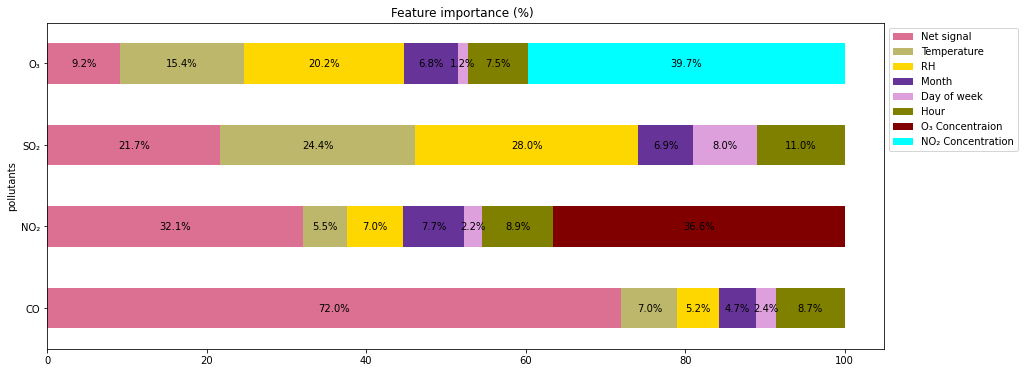

In [749]:
color=['palevioletred','darkkhaki','gold','rebeccapurple','plum','olive','maroon','cyan']
fig= plt.figure(figsize=(10,5)) 
df.plot(
  x = 'pollutants', 
  kind = 'barh', 
  stacked = True,
  color=color,
  title = 'Feature importance (%)  ',#(mean±0.7*std) 
  mark_right = True,
figsize=(15, 6))
  
df_total = (df["Net signal"] + df["Temperature"] + df["RH"]+df["Month"]+df["Day of week"]+df["Hour"]
            +df['O3 Concentraion'.translate(subscript)]+df['NO2 Concentration'.translate(subscript)])
df_rel = df[df.columns[1:]].div(df_total,0)*100
  
for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df.iloc[:, 1:].cumsum(1)[n], 
                                         df[n], df_rel[n])):
        if pc>0:
            plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'center')
plt.legend( loc = 2, bbox_to_anchor = (1,1))

Text(0.5, 1.0, 'CO')

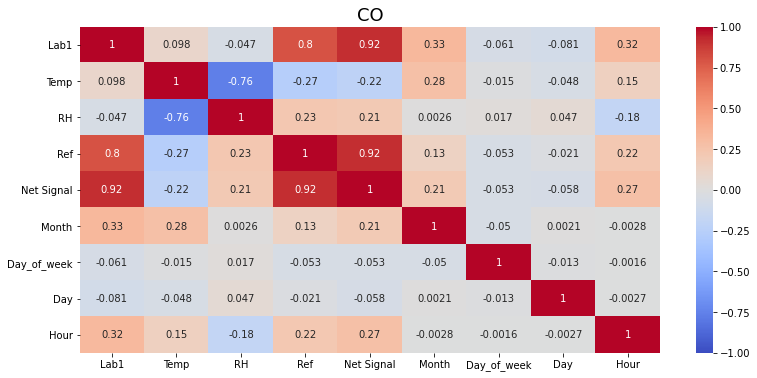

In [750]:
import matplotlib.pyplot as plt
import seaborn as sns
fig= plt.figure(figsize=(13,6))
sns.heatmap(CO_Data.corr(), annot = True, vmin=-1, vmax=1, 
            center= 0, cmap= 'coolwarm')
plt.title('CO',fontsize=18)

Text(0.5, 1.0, 'CO')

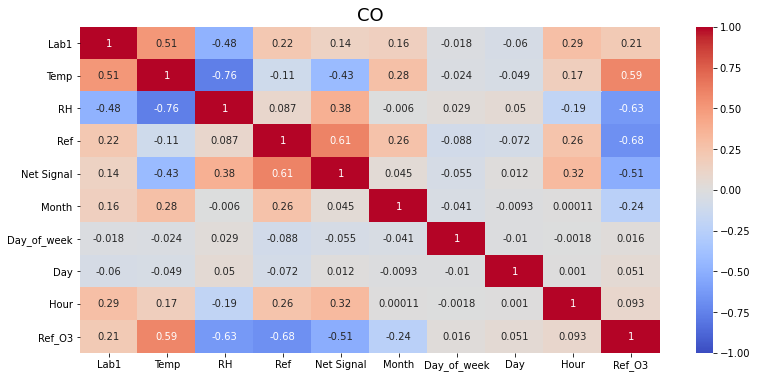

In [751]:
import matplotlib.pyplot as plt
import seaborn as sns
fig= plt.figure(figsize=(13,6))
sns.heatmap(NO2_Data.corr(), annot = True, vmin=-1, vmax=1, 
            center= 0, cmap= 'coolwarm')
plt.title('CO',fontsize=18)

Text(0.5, 1.0, 'CO')

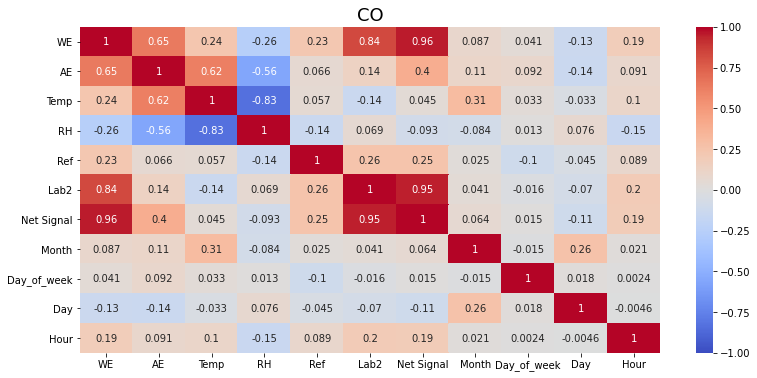

In [752]:
import matplotlib.pyplot as plt
import seaborn as sns
fig= plt.figure(figsize=(13,6))
sns.heatmap(SO2_Data.corr(), annot = True, vmin=-1, vmax=1, 
            center= 0, cmap= 'coolwarm')
plt.title('CO',fontsize=18)

Text(0.5, 1.0, 'CO')

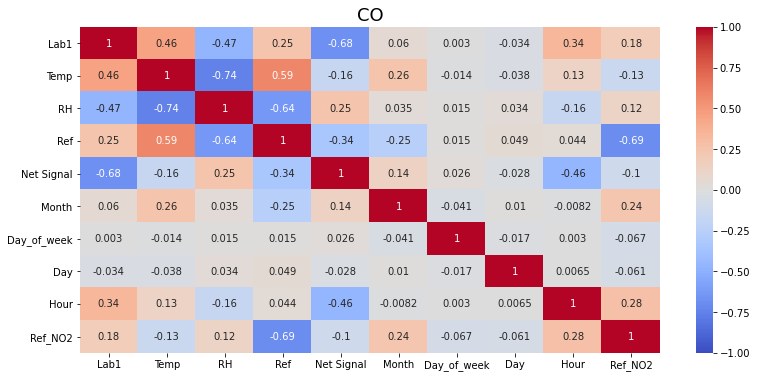

In [753]:
import matplotlib.pyplot as plt
import seaborn as sns
fig= plt.figure(figsize=(13,6))
sns.heatmap(O3_Data.corr(), annot = True, vmin=-1, vmax=1, 
            center= 0, cmap= 'coolwarm')
plt.title('CO',fontsize=18)

# Cross Sensitivities

# NO2

In [754]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
Pearson_NO2_inc=[0.89,0.92,0.97,0.96,0.96]
R2_NO2_inc=[0.79,0.84,0.94,0.92,0.92]
RMSE_NO2_inc=[5.7,5,3,3.5,3.6]

Pearson_NO2_Ninc=[0.67,0.79,0.95,0.93,0.91]
R2_NO2_Ninc=[0.45,0.62,0.9,0.86,0.83]
RMSE_NO2_Ninc=[9.4,7.8,4.1,4.7,5.3]


<function matplotlib.pyplot.legend(*args, **kwargs)>

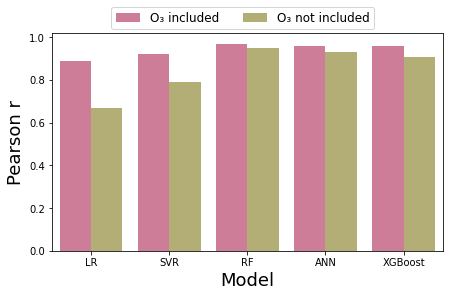

In [755]:
Pearson=Pearson_NO2_inc+Pearson_NO2_Ninc
Model=['LR','SVR','RF','ANN','XGBoost']
Models=Model+Model
Class1=['NO2 included' for i in range(5)]
Class2=['NO2 not included' for i in range(5)]
Classification=Class1+Class2
data=[[Models[i],Pearson[i],Classification[i] ] for i in range(len(Models))]
df=pd.DataFrame(data=data, columns=['Model', 'Pearson r','Classification'])
#df=df.sample(frac=1)
#df.head()

fig= plt.figure(figsize=(7,4))
sns.barplot(x="Model", y="Pearson r", hue="Classification",data=df,palette=['palevioletred','darkkhaki'],
ci=None)
plt.legend(['O3 included'.translate(subscript), 'O3 not included'.translate(subscript)],ncol = 4  , 
           bbox_to_anchor = (0.84,1.15),fontsize=12)
#plt.ylabel( 'Average ' + r'$O_{3}$' + ' Concentration (μg/m³)')
#plt.title('NO2 Calibration'.translate(subscript), fontsize=18)
plt.ylabel('Pearson r',fontsize=18)
plt.xlabel('Model',fontsize=18)
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

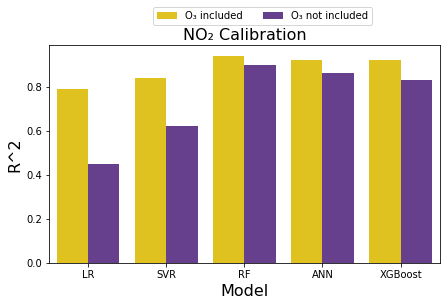

In [756]:
R2=R2_NO2_inc+R2_NO2_Ninc
Model=['LR','SVR','RF','ANN','XGBoost']
Models=Model+Model
Class1=['NO2 included' for i in range(5)]
Class2=['NO2 not included' for i in range(5)]
Classification=Class1+Class2
data=[[Models[i],R2[i],Classification[i] ] for i in range(len(Models))]
df=pd.DataFrame(data=data, columns=['Model', 'R2','Classification'])
#df=df.sample(frac=1)
#df.head()

fig= plt.figure(figsize=(7,4))
sns.barplot(x="Model", y="R2", hue="Classification",data=df,palette=['gold','rebeccapurple'],
ci=None)
plt.legend(['O3 included'.translate(subscript), 'O3 not included'.translate(subscript)],ncol = 4  , 
           bbox_to_anchor = (0.84,1.2),fontsize=10)
#plt.ylabel( 'Average ' + r'$O_{3}$' + ' Concentration (μg/m³)')
#plt.title('NO2 Calibration'.translate(subscript), fontsize=18)
plt.ylabel('R^2',fontsize=16)
plt.xlabel('Model',fontsize=16)
plt.title('NO2 Calibration'.translate(subscript),fontsize=16)
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

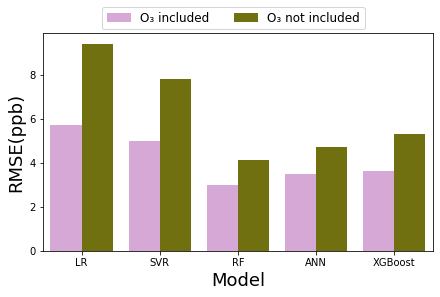

In [757]:
RMSE=RMSE_NO2_inc+RMSE_NO2_Ninc
Model=['LR','SVR','RF','ANN','XGBoost']
Models=Model+Model
Class1=['NO2 included' for i in range(5)]
Class2=['NO2 not included' for i in range(5)]
Classification=Class1+Class2
data=[[Models[i],RMSE[i],Classification[i] ] for i in range(len(Models))]
df=pd.DataFrame(data=data, columns=['Model', 'RMSE','Classification'])
#df=df.sample(frac=1)
#df.head()

fig= plt.figure(figsize=(7,4))
sns.barplot(x="Model", y="RMSE", hue="Classification",data=df,palette=['plum','olive'],
ci=None)
plt.legend(['O3 included'.translate(subscript), 'O3 not included'.translate(subscript)],ncol = 4  , 
           bbox_to_anchor = (0.84,1.15),fontsize=12)
#plt.ylabel( 'Average ' + r'$O_{3}$' + ' Concentration (μg/m³)')
#plt.title('NO2 Calibration'.translate(subscript), fontsize=18)
plt.ylabel('RMSE(ppb)',fontsize=18)
plt.xlabel('Model',fontsize=18)
plt.legend

# O3

In [758]:
Pearson_O3_inc=[0.94,0.94,0.99,0.99,0.98]
R2_O3_inc=[0.89,0.89,0.98,0.97,0.97]
RMSE_O3_inc=[5,5,2.2,2.6,2.8]

Pearson_O3_Ninc=[0.77,0.77,0.98,0.97,0.92]
R2_O3_Ninc=[0.59,0.59,0.95,0.93,0.85]
RMSE_O3_Ninc=[9.6,9.7,3.3,3.9,5.7]

<BarContainer object of 5 artists>

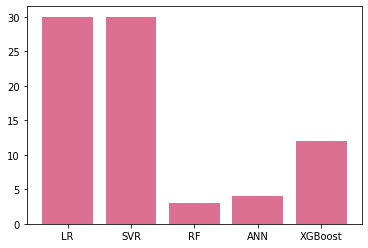

In [759]:
Per=(np.array(R2_O3_inc)-np.array(R2_O3_Ninc))*100
Model=['LR','SVR','RF','ANN','XGBoost']
plt.bar(Model,Per, color='palevioletred')


<function matplotlib.pyplot.legend(*args, **kwargs)>

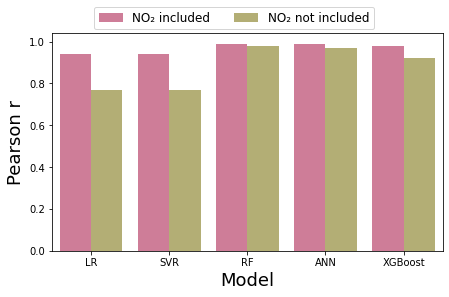

In [760]:
Pearson=Pearson_O3_inc+Pearson_O3_Ninc
Model=['LR','SVR','RF','ANN','XGBoost']
Models=Model+Model
Class1=['NO2 included' for i in range(5)]
Class2=['NO2 not included' for i in range(5)]
Classification=Class1+Class2
data=[[Models[i],Pearson[i],Classification[i] ] for i in range(len(Models))]
df=pd.DataFrame(data=data, columns=['Model', 'Pearson r','Classification'])
#df=df.sample(frac=1)
#df.head()

fig= plt.figure(figsize=(7,4))
sns.barplot(x="Model", y="Pearson r", hue="Classification",data=df,palette=['palevioletred','darkkhaki'],
ci=None)
plt.legend(['NO2 included'.translate(subscript), 'NO2 not included'.translate(subscript)],ncol = 4  , 
           bbox_to_anchor = (0.84,1.15),fontsize=12)
#plt.ylabel( 'Average ' + r'$O_{3}$' + ' Concentration (μg/m³)')
#plt.title('NO2 Calibration'.translate(subscript), fontsize=18)
plt.ylabel('Pearson r',fontsize=18)
plt.xlabel('Model',fontsize=18)
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

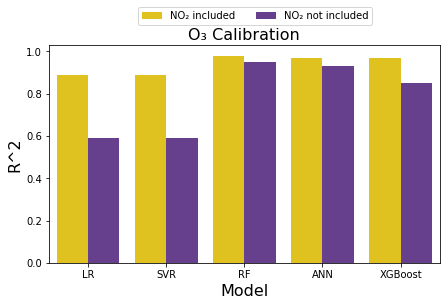

In [761]:
R2=R2_O3_inc+R2_O3_Ninc
Model=['LR','SVR','RF','ANN','XGBoost']
Models=Model+Model
Class1=['NO2 included' for i in range(5)]
Class2=['NO2 not included' for i in range(5)]
Classification=Class1+Class2
data=[[Models[i],R2[i],Classification[i] ] for i in range(len(Models))]
df=pd.DataFrame(data=data, columns=['Model', 'R2','Classification'])
#df=df.sample(frac=1)
#df.head()

fig= plt.figure(figsize=(7,4))
sns.barplot(x="Model", y="R2", hue="Classification",data=df,palette=['gold','rebeccapurple'],
ci=None)
plt.legend(['NO2 included'.translate(subscript), 'NO2 not included'.translate(subscript)],ncol = 4  , 
           bbox_to_anchor = (0.84,1.2),fontsize=10)
#plt.ylabel( 'Average ' + r'$O_{3}$' + ' Concentration (μg/m³)')
#plt.title('NO2 Calibration'.translate(subscript), fontsize=18)
plt.ylabel('R^2',fontsize=16)
plt.xlabel('Model',fontsize=16)
plt.title('O3 Calibration'.translate(subscript),fontsize=16)
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

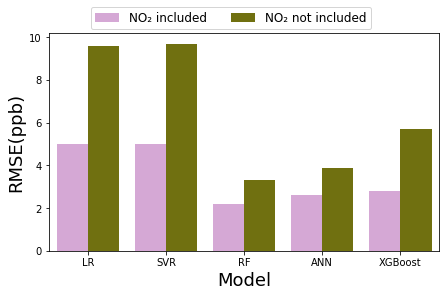

In [762]:
RMSE=RMSE_O3_inc+RMSE_O3_Ninc
Model=['LR','SVR','RF','ANN','XGBoost']
Models=Model+Model
Class1=['NO2 included' for i in range(5)]
Class2=['NO2 not included' for i in range(5)]
Classification=Class1+Class2
data=[[Models[i],RMSE[i],Classification[i] ] for i in range(len(Models))]
df=pd.DataFrame(data=data, columns=['Model', 'RMSE','Classification'])
#df=df.sample(frac=1)
#df.head()

fig= plt.figure(figsize=(7,4))
sns.barplot(x="Model", y="RMSE", hue="Classification",data=df,palette=['plum','olive'],
ci=None)
plt.legend(['NO2 included'.translate(subscript), 'NO2 not included'.translate(subscript)],ncol = 4  , 
           bbox_to_anchor = (0.84,1.15),fontsize=12)
#plt.ylabel( 'Average ' + r'$O_{3}$' + ' Concentration (μg/m³)')
#plt.title('NO2 Calibration'.translate(subscript), fontsize=18)
plt.ylabel('RMSE(ppb)',fontsize=18)
plt.xlabel('Model',fontsize=18)
plt.legend

In [159]:
import pandas as pd
data=pd.read_csv('wb.csv')
data['Date'] = pd.to_datetime(data['Date'])
data=data.set_index('Date')
data.head()

BCff  BCwb  CO (ppb)
Date                            
2018-10-11  1.65  0.21    178.47
2018-10-12  1.92  0.19    179.83
2018-10-13  1.33  0.16    242.58
2018-10-14  0.59  0.08     82.57
2018-10-15  1.07  0.09     96.94

In [160]:
from sktime.performance_metrics.forecasting import sMAPE, smape_loss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
import numpy as np
#'Ref_NO2','Ref_SO2','Ref_O3',
#,'Month','Day_of_week','Day','Hour'
X=data[['BCff','BCwb']]
y=data['CO (ppb)']
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.2,shuffle=True)
#train_test_split(X, y, test_size = 0.2)

In [161]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 1000,min_samples_split= 6,min_samples_leaf= 3,max_features= 'sqrt', 
                                  random_state = 1,max_depth=3,bootstrap=False)
  
  
# fit the regressor with x and y data
regressor=regressor.fit(X_train, y_train) 

# Random Forest

In [162]:
fi1=regressor.feature_importances_
pred = regressor.predict(X_test)
pred_rf_co=pred
for i in range(len(pred)):
    if pred[i]<0:
        pred[i]=np.mean(pred)
Index=[i for i in range(len(y_test))]
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
#Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
#sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
#RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
#Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_rf_CO=sMAPE_lr
RMSE_rf_CO=round(RMSE_lr/np.mean(np.array(y_test)),2)
Pearson_rf_CO=Pearson_lr
R2_rf_CO=round(sm.r2_score(y_test, pred), 2)
RMSE_Rf_CO=RMSE_lr
R2_rf_CO,Pearson_rf_CO

(0.66, 0.82)

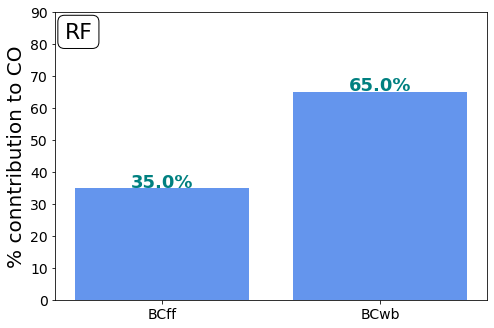

In [163]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['BCff', 'BCwb']
students =np.round(100* np.array(fi1),0)
graph=ax.bar(langs,students, color='#6495ED')
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(students[i])+'%',
             ha='center',
             weight='bold',fontsize=18, color='teal')
    i+=1
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yticks(np.arange(0,100, step=10))
plt.ylabel('% conntribution to CO', fontsize=20)
textstr = ('RF')
props = dict(boxstyle='round', facecolor='white', alpha=1)

# place a text box in upper left in axes coords
ax.text(0.022, 0.965, textstr, transform=ax.transAxes, fontsize=22,
        verticalalignment='top', bbox=props)
#plt.title(r"$O_3$",fontsize=18)
#plt.title(r"$O_3$",fontsize=18)
plt.savefig("FI_RF.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [164]:
fi1

array([0.35449156, 0.64550844])

# XGBoost

In [165]:
from xgboost import  XGBRegressor
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
# create an xgboost regression model
#n_estimators=10000, max_depth=5, eta=0.01, subsample=0.9,colsample_bytree=0.4,alpha=10
model = XGBRegressor(n_estimators=600, max_depth=5, eta=0.02, subsample=0.1, 
                     colsample_bytree=1,alpha=10)

model.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.02, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.0199999996, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=600, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=0.1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [166]:
fi2=model.feature_importances_
pred = model.predict(X_test)
pred_rf_co=pred
for i in range(len(pred)):
    if pred[i]<0:
        pred[i]=np.mean(pred)
Index=[i for i in range(len(y_test))]
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
#Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
#sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
#RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
#Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_rf_CO=sMAPE_lr
RMSE_rf_CO=round(RMSE_lr/np.mean(np.array(y_test)),2)
Pearson_rf_CO=Pearson_lr
R2_rf_CO=round(sm.r2_score(y_test, pred), 2)
RMSE_Rf_CO=RMSE_lr
R2_rf_CO,Pearson_rf_CO

(0.6, 0.79)

In [167]:
fi2

array([0.37132484, 0.6286752 ], dtype=float32)

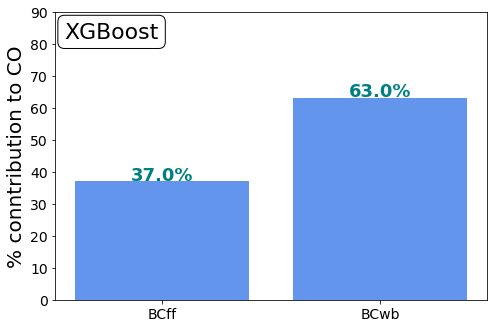

In [168]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['BCff', 'BCwb']
students =np.round(100* np.array(fi2),0)
graph=ax.bar(langs,students, color='#6495ED')
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(students[i])+'%',
             ha='center',
             weight='bold',fontsize=18, color='teal')
    i+=1
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yticks(np.arange(0,100, step=10))
plt.ylabel('% conntribution to CO', fontsize=20)
textstr = ('XGBoost')
props = dict(boxstyle='round', facecolor='white', alpha=1)

# place a text box in upper left in axes coords
ax.text(0.022, 0.965, textstr, transform=ax.transAxes, fontsize=22,
        verticalalignment='top', bbox=props)
#plt.title(r"$O_3$",fontsize=18)
plt.savefig("FI_XGBoost.pdf", format="pdf", bbox_inches="tight")
plt.show()

# CO CALIBRATION

In [1]:
import pandas as pd
Ref=pd.read_csv('Ref.csv')
Ref["CO"] = 1000 * Ref["CO"]
Ref['Date'] = pd.to_datetime(Ref['Date_Time'])
Ref=Ref.set_index('Date')
Ref.drop('Date_Time',axis = 1, inplace = True)
Ref=Ref.resample('5min').mean()
Ref=Ref[76463:137376]
Ref_CO=Ref['CO'].to_list()
Ref_NO2=Ref['NO2'].to_list()
Ref_SO2=Ref['SO2'].to_list()
Ref_O3=Ref['O3'].to_list()

In [2]:
import random
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('CO.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
Data_CO['Ref']=Ref_CO
WE=Data_CO['WE'].to_list()
AE=Data_CO['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
data = pd.read_csv('Conc_CO.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
CO_Data=CO_Data.sample(frac=1)
CO_Data.head()

Lab1       Temp         RH         Ref  Net Signal  \
Date                                                                            
2020-02-20 12:30:00  289.489783  23.235200  44.818400  227.613300   39.379970   
2019-10-08 14:50:00  445.698442  33.190306  39.836934  168.914733   71.870980   
2019-12-11 18:30:00  365.326667  13.763211  86.115114  433.870600  149.612458   
2019-11-17 23:50:00  518.862613  13.020375  73.397818  516.687850  231.209648   
2020-04-12 00:35:00  156.545405  12.258070  87.024422  201.750000   63.661323   

                     Month  Day_of_week  Day  Hour  
Date                                                
2020-02-20 12:30:00      2            3   20    12  
2019-10-08 14:50:00     10            1    8    14  
2019-12-11 18:30:00     12            2   11    18  
2019-11-17 23:50:00     11            6   17    23  
2020-04-12 00:35:00      4            6   12     0

In [3]:
Data_5=CO_Data
Data_10=CO_Data.resample('10min').mean()
Data_10=Data_10.dropna()
Data_15=CO_Data.resample('15min').mean()
Data_15=Data_15.dropna()
Data_20=CO_Data.resample('20min').mean()
Data_20=Data_20.dropna()
Data_25=CO_Data.resample('25min').mean()
Data_25=Data_25.dropna()
Data_30=CO_Data.resample('30min').mean()
Data_30=Data_30.dropna()
Data_35=CO_Data.resample('35min').mean()
Data_35=Data_35.dropna()
Data_40=CO_Data.resample('40min').mean()
Data_40=Data_40.dropna()
Data_45=CO_Data.resample('45min').mean()
Data_45=Data_45.dropna()
Data_50=CO_Data.resample('50min').mean()
Data_50=Data_50.dropna()
Data_55=CO_Data.resample('55min').mean()
Data_55=Data_55.dropna()
Data_60=CO_Data.resample('h').mean()
Data_60=Data_60.dropna()
Data_60.shape
Data=[Data_5,Data_10,Data_15,Data_20,Data_25,Data_30,Data_35,Data_40,Data_45,Data_50,Data_55,Data_60]
len(Data)

12

In [4]:
from sktime.performance_metrics.forecasting import sMAPE, smape_loss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
Data_2h=CO_Data.resample('2h').mean()
Data_2h=Data_2h.dropna()

X=Data_2h[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour']]
y=Data_2h['Ref']
X_Train, X_Test, y_Train, y_Test =train_test_split(X, y, test_size = 0.5)
len( X_Test)

991

# RF

In [5]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor objectf
regressor = RandomForestRegressor(n_estimators = 500,min_samples_split= 2,min_samples_leaf= 1,max_features= 'sqrt', 
                                  random_state = 0,max_depth=None,bootstrap=False)
  
  

In [6]:
Resolution=[5*i for i in range(1,13)]
Pearson=[]
RMSE=[]
R2=[]

for i in range(len(Data)):
    X=Data[i][['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour']]
    y=Data[i]['Ref']
    X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.2)
    regressor=regressor.fit(X_train.drop(['Lab1'], axis=1), y_train)
    pred = regressor.predict(X_Test.drop(['Lab1'], axis=1))
    r=round(np.corrcoef(y_Test, pred)[0, 1],2)
    rmse=round(np.sqrt(sm.mean_squared_error(y_Test, pred))/np.mean(y_Test),1)
    r2=round(sm.r2_score(y_Test, pred), 2)
    Pearson.append(r)
    RMSE.append(rmse)
    R2.append(r2)
    

KeyboardInterrupt: 

In [ ]:
Pearson

In [ ]:
RMSE

In [ ]:
R2

In [ ]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(8,5))
plt.plot(Resolution,Pearson, color='teal')
plt.plot(Resolution,RMSE, color='darkkhaki')
plt.plot(Resolution,R2, color='maroon')
plt.scatter(Resolution,Pearson, color='teal')
plt.scatter(Resolution,RMSE, color='darkkhaki')
plt.scatter(Resolution,R2, color='maroon')

In [1]:
!pip install sympy
from sympy import*



[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: pip install --upgrade pip


In [2]:
x=Symbol('x')
ex=sin(x)+x**2+3*x
diff(ex)

2*x + cos(x) + 3

In [3]:
integrate(ex)

x**3/3 + 3*x**2/2 - cos(x)

In [4]:
diff(ln(x))

1/x

In [5]:
integrate(log(x))

x*log(x) - x

In [2]:
import numpy as np

A=[]
for x in range(1,20):
    if np.log(x)==1:
        print(x)
        

In [7]:
A=np.arange(3,4,0.00000001)

In [8]:
B=[]
for x in A:
    if abs(np.sin(0.5*(x))-1)<0.00000000000001:
        B.append(np.round(x,4))
        

In [6]:
max(B)

3.1416

In [2]:
import pandas as pd
from pandas import MultiIndex, Int16Dtype
Ref=pd.read_csv('Ref.csv')
Ref["CO"] = 1000 * Ref["CO"]
Ref['Date'] = pd.to_datetime(Ref['Date_Time'])
Ref=Ref.set_index('Date')
Ref.drop('Date_Time',axis = 1, inplace = True)
Ref=Ref.resample('5min').mean()
Ref=Ref[76463:137376]
Ref_CO=Ref['CO'].to_list()
Ref_NO2=Ref['NO2'].to_list()
Ref_SO2=Ref['SO2'].to_list()
Ref_O3=Ref['O3'].to_list()

In [3]:
import random
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('CO.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
Data_CO['Ref']=Ref_CO
index_names = Data_CO[ (Data_CO['WE'] >1000)].index
Data_CO.drop(index_names, inplace = True)
WE=Data_CO['WE'].to_list()
AE=Data_CO['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
data = pd.read_csv('Conc_CO.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
Data_CO.drop(index_names, inplace = True)
signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
CO_Data=CO_Data.resample('h').mean()
CO_Data=CO_Data.dropna()
CO_Data.tail()

Lab1       Temp         RH         Ref  Net Signal  \
Date                                                                            
2020-04-30 19:00:00  242.060716  18.870796  71.072939  188.915151   91.471325   
2020-04-30 20:00:00  218.655079  18.056864  75.132153  178.704750   84.176485   
2020-04-30 21:00:00  194.147868  17.090891  81.315038  161.421792   73.858294   
2020-04-30 22:00:00  206.432889  16.714085  82.568155  197.744043   83.279611   
2020-04-30 23:00:00  173.577429  16.365121  83.662401  162.157636   68.669099   

                     Month  Day_of_week   Day  Hour  
Date                                                 
2020-04-30 19:00:00    4.0          3.0  30.0  19.0  
2020-04-30 20:00:00    4.0          3.0  30.0  20.0  
2020-04-30 21:00:00    4.0          3.0  30.0  21.0  
2020-04-30 22:00:00    4.0          3.0  30.0  22.0  
2020-04-30 23:00:00    4.0          3.0  30.0  23.0

In [4]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('O3.txt', header = None,low_memory=False)
data.columns=['AE','WE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref']=Ref_O3
WE=Data_O3['WE'].to_list()
AE=Data_O3['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
data = pd.read_csv('Conc_O3.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna() 
O3_Data=O3_Data.resample('h').mean()
O3_Data=O3_Data.dropna()
O3_Data.head()

ref_O3=Data_O3['Ref'].to_list()
len(ref_O3)

60913

In [5]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('NO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_NO2=data
Data_NO2['Ref']=Ref_NO2
WE=Data_NO2['WE'].to_list()
AE=Data_NO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_NO2['Net Signal']=signal
Data_NO2['Month']=Data_NO2.index.month
Data_NO2['Day_of_week']=Data_NO2.index.dayofweek
Data_NO2['Day']=Data_NO2.index.day
Data_NO2['Hour']=Data_NO2.index.hour
NO2_Data=Data_NO2
NO2_Data=NO2_Data[(NO2_Data[NO2_Data.columns] >= 0).all(axis=1)]
NO2_Data=NO2_Data.dropna()
data = pd.read_csv('Conc_NO2.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉") 
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_NO2=data
signal=np.array(WE)-np.array(AE)
Data_NO2['Net Signal']=signal
Data_NO2['Month']=Data_NO2.index.month
Data_NO2['Day_of_week']=Data_NO2.index.dayofweek
Data_NO2['Day']=Data_NO2.index.day
Data_NO2['Hour']=Data_NO2.index.hour
Data_NO2['Ref_O3']=ref_O3
NO2_Data=Data_NO2
NO2_Data=NO2_Data[(NO2_Data[NO2_Data.columns] >= 0).all(axis=1)]
NO2_Data=NO2_Data.dropna()
NO2_Data=NO2_Data.resample('h').mean()
NO2_Data=NO2_Data.dropna()

In [6]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('O3.txt', header = None,low_memory=False)
data.columns=['AE','WE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref']=Ref_O3
WE=Data_O3['WE'].to_list()
AE=Data_O3['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
data = pd.read_csv('Conc_O3.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
ref_NO2=Data_NO2['Ref'].to_list()
Data_O3['Ref_NO2']=ref_NO2
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
O3_Data=O3_Data.resample('h').mean()
O3_Data=O3_Data.dropna()
O3_Data.head()

Lab1       Temp         RH        Ref  Net Signal  \
Date                                                                           
2019-10-02 11:00:00  621.625704  26.378438  58.063437  46.094860    3.605625   
2019-10-02 12:00:00  725.154408  25.795055  48.256857  57.532808   13.865109   
2019-10-07 10:00:00  108.196313  32.344264  37.260757  47.259008   11.447809   
2019-10-07 11:00:00  135.822676  34.926112  35.013036  42.114260   10.075221   
2019-10-07 12:00:00  203.757758  36.201221  31.829282  45.701366    7.624153   

                     Month  Day_of_week  Day  Hour    Ref_NO2  
Date                                                           
2019-10-02 11:00:00   10.0          2.0  2.0  11.0  15.230400  
2019-10-02 12:00:00   10.0          2.0  2.0  12.0   5.384051  
2019-10-07 10:00:00   10.0          0.0  7.0  10.0   4.255772  
2019-10-07 11:00:00   10.0          0.0  7.0  11.0  16.268034  
2019-10-07 12:00:00   10.0          0.0  7.0  12.0  12.770444

In [22]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('Conc_SO2.txt', header = None,low_memory=False)
data.columns=['Lab2','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_so2=data
#signal=np.array(WE)-np.array(AE)
#Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data=SO2_Data.resample('5min').mean()
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna() 
data = pd.read_csv('SO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_SO2['Ref']=Ref_SO2
WE=Data_SO2['WE'].to_list()
AE=Data_SO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_SO2['Lab2']=Data_so2['Lab2'].to_list()
Data_SO2['WE']=WE
Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data.shape
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna()
SO2_Data=SO2_Data.resample('h').mean()
SO2_Data=SO2_Data.dropna()
SO2_Data_Scaled= (SO2_Data-SO2_Data.min())/(SO2_Data.max()-SO2_Data.min())
SO2_Data.head()

WE          AE       Temp         RH       Ref  \
Date                                                                          
2019-10-10 04:00:00  344.013811  342.484305  18.332589  82.373211  1.190555   
2019-10-10 05:00:00  347.947204  342.688948  18.160512  83.041499  1.517400   
2019-10-10 06:00:00  349.586425  342.643169  18.294731  80.755815  1.596648   
2019-10-10 07:00:00  348.280332  342.545156  21.874264  74.161148  1.518688   
2019-10-10 08:00:00  352.303813  345.041354  29.141688  59.611152  1.379748   

                          Lab2  Net Signal  Month  Day_of_week   Day  Hour  
Date                                                                        
2019-10-10 04:00:00   9.990807    1.529506   10.0          3.0  10.0   4.0  
2019-10-10 05:00:00  21.173371    5.258256   10.0          3.0  10.0   5.0  
2019-10-10 06:00:00  26.255508    6.943256   10.0          3.0  10.0   6.0  
2019-10-10 07:00:00  22.449829    5.735176   10.0          3.0  10.0   7.0  
2019-10-10 08:00:00  23.209242    7.262459   10.0          3.0  10.0   8.0

# CO DATA

In [23]:
df1=[x for _, x in SO2_Data.groupby('Month')]
data_oct=df1[4]
#data_oct=data_oct.sample(frac=1)
data_nov=df1[5]
#data_nov=data_nov.sample(frac=1)
data_dec=df1[6]
#data_dec=data_dec.sample(frac=1)
data_jan=df1[0]
#data_jan=data_jan.sample(frac=1)
data_feb=df1[1]
#data_feb=data_feb.sample(frac=1)
data_mar=df1[2]

data_Oct=data_oct.resample('60min').mean()
data_Oct=data_Oct.dropna()
data_Oct1=data_Oct[:int(0.8*data_Oct.shape[0])]
data_Oct2=data_Oct[int(0.8*data_Oct.shape[0]):]
data_Nov=data_nov.resample('60min').mean()
data_Nov=data_Nov.dropna()
data_Nov1=data_Nov[:int(0.8*data_Nov.shape[0])]
data_Nov2=data_Nov[int(0.8*data_Nov.shape[0]):]
data_Dec=data_dec.resample('60min').mean()
data_Dec=data_Dec.dropna()
data_Dec1=data_Dec[:int(0.8*data_Dec.shape[0])]
data_Dec2=data_Dec[int(0.8*data_Dec.shape[0]):]
data_Jan=data_jan.resample('60min').mean()
data_Jan=data_Jan.dropna()
data_Jan1=data_Jan[:int(0.8*data_Jan.shape[0])]
data_Jan2=data_Jan[int(0.8*data_Jan.shape[0]):]
data_Feb=data_feb.resample('60min').mean()
data_Feb=data_Feb.dropna()
data_Feb1=data_Feb[:int(0.8*data_Feb.shape[0])]
data_Feb2=data_Feb[int(0.8*data_Feb.shape[0]):]
data_Mar=data_mar.resample('60min').mean()
data_Mar=data_Mar.dropna()
data_Mar1=data_Mar[:int(0.8*data_Mar.shape[0])]
data_Mar2=data_Mar[int(0.8*data_Mar.shape[0]):]
frame1=[data_Oct1,data_Nov1,data_Dec1,data_Jan1,data_Feb1,data_Mar1]
frame2=[data_Oct2,data_Nov2,data_Dec2,data_Jan2,data_Feb2,data_Mar2]
CO_data1=pd.concat(frame1)
CO_data2=pd.concat(frame2)
CO_data=pd.concat([CO_data1,CO_data2])

In [26]:
from sktime.performance_metrics.forecasting import sMAPE, smape_loss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#'Ref_NO2','Ref_SO2','Ref_O3',
#,'Month','Day_of_week','Day','Hour'
X=CO_data[['Net Signal','Lab2','Temp','RH','Month','Day_of_week','Hour']]
y=CO_data['Ref']
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size = 0.2,shuffle=False)
#train_test_split(X, y, test_size = 0.2)

In [27]:
from flaml.model import SKLearnEstimator
# SKLearnEstimator is derived from BaseEstimator

In [30]:
from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 500,  # in seconds
    "metric": 'mae',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings,estimator_list=["xgboost"])#,estimator_list=["xgboost"]
pred=automl.predict(X_test)
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

[flaml.automl: 02-16 11:00:25] {2599} INFO - task = regression
[flaml.automl: 02-16 11:00:25] {2601} INFO - Data split method: uniform
[flaml.automl: 02-16 11:00:25] {2604} INFO - Evaluation method: cv
[flaml.automl: 02-16 11:00:25] {2726} INFO - Minimizing error metric: mae
[flaml.automl: 02-16 11:00:25] {2870} INFO - List of ML learners in AutoML Run: ['xgboost']
[flaml.automl: 02-16 11:00:25] {3166} INFO - iteration 0, current learner xgboost
[flaml.automl: 02-16 11:00:26] {3296} INFO - Estimated sufficient time budget=799s. Estimated necessary time budget=1s.
[flaml.automl: 02-16 11:00:26] {3343} INFO -  at 0.1s,	estimator xgboost's best error=0.7784,	best estimator xgboost's best error=0.7784
[flaml.automl: 02-16 11:00:26] {3166} INFO - iteration 1, current learner xgboost
[flaml.automl: 02-16 11:00:26] {3343} INFO -  at 0.2s,	estimator xgboost's best error=0.7784,	best estimator xgboost's best error=0.7784
[flaml.automl: 02-16 11:00:26] {3166} INFO - iteration 2, current learner 

[flaml.automl: 02-16 11:00:32] {3343} INFO -  at 6.2s,	estimator xgboost's best error=0.3697,	best estimator xgboost's best error=0.3697
[flaml.automl: 02-16 11:00:32] {3166} INFO - iteration 36, current learner xgboost
[flaml.automl: 02-16 11:00:32] {3343} INFO -  at 6.4s,	estimator xgboost's best error=0.3697,	best estimator xgboost's best error=0.3697
[flaml.automl: 02-16 11:00:32] {3166} INFO - iteration 37, current learner xgboost
[flaml.automl: 02-16 11:00:32] {3343} INFO -  at 6.8s,	estimator xgboost's best error=0.3597,	best estimator xgboost's best error=0.3597
[flaml.automl: 02-16 11:00:32] {3166} INFO - iteration 38, current learner xgboost
[flaml.automl: 02-16 11:00:33] {3343} INFO -  at 7.2s,	estimator xgboost's best error=0.3597,	best estimator xgboost's best error=0.3597
[flaml.automl: 02-16 11:00:33] {3166} INFO - iteration 39, current learner xgboost
[flaml.automl: 02-16 11:00:33] {3343} INFO -  at 7.7s,	estimator xgboost's best error=0.3597,	best estimator xgboost's b

[flaml.automl: 02-16 11:01:19] {3166} INFO - iteration 73, current learner xgboost
[flaml.automl: 02-16 11:01:21] {3343} INFO -  at 55.6s,	estimator xgboost's best error=0.3448,	best estimator xgboost's best error=0.3448
[flaml.automl: 02-16 11:01:21] {3166} INFO - iteration 74, current learner xgboost
[flaml.automl: 02-16 11:01:24] {3343} INFO -  at 58.4s,	estimator xgboost's best error=0.3448,	best estimator xgboost's best error=0.3448
[flaml.automl: 02-16 11:01:24] {3166} INFO - iteration 75, current learner xgboost
[flaml.automl: 02-16 11:01:27] {3343} INFO -  at 61.7s,	estimator xgboost's best error=0.3448,	best estimator xgboost's best error=0.3448
[flaml.automl: 02-16 11:01:27] {3166} INFO - iteration 76, current learner xgboost
[flaml.automl: 02-16 11:01:32] {3343} INFO -  at 66.8s,	estimator xgboost's best error=0.3448,	best estimator xgboost's best error=0.3448
[flaml.automl: 02-16 11:01:32] {3166} INFO - iteration 77, current learner xgboost
[flaml.automl: 02-16 11:01:34] {3

[flaml.automl: 02-16 11:03:51] {3166} INFO - iteration 110, current learner xgboost
[flaml.automl: 02-16 11:03:55] {3343} INFO -  at 209.5s,	estimator xgboost's best error=0.3415,	best estimator xgboost's best error=0.3415
[flaml.automl: 02-16 11:03:55] {3166} INFO - iteration 111, current learner xgboost
[flaml.automl: 02-16 11:03:57] {3343} INFO -  at 211.7s,	estimator xgboost's best error=0.3415,	best estimator xgboost's best error=0.3415
[flaml.automl: 02-16 11:03:57] {3166} INFO - iteration 112, current learner xgboost
[flaml.automl: 02-16 11:04:05] {3343} INFO -  at 219.4s,	estimator xgboost's best error=0.3415,	best estimator xgboost's best error=0.3415
[flaml.automl: 02-16 11:04:05] {3166} INFO - iteration 113, current learner xgboost
[flaml.automl: 02-16 11:04:08] {3343} INFO -  at 222.2s,	estimator xgboost's best error=0.3415,	best estimator xgboost's best error=0.3415
[flaml.automl: 02-16 11:04:08] {3166} INFO - iteration 114, current learner xgboost
[flaml.automl: 02-16 11:

[flaml.automl: 02-16 11:06:40] {3166} INFO - iteration 147, current learner xgboost
[flaml.automl: 02-16 11:06:43] {3343} INFO -  at 377.4s,	estimator xgboost's best error=0.3391,	best estimator xgboost's best error=0.3391
[flaml.automl: 02-16 11:06:43] {3166} INFO - iteration 148, current learner xgboost
[flaml.automl: 02-16 11:06:45] {3343} INFO -  at 379.4s,	estimator xgboost's best error=0.3391,	best estimator xgboost's best error=0.3391
[flaml.automl: 02-16 11:06:45] {3166} INFO - iteration 149, current learner xgboost
[flaml.automl: 02-16 11:06:47] {3343} INFO -  at 381.8s,	estimator xgboost's best error=0.3391,	best estimator xgboost's best error=0.3391
[flaml.automl: 02-16 11:06:47] {3166} INFO - iteration 150, current learner xgboost
[flaml.automl: 02-16 11:06:50] {3343} INFO -  at 384.5s,	estimator xgboost's best error=0.3391,	best estimator xgboost's best error=0.3391
[flaml.automl: 02-16 11:06:50] {3166} INFO - iteration 151, current learner xgboost
[flaml.automl: 02-16 11:

[flaml.automl: 02-16 11:08:45] {2901} INFO - fit succeeded
[flaml.automl: 02-16 11:08:45] {2902} INFO - Time taken to find the best model: 428.80761981010437
[flaml.automl: 02-16 11:08:45] {2913} WARNING - Time taken to find the best model is 86% of the provided time budget and not all estimators' hyperparameter search converged. Consider increasing the time budget.


0.38 -0.0 0.4
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1.0,
             colsample_bynode=1, colsample_bytree=1.0, gamma=0, gpu_id=-1,
             grow_policy='lossguide', importance_type='gain',
             interaction_constraints='', learning_rate=0.06390708031382199,
             max_delta_step=0, max_depth=0, max_leaves=51,
             min_child_weight=0.10848415458921998, missing=nan,
             monotone_constraints='()', n_estimators=1464, n_jobs=-1,
             num_parallel_tree=1, random_state=0,
             reg_alpha=0.004028264655233534, reg_lambda=0.072086129428632,
             scale_pos_weight=1, subsample=0.9444531464743854,
             tree_method='hist', use_label_encoder=False, validate_parameters=1,
             verbosity=0)


from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab1'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

from flaml.model import SKLearnEstimator

from flaml.model import SKLearnEstimator
# SKLearnEstimator is derived from BaseEstimator
import numpy as np

class RandomForestRegressor(SKLearnEstimator):
    def __init__(self, task="binary", **config):
        super().__init__(task, **config)

        if task in CLASSIFICATION:
            from sklearn.ensemble import RandomForestClassifier

            self.estimator_class =RandomForestClassifier 
        else:
            from sklearn.ensemble import RandomForestRegressor

            self.estimator_class =RandomForestRegressor

    @classmethod
    def search_space(cls, data_size, task):
        space = {
            "n_estimators": {
                "domain": {"domain": tune.loguniform(lower=100, upper=20000)},
                "low_cost_init_value": 100,
            },
            "max_features": {
                "domain": tune.loguniform(lower=0.1, upper=1),
                "low_cost_init_value": 0.1,
            },
            "max_leaf_nodes": {
                "domain": tune.lograndint(lower=100, upper=2500),
                "low_cost_init_value": 100,},
            "min_samples_split": {"domain": tune.lograndint(lower=1, upper=20),
            "init_value": 20,},
            
            "min_samples_leaf": {
                "domain": tune.lograndint(lower=1, upper=20),
                "init_value": 20,
            },
        }
        return space

from flaml import AutoML
from flaml import tune
automl = AutoML()
automl.add_learner("rfr",RandomForestRegressor )

automl_settings = {
    "time_budget": 1000,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["rfr"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)

#  NO2 DATA

In [ ]:
X=NO2_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour','Ref_O3']]#'Ref_O3'
y=NO2_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#len(X_test)
X.shape

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab1'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

# O3 DATA

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#,'Ref_CO','Ref_NO2','Ref_SO2'
X=O3_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour','Ref_NO2']]#,'Ref_NO2'
y=O3_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
len(X)

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab1'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

# SO2 DATA

In [ ]:
import pandas as pd
Ref=pd.read_csv('Ref.csv')
Ref["CO"] = 1000 * Ref["CO"]
Ref['Date'] = pd.to_datetime(Ref['Date_Time'])
Ref=Ref.set_index('Date')
Ref.drop('Date_Time',axis = 1, inplace = True)
Ref=Ref.resample('5min').mean()
Ref=Ref[76463:137376]
Ref_CO=Ref['CO'].to_list()
Ref_NO2=Ref['NO2'].to_list()
Ref_SO2=Ref['SO2'].to_list()
Ref_O3=Ref['O3'].to_list()

In [ ]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('Conc_SO2.txt', header = None,low_memory=False)
data.columns=['Lab2','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_so2=data
#signal=np.array(WE)-np.array(AE)
#Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data=SO2_Data.resample('5min').mean()
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna() 
data = pd.read_csv('SO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_SO2['Ref']=Ref_SO2
WE=Data_SO2['WE'].to_list()
AE=Data_SO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_SO2['Lab2']=Data_so2['Lab2'].to_list()
Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data.shape

In [ ]:
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna()
SO2_Data=SO2_Data.resample('h').mean()
SO2_Data=SO2_Data.dropna()
SO2_Data.head()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#'Ref_CO','Ref_NO2','Ref_O3',
X=SO2_Data[['Net Signal','Lab2','Temp','RH','Month','Day_of_week','Hour']]
y=SO2_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
len(X)

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab2'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab2'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab2'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

In [1]:
import pandas as pd
from pandas import MultiIndex, Int16Dtype
Ref=pd.read_csv('Ref.csv')
Ref["CO"] = 1000 * Ref["CO"]
Ref['Date'] = pd.to_datetime(Ref['Date_Time'])
Ref=Ref.set_index('Date')
Ref.drop('Date_Time',axis = 1, inplace = True)
Ref=Ref.resample('5min').mean()
Ref=Ref[76463:137376]
Ref_CO=Ref['CO'].to_list()
Ref_NO2=Ref['NO2'].to_list()
Ref_SO2=Ref['SO2'].to_list()
Ref_O3=Ref['O3'].to_list()

In [2]:
import random
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('CO.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
Data_CO['Ref']=Ref_CO
index_names = Data_CO[ (Data_CO['WE'] >1000)].index
Data_CO.drop(index_names, inplace = True)
WE=Data_CO['WE'].to_list()
AE=Data_CO['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
data = pd.read_csv('Conc_CO.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
Data_CO.drop(index_names, inplace = True)
signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
CO_Data=CO_Data.resample('h').mean()
CO_Data=CO_Data.dropna()
CO_Data.tail()

Lab1       Temp         RH         Ref  Net Signal  \
Date                                                                            
2020-04-30 19:00:00  242.060716  18.870796  71.072939  188.915151   91.471325   
2020-04-30 20:00:00  218.655079  18.056864  75.132153  178.704750   84.176485   
2020-04-30 21:00:00  194.147868  17.090891  81.315038  161.421792   73.858294   
2020-04-30 22:00:00  206.432889  16.714085  82.568155  197.744043   83.279611   
2020-04-30 23:00:00  173.577429  16.365121  83.662401  162.157636   68.669099   

                     Month  Day_of_week   Day  Hour  
Date                                                 
2020-04-30 19:00:00    4.0          3.0  30.0  19.0  
2020-04-30 20:00:00    4.0          3.0  30.0  20.0  
2020-04-30 21:00:00    4.0          3.0  30.0  21.0  
2020-04-30 22:00:00    4.0          3.0  30.0  22.0  
2020-04-30 23:00:00    4.0          3.0  30.0  23.0

In [3]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('O3.txt', header = None,low_memory=False)
data.columns=['AE','WE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref']=Ref_O3
WE=Data_O3['WE'].to_list()
AE=Data_O3['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
data = pd.read_csv('Conc_O3.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna() 
O3_Data=O3_Data.resample('h').mean()
O3_Data=O3_Data.dropna()
O3_Data.head()

ref_O3=Data_O3['Ref'].to_list()
len(ref_O3)

60913

In [4]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('NO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_NO2=data
Data_NO2['Ref']=Ref_NO2
WE=Data_NO2['WE'].to_list()
AE=Data_NO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_NO2['Net Signal']=signal
Data_NO2['Month']=Data_NO2.index.month
Data_NO2['Day_of_week']=Data_NO2.index.dayofweek
Data_NO2['Day']=Data_NO2.index.day
Data_NO2['Hour']=Data_NO2.index.hour
NO2_Data=Data_NO2
NO2_Data=NO2_Data[(NO2_Data[NO2_Data.columns] >= 0).all(axis=1)]
NO2_Data=NO2_Data.dropna()
data = pd.read_csv('Conc_NO2.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉") 
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_NO2=data
signal=np.array(WE)-np.array(AE)
Data_NO2['Net Signal']=signal
Data_NO2['Month']=Data_NO2.index.month
Data_NO2['Day_of_week']=Data_NO2.index.dayofweek
Data_NO2['Day']=Data_NO2.index.day
Data_NO2['Hour']=Data_NO2.index.hour
Data_NO2['Ref_O3']=ref_O3
NO2_Data=Data_NO2
NO2_Data=NO2_Data[(NO2_Data[NO2_Data.columns] >= 0).all(axis=1)]
NO2_Data=NO2_Data.dropna()
NO2_Data=NO2_Data.resample('h').mean()
NO2_Data=NO2_Data.dropna()

In [5]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('O3.txt', header = None,low_memory=False)
data.columns=['AE','WE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref']=Ref_O3
WE=Data_O3['WE'].to_list()
AE=Data_O3['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
data = pd.read_csv('Conc_O3.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
ref_NO2=Data_NO2['Ref'].to_list()
Data_O3['Ref_NO2']=ref_NO2
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
O3_Data=O3_Data.resample('h').mean()
O3_Data=O3_Data.dropna()
O3_Data.head()

Lab1       Temp         RH        Ref  Net Signal  \
Date                                                                           
2019-10-02 11:00:00  621.625704  26.378438  58.063437  46.094860    3.605625   
2019-10-02 12:00:00  725.154408  25.795055  48.256857  57.532808   13.865109   
2019-10-07 10:00:00  108.196313  32.344264  37.260757  47.259008   11.447809   
2019-10-07 11:00:00  135.822676  34.926112  35.013036  42.114260   10.075221   
2019-10-07 12:00:00  203.757758  36.201221  31.829282  45.701366    7.624153   

                     Month  Day_of_week  Day  Hour    Ref_NO2  
Date                                                           
2019-10-02 11:00:00   10.0          2.0  2.0  11.0  15.230400  
2019-10-02 12:00:00   10.0          2.0  2.0  12.0   5.384051  
2019-10-07 10:00:00   10.0          0.0  7.0  10.0   4.255772  
2019-10-07 11:00:00   10.0          0.0  7.0  11.0  16.268034  
2019-10-07 12:00:00   10.0          0.0  7.0  12.0  12.770444

# CO DATA

In [6]:
from sktime.performance_metrics.forecasting import sMAPE, smape_loss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#'Ref_NO2','Ref_SO2','Ref_O3',
#,'Month','Day_of_week','Day','Hour'
X=CO_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour']]
y=CO_Data['Ref']
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size = 0.2,shuffle=True)
#train_test_split(X, y, test_size = 0.2)

In [7]:
from flaml.model import SKLearnEstimator
# SKLearnEstimator is derived from BaseEstimator

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab1'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

from flaml.model import SKLearnEstimator

from flaml.model import SKLearnEstimator
# SKLearnEstimator is derived from BaseEstimator
import numpy as np

class RandomForestRegressor(SKLearnEstimator):
    def __init__(self, task="binary", **config):
        super().__init__(task, **config)

        if task in CLASSIFICATION:
            from sklearn.ensemble import RandomForestClassifier

            self.estimator_class =RandomForestClassifier 
        else:
            from sklearn.ensemble import RandomForestRegressor

            self.estimator_class =RandomForestRegressor

    @classmethod
    def search_space(cls, data_size, task):
        space = {
            "n_estimators": {
                "domain": {"domain": tune.loguniform(lower=100, upper=20000)},
                "low_cost_init_value": 100,
            },
            "max_features": {
                "domain": tune.loguniform(lower=0.1, upper=1),
                "low_cost_init_value": 0.1,
            },
            "max_leaf_nodes": {
                "domain": tune.lograndint(lower=100, upper=2500),
                "low_cost_init_value": 100,},
            "min_samples_split": {"domain": tune.lograndint(lower=1, upper=20),
            "init_value": 20,},
            
            "min_samples_leaf": {
                "domain": tune.lograndint(lower=1, upper=20),
                "init_value": 20,
            },
        }
        return space

from flaml import AutoML
from flaml import tune
automl = AutoML()
automl.add_learner("rfr",RandomForestRegressor )

automl_settings = {
    "time_budget": 1000,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["rfr"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)

#  NO2 DATA

In [8]:
X=NO2_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour','Ref_O3']]#'Ref_O3'
y=NO2_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#len(X_test)
X.shape

(3778, 8)

In [9]:
from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'mae',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings)
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

[flaml.automl: 12-06 08:54:41] {2599} INFO - task = regression
[flaml.automl: 12-06 08:54:41] {2601} INFO - Data split method: uniform
[flaml.automl: 12-06 08:54:41] {2604} INFO - Evaluation method: cv
[flaml.automl: 12-06 08:54:41] {2726} INFO - Minimizing error metric: rmse
[flaml.automl: 12-06 08:54:41] {2870} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl: 12-06 08:54:41] {3166} INFO - iteration 0, current learner lgbm
[flaml.automl: 12-06 08:54:41] {3296} INFO - Estimated sufficient time budget=5651s. Estimated necessary time budget=40s.
[flaml.automl: 12-06 08:54:41] {3343} INFO -  at 0.7s,	estimator lgbm's best error=9.3646,	best estimator lgbm's best error=9.3646
[flaml.automl: 12-06 08:54:41] {3166} INFO - iteration 1, current learner lgbm
[flaml.automl: 12-06 08:54:42] {3343} INFO -  at 1.4s,	estimator lgbm's best error=9.3646,	best estimator lgbm's best error=9.3646
[flaml.automl: 12-06 08:54:42] {3166} INFO 

[flaml.automl: 12-06 08:55:18] {3166} INFO - iteration 36, current learner extra_tree
[flaml.automl: 12-06 08:55:19] {3343} INFO -  at 38.2s,	estimator extra_tree's best error=3.8641,	best estimator lgbm's best error=3.3562
[flaml.automl: 12-06 08:55:19] {3166} INFO - iteration 37, current learner xgboost
[flaml.automl: 12-06 08:55:19] {3343} INFO -  at 38.7s,	estimator xgboost's best error=3.8229,	best estimator lgbm's best error=3.3562
[flaml.automl: 12-06 08:55:19] {3166} INFO - iteration 38, current learner xgboost
[flaml.automl: 12-06 08:55:20] {3343} INFO -  at 39.0s,	estimator xgboost's best error=3.8229,	best estimator lgbm's best error=3.3562
[flaml.automl: 12-06 08:55:20] {3166} INFO - iteration 39, current learner xgboost
[flaml.automl: 12-06 08:55:20] {3343} INFO -  at 39.4s,	estimator xgboost's best error=3.8229,	best estimator lgbm's best error=3.3562
[flaml.automl: 12-06 08:55:20] {3166} INFO - iteration 40, current learner xgboost
[flaml.automl: 12-06 08:55:20] {3343} I

[flaml.automl: 12-06 08:56:44] {3343} INFO -  at 123.1s,	estimator xgboost's best error=3.2199,	best estimator extra_tree's best error=3.1549
[flaml.automl: 12-06 08:56:44] {3166} INFO - iteration 74, current learner extra_tree
[flaml.automl: 12-06 08:56:45] {3343} INFO -  at 124.7s,	estimator extra_tree's best error=3.1549,	best estimator extra_tree's best error=3.1549
[flaml.automl: 12-06 08:56:45] {3166} INFO - iteration 75, current learner rf
[flaml.automl: 12-06 08:56:47] {3343} INFO -  at 126.1s,	estimator rf's best error=3.5911,	best estimator extra_tree's best error=3.1549
[flaml.automl: 12-06 08:56:47] {3166} INFO - iteration 76, current learner rf
[flaml.automl: 12-06 08:56:52] {3343} INFO -  at 131.0s,	estimator rf's best error=3.4127,	best estimator extra_tree's best error=3.1549
[flaml.automl: 12-06 08:56:52] {3166} INFO - iteration 77, current learner extra_tree
[flaml.automl: 12-06 08:56:57] {3343} INFO -  at 136.5s,	estimator extra_tree's best error=3.1549,	best estimat

[flaml.automl: 12-06 08:59:55] {3343} INFO -  at 314.1s,	estimator xgb_limitdepth's best error=3.6244,	best estimator extra_tree's best error=3.1116
[flaml.automl: 12-06 08:59:55] {3166} INFO - iteration 110, current learner xgb_limitdepth
[flaml.automl: 12-06 08:59:58] {3343} INFO -  at 317.0s,	estimator xgb_limitdepth's best error=3.6244,	best estimator extra_tree's best error=3.1116
[flaml.automl: 12-06 08:59:58] {3166} INFO - iteration 111, current learner rf
[flaml.automl: 12-06 09:00:01] {3343} INFO -  at 320.2s,	estimator rf's best error=3.3433,	best estimator extra_tree's best error=3.1116
[flaml.automl: 12-06 09:00:01] {3166} INFO - iteration 112, current learner xgb_limitdepth
[flaml.automl: 12-06 09:00:02] {3343} INFO -  at 321.6s,	estimator xgb_limitdepth's best error=3.6244,	best estimator extra_tree's best error=3.1116
[flaml.automl: 12-06 09:00:02] {3166} INFO - iteration 113, current learner xgb_limitdepth
[flaml.automl: 12-06 09:00:03] {3343} INFO -  at 322.8s,	estimat

[flaml.automl: 12-06 09:04:58] {3166} INFO - iteration 145, current learner xgb_limitdepth
[flaml.automl: 12-06 09:05:02] {3343} INFO -  at 621.7s,	estimator xgb_limitdepth's best error=3.3379,	best estimator extra_tree's best error=3.1116
[flaml.automl: 12-06 09:05:02] {3166} INFO - iteration 146, current learner extra_tree
[flaml.automl: 12-06 09:05:29] {3343} INFO -  at 648.5s,	estimator extra_tree's best error=3.1098,	best estimator extra_tree's best error=3.1098
[flaml.automl: 12-06 09:05:29] {3166} INFO - iteration 147, current learner extra_tree
[flaml.automl: 12-06 09:05:40] {3343} INFO -  at 659.9s,	estimator extra_tree's best error=3.1098,	best estimator extra_tree's best error=3.1098
[flaml.automl: 12-06 09:05:40] {3166} INFO - iteration 148, current learner extra_tree
[flaml.automl: 12-06 09:06:08] {3343} INFO -  at 686.9s,	estimator extra_tree's best error=3.1098,	best estimator extra_tree's best error=3.1098
[flaml.automl: 12-06 09:06:08] {3166} INFO - iteration 149, curr

[flaml.automl: 12-06 10:06:06] {3343} INFO -  at 4285.5s,	estimator extra_tree's best error=3.1098,	best estimator extra_tree's best error=3.1098
[flaml.automl: 12-06 10:06:06] {3166} INFO - iteration 181, current learner extra_tree
[flaml.automl: 12-06 10:06:48] {3343} INFO -  at 4327.7s,	estimator extra_tree's best error=3.1098,	best estimator extra_tree's best error=3.1098
[flaml.automl: 12-06 10:06:48] {3166} INFO - iteration 182, current learner xgboost
[flaml.automl: 12-06 10:06:54] {3343} INFO -  at 4333.2s,	estimator xgboost's best error=3.1139,	best estimator extra_tree's best error=3.1098
[flaml.automl: 12-06 10:06:54] {3166} INFO - iteration 183, current learner xgboost
[flaml.automl: 12-06 10:06:59] {3343} INFO -  at 4338.1s,	estimator xgboost's best error=3.1139,	best estimator extra_tree's best error=3.1098
[flaml.automl: 12-06 10:06:59] {3166} INFO - iteration 184, current learner xgboost
[flaml.automl: 12-06 10:07:02] {3343} INFO -  at 4341.6s,	estimator xgboost's best 

[flaml.automl: 12-06 10:19:19] {3166} INFO - iteration 217, current learner rf
[flaml.automl: 12-06 10:19:54] {3343} INFO -  at 5113.6s,	estimator rf's best error=3.3326,	best estimator xgboost's best error=3.0274
[flaml.automl: 12-06 10:19:54] {3166} INFO - iteration 218, current learner rf
[flaml.automl: 12-06 11:20:07] {3343} INFO -  at 8726.0s,	estimator rf's best error=3.3292,	best estimator xgboost's best error=3.0274
[flaml.automl: 12-06 11:20:07] {3166} INFO - iteration 219, current learner xgboost
[flaml.automl: 12-06 11:24:33] {3343} INFO -  at 8992.0s,	estimator xgboost's best error=3.0274,	best estimator xgboost's best error=3.0274
[flaml.automl: 12-06 11:24:33] {3166} INFO - iteration 220, current learner xgboost
[flaml.automl: 12-06 11:24:50] {3343} INFO -  at 9009.6s,	estimator xgboost's best error=3.0274,	best estimator xgboost's best error=3.0274
[flaml.automl: 12-06 11:24:50] {3166} INFO - iteration 221, current learner lgbm
[flaml.automl: 12-06 11:26:11] {3343} INFO 

[flaml.automl: 12-06 11:45:34] {3166} INFO - iteration 254, current learner xgboost
[flaml.automl: 12-06 11:46:28] {3343} INFO -  at 10306.9s,	estimator xgboost's best error=3.0260,	best estimator xgboost's best error=3.0260
[flaml.automl: 12-06 11:46:28] {3166} INFO - iteration 255, current learner lgbm
[flaml.automl: 12-06 11:46:33] {3343} INFO -  at 10312.4s,	estimator lgbm's best error=3.3185,	best estimator xgboost's best error=3.0260
[flaml.automl: 12-06 11:46:33] {3166} INFO - iteration 256, current learner extra_tree
[flaml.automl: 12-06 11:46:47] {3343} INFO -  at 10326.5s,	estimator extra_tree's best error=3.1098,	best estimator xgboost's best error=3.0260
[flaml.automl: 12-06 11:46:47] {3166} INFO - iteration 257, current learner xgboost
[flaml.automl: 12-06 11:47:03] {3343} INFO -  at 10342.2s,	estimator xgboost's best error=3.0260,	best estimator xgboost's best error=3.0260
[flaml.automl: 12-06 11:47:03] {3166} INFO - iteration 258, current learner extra_tree
[flaml.automl

[flaml.automl: 12-06 12:22:57] {3166} INFO - iteration 291, current learner xgboost
[flaml.automl: 12-06 12:25:25] {3343} INFO -  at 12644.1s,	estimator xgboost's best error=2.9955,	best estimator xgboost's best error=2.9955
[flaml.automl: 12-06 12:25:25] {3166} INFO - iteration 292, current learner xgboost
[flaml.automl: 12-06 12:26:22] {3343} INFO -  at 12701.2s,	estimator xgboost's best error=2.9955,	best estimator xgboost's best error=2.9955
[flaml.automl: 12-06 12:26:22] {3166} INFO - iteration 293, current learner xgboost
[flaml.automl: 12-06 12:26:35] {3343} INFO -  at 12713.9s,	estimator xgboost's best error=2.9955,	best estimator xgboost's best error=2.9955
[flaml.automl: 12-06 12:26:35] {3166} INFO - iteration 294, current learner xgboost
[flaml.automl: 12-06 12:26:48] {3343} INFO -  at 12727.3s,	estimator xgboost's best error=2.9955,	best estimator xgboost's best error=2.9955
[flaml.automl: 12-06 12:26:48] {3166} INFO - iteration 295, current learner xgboost
[flaml.automl: 1

[flaml.automl: 12-06 12:38:24] {3166} INFO - iteration 328, current learner xgboost
[flaml.automl: 12-06 12:39:33] {3343} INFO -  at 13492.7s,	estimator xgboost's best error=2.9955,	best estimator xgboost's best error=2.9955
[flaml.automl: 12-06 12:39:33] {3166} INFO - iteration 329, current learner xgboost
[flaml.automl: 12-06 12:40:29] {3343} INFO -  at 13548.5s,	estimator xgboost's best error=2.9955,	best estimator xgboost's best error=2.9955
[flaml.automl: 12-06 12:40:29] {3166} INFO - iteration 330, current learner xgboost
[flaml.automl: 12-06 12:40:42] {3343} INFO -  at 13561.3s,	estimator xgboost's best error=2.9955,	best estimator xgboost's best error=2.9955
[flaml.automl: 12-06 12:40:42] {3166} INFO - iteration 331, current learner xgboost
[flaml.automl: 12-06 12:41:37] {3343} INFO -  at 13616.5s,	estimator xgboost's best error=2.9955,	best estimator xgboost's best error=2.9955
[flaml.automl: 12-06 12:41:37] {3166} INFO - iteration 332, current learner xgboost
[flaml.automl: 1

[flaml.automl: 12-06 13:28:03] {3166} INFO - iteration 365, current learner xgb_limitdepth
[flaml.automl: 12-06 13:28:19] {3343} INFO -  at 16418.7s,	estimator xgb_limitdepth's best error=3.1974,	best estimator xgboost's best error=2.9785
[flaml.automl: 12-06 13:28:19] {3166} INFO - iteration 366, current learner xgboost
[flaml.automl: 12-06 13:32:15] {3343} INFO -  at 16654.7s,	estimator xgboost's best error=2.9785,	best estimator xgboost's best error=2.9785
[flaml.automl: 12-06 13:32:15] {3166} INFO - iteration 367, current learner xgb_limitdepth
[flaml.automl: 12-06 13:32:52] {3343} INFO -  at 16691.0s,	estimator xgb_limitdepth's best error=3.1444,	best estimator xgboost's best error=2.9785
[flaml.automl: 12-06 13:32:52] {3166} INFO - iteration 368, current learner xgb_limitdepth
[flaml.automl: 12-06 13:33:13] {3343} INFO -  at 16711.9s,	estimator xgb_limitdepth's best error=3.1444,	best estimator xgboost's best error=2.9785
[flaml.automl: 12-06 13:33:13] {3166} INFO - iteration 369

[flaml.automl: 12-06 14:36:58] {3166} INFO - iteration 401, current learner xgboost
[flaml.automl: 12-06 14:39:42] {3343} INFO -  at 20701.8s,	estimator xgboost's best error=2.9785,	best estimator xgboost's best error=2.9785
[flaml.automl: 12-06 14:39:42] {3166} INFO - iteration 402, current learner extra_tree
[flaml.automl: 12-06 14:39:59] {3343} INFO -  at 20718.7s,	estimator extra_tree's best error=3.1098,	best estimator xgboost's best error=2.9785
[flaml.automl: 12-06 14:39:59] {3166} INFO - iteration 403, current learner xgboost
[flaml.automl: 12-06 14:41:47] {3343} INFO -  at 20826.4s,	estimator xgboost's best error=2.9785,	best estimator xgboost's best error=2.9785
[flaml.automl: 12-06 14:41:47] {3166} INFO - iteration 404, current learner xgboost
[flaml.automl: 12-06 14:44:01] {3343} INFO -  at 20959.9s,	estimator xgboost's best error=2.9785,	best estimator xgboost's best error=2.9785
[flaml.automl: 12-06 14:44:01] {3166} INFO - iteration 405, current learner xgb_limitdepth
[fl

0.96 0.8 0.29
XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.6232756141778749, colsample_bynode=1,
             colsample_bytree=0.8927954782301247, gamma=0, gpu_id=-1,
             grow_policy='lossguide', importance_type='gain',
             interaction_constraints='', learning_rate=0.010589437077728296,
             max_delta_step=0, max_depth=0, max_leaves=181,
             min_child_weight=2.879913543825662, missing=nan,
             monotone_constraints='()', n_estimators=160, n_jobs=-1,
             num_parallel_tree=1, random_state=0, reg_alpha=11.754449125830133,
             reg_lambda=0.0034561656266561495, scale_pos_weight=1,
             subsample=0.6657442649927047, tree_method='hist',
             use_label_encoder=False, validate_parameters=1, verbosity=0)


from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab1'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

# O3 DATA

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#,'Ref_CO','Ref_NO2','Ref_SO2'
X=O3_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour','Ref_NO2']]#,'Ref_NO2'
y=O3_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
len(X)

3534

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab1'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.017 total time=   5.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.007 total time=   5.7s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.004 total time=   5.2s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.006 total time=   4.4s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.008 total time=   4.0s


# SO2 DATA

In [ ]:
import pandas as pd
Ref=pd.read_csv('Ref.csv')
Ref["CO"] = 1000 * Ref["CO"]
Ref['Date'] = pd.to_datetime(Ref['Date_Time'])
Ref=Ref.set_index('Date')
Ref.drop('Date_Time',axis = 1, inplace = True)
Ref=Ref.resample('5min').mean()
Ref=Ref[76463:137376]
Ref_CO=Ref['CO'].to_list()
Ref_NO2=Ref['NO2'].to_list()
Ref_SO2=Ref['SO2'].to_list()
Ref_O3=Ref['O3'].to_list()

In [ ]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('Conc_SO2.txt', header = None,low_memory=False)
data.columns=['Lab2','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_so2=data
#signal=np.array(WE)-np.array(AE)
#Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data=SO2_Data.resample('5min').mean()
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna() 
data = pd.read_csv('SO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_SO2['Ref']=Ref_SO2
WE=Data_SO2['WE'].to_list()
AE=Data_SO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_SO2['Lab2']=Data_so2['Lab2'].to_list()
Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data.shape

In [ ]:
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna()
SO2_Data=SO2_Data.resample('h').mean()
SO2_Data=SO2_Data.dropna()
SO2_Data.head()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#'Ref_CO','Ref_NO2','Ref_O3',
X=SO2_Data[['Net Signal','Lab2','Temp','RH','Month','Day_of_week','Hour']]
y=SO2_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
len(X)

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab2'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab2'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab2'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

In [1]:
import pandas as pd
from pandas import MultiIndex, Int16Dtype
Ref=pd.read_csv('Ref.csv')
Ref["CO"] = 1000 * Ref["CO"]
Ref['Date'] = pd.to_datetime(Ref['Date_Time'])
Ref=Ref.set_index('Date')
Ref.drop('Date_Time',axis = 1, inplace = True)
Ref=Ref.resample('5min').mean()
Ref=Ref[76463:137376]
Ref_CO=Ref['CO'].to_list()
Ref_NO2=Ref['NO2'].to_list()
Ref_SO2=Ref['SO2'].to_list()
Ref_O3=Ref['O3'].to_list()

In [2]:
import random
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('CO.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
Data_CO['Ref']=Ref_CO
index_names = Data_CO[ (Data_CO['WE'] >1000)].index
Data_CO.drop(index_names, inplace = True)
WE=Data_CO['WE'].to_list()
AE=Data_CO['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
data = pd.read_csv('Conc_CO.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
Data_CO.drop(index_names, inplace = True)
signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
CO_Data=CO_Data.resample('h').mean()
CO_Data=CO_Data.dropna()
CO_Data.tail()

Lab1       Temp         RH         Ref  Net Signal  \
Date                                                                            
2020-04-30 19:00:00  242.060716  18.870796  71.072939  188.915151   91.471325   
2020-04-30 20:00:00  218.655079  18.056864  75.132153  178.704750   84.176485   
2020-04-30 21:00:00  194.147868  17.090891  81.315038  161.421792   73.858294   
2020-04-30 22:00:00  206.432889  16.714085  82.568155  197.744043   83.279611   
2020-04-30 23:00:00  173.577429  16.365121  83.662401  162.157636   68.669099   

                     Month  Day_of_week   Day  Hour  
Date                                                 
2020-04-30 19:00:00    4.0          3.0  30.0  19.0  
2020-04-30 20:00:00    4.0          3.0  30.0  20.0  
2020-04-30 21:00:00    4.0          3.0  30.0  21.0  
2020-04-30 22:00:00    4.0          3.0  30.0  22.0  
2020-04-30 23:00:00    4.0          3.0  30.0  23.0

In [3]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('O3.txt', header = None,low_memory=False)
data.columns=['AE','WE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref']=Ref_O3
WE=Data_O3['WE'].to_list()
AE=Data_O3['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
data = pd.read_csv('Conc_O3.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna() 
O3_Data=O3_Data.resample('h').mean()
O3_Data=O3_Data.dropna()
O3_Data.head()

ref_O3=Data_O3['Ref'].to_list()
len(ref_O3)

60913

In [4]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('NO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_NO2=data
Data_NO2['Ref']=Ref_NO2
WE=Data_NO2['WE'].to_list()
AE=Data_NO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_NO2['Net Signal']=signal
Data_NO2['Month']=Data_NO2.index.month
Data_NO2['Day_of_week']=Data_NO2.index.dayofweek
Data_NO2['Day']=Data_NO2.index.day
Data_NO2['Hour']=Data_NO2.index.hour
NO2_Data=Data_NO2
NO2_Data=NO2_Data[(NO2_Data[NO2_Data.columns] >= 0).all(axis=1)]
NO2_Data=NO2_Data.dropna()
data = pd.read_csv('Conc_NO2.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉") 
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_NO2=data
signal=np.array(WE)-np.array(AE)
Data_NO2['Net Signal']=signal
Data_NO2['Month']=Data_NO2.index.month
Data_NO2['Day_of_week']=Data_NO2.index.dayofweek
Data_NO2['Day']=Data_NO2.index.day
Data_NO2['Hour']=Data_NO2.index.hour
Data_NO2['Ref_O3']=ref_O3
NO2_Data=Data_NO2
NO2_Data=NO2_Data[(NO2_Data[NO2_Data.columns] >= 0).all(axis=1)]
NO2_Data=NO2_Data.dropna()
NO2_Data=NO2_Data.resample('h').mean()
NO2_Data=NO2_Data.dropna()

In [5]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('O3.txt', header = None,low_memory=False)
data.columns=['AE','WE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref']=Ref_O3
WE=Data_O3['WE'].to_list()
AE=Data_O3['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
data = pd.read_csv('Conc_O3.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
ref_NO2=Data_NO2['Ref'].to_list()
Data_O3['Ref_NO2']=ref_NO2
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
O3_Data=O3_Data.resample('h').mean()
O3_Data=O3_Data.dropna()
O3_Data.head()

Lab1       Temp         RH        Ref  Net Signal  \
Date                                                                           
2019-10-02 11:00:00  621.625704  26.378438  58.063437  46.094860    3.605625   
2019-10-02 12:00:00  725.154408  25.795055  48.256857  57.532808   13.865109   
2019-10-07 10:00:00  108.196313  32.344264  37.260757  47.259008   11.447809   
2019-10-07 11:00:00  135.822676  34.926112  35.013036  42.114260   10.075221   
2019-10-07 12:00:00  203.757758  36.201221  31.829282  45.701366    7.624153   

                     Month  Day_of_week  Day  Hour    Ref_NO2  
Date                                                           
2019-10-02 11:00:00   10.0          2.0  2.0  11.0  15.230400  
2019-10-02 12:00:00   10.0          2.0  2.0  12.0   5.384051  
2019-10-07 10:00:00   10.0          0.0  7.0  10.0   4.255772  
2019-10-07 11:00:00   10.0          0.0  7.0  11.0  16.268034  
2019-10-07 12:00:00   10.0          0.0  7.0  12.0  12.770444

# CO DATA

In [6]:
from sktime.performance_metrics.forecasting import sMAPE, smape_loss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#'Ref_NO2','Ref_SO2','Ref_O3',
#,'Month','Day_of_week','Day','Hour'
X=CO_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour']]
y=CO_Data['Ref']
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size = 0.2,shuffle=True)
#train_test_split(X, y, test_size = 0.2)

In [7]:
from flaml.model import SKLearnEstimator
# SKLearnEstimator is derived from BaseEstimator

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab1'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

from flaml.model import SKLearnEstimator

from flaml.model import SKLearnEstimator
# SKLearnEstimator is derived from BaseEstimator
import numpy as np

class RandomForestRegressor(SKLearnEstimator):
    def __init__(self, task="binary", **config):
        super().__init__(task, **config)

        if task in CLASSIFICATION:
            from sklearn.ensemble import RandomForestClassifier

            self.estimator_class =RandomForestClassifier 
        else:
            from sklearn.ensemble import RandomForestRegressor

            self.estimator_class =RandomForestRegressor

    @classmethod
    def search_space(cls, data_size, task):
        space = {
            "n_estimators": {
                "domain": {"domain": tune.loguniform(lower=100, upper=20000)},
                "low_cost_init_value": 100,
            },
            "max_features": {
                "domain": tune.loguniform(lower=0.1, upper=1),
                "low_cost_init_value": 0.1,
            },
            "max_leaf_nodes": {
                "domain": tune.lograndint(lower=100, upper=2500),
                "low_cost_init_value": 100,},
            "min_samples_split": {"domain": tune.lograndint(lower=1, upper=20),
            "init_value": 20,},
            
            "min_samples_leaf": {
                "domain": tune.lograndint(lower=1, upper=20),
                "init_value": 20,
            },
        }
        return space

from flaml import AutoML
from flaml import tune
automl = AutoML()
automl.add_learner("rfr",RandomForestRegressor )

automl_settings = {
    "time_budget": 1000,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["rfr"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)

#  NO2 DATA

In [8]:
X=NO2_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour','Ref_O3']]#'Ref_O3'
y=NO2_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#len(X_test)
X.shape

(3778, 8)

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab1'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

# O3 DATA

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#,'Ref_CO','Ref_NO2','Ref_SO2'
X=O3_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour','Ref_NO2']]#,'Ref_NO2'
y=O3_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
len(X)

3534

In [10]:
from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 21600,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings)
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

[flaml.automl: 12-06 08:54:46] {2599} INFO - task = regression
[flaml.automl: 12-06 08:54:46] {2601} INFO - Data split method: uniform
[flaml.automl: 12-06 08:54:46] {2604} INFO - Evaluation method: cv
[flaml.automl: 12-06 08:54:46] {2726} INFO - Minimizing error metric: rmse
[flaml.automl: 12-06 08:54:46] {2870} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl: 12-06 08:54:46] {3166} INFO - iteration 0, current learner lgbm
[flaml.automl: 12-06 08:54:47] {3296} INFO - Estimated sufficient time budget=3930s. Estimated necessary time budget=28s.
[flaml.automl: 12-06 08:54:47] {3343} INFO -  at 0.5s,	estimator lgbm's best error=11.6980,	best estimator lgbm's best error=11.6980
[flaml.automl: 12-06 08:54:47] {3166} INFO - iteration 1, current learner lgbm
[flaml.automl: 12-06 08:54:47] {3343} INFO -  at 0.9s,	estimator lgbm's best error=11.6980,	best estimator lgbm's best error=11.6980
[flaml.automl: 12-06 08:54:47] {3166} I

[flaml.automl: 12-06 08:55:18] {3166} INFO - iteration 36, current learner extra_tree
[flaml.automl: 12-06 08:55:19] {3343} INFO -  at 32.8s,	estimator extra_tree's best error=3.3693,	best estimator lgbm's best error=3.0395
[flaml.automl: 12-06 08:55:19] {3166} INFO - iteration 37, current learner xgboost
[flaml.automl: 12-06 08:55:19] {3343} INFO -  at 33.1s,	estimator xgboost's best error=4.5246,	best estimator lgbm's best error=3.0395
[flaml.automl: 12-06 08:55:19] {3166} INFO - iteration 38, current learner xgboost
[flaml.automl: 12-06 08:55:19] {3343} INFO -  at 33.5s,	estimator xgboost's best error=3.8300,	best estimator lgbm's best error=3.0395
[flaml.automl: 12-06 08:55:19] {3166} INFO - iteration 39, current learner xgboost
[flaml.automl: 12-06 08:55:20] {3343} INFO -  at 33.8s,	estimator xgboost's best error=3.8300,	best estimator lgbm's best error=3.0395
[flaml.automl: 12-06 08:55:20] {3166} INFO - iteration 40, current learner xgboost
[flaml.automl: 12-06 08:55:20] {3343} I

[flaml.automl: 12-06 08:56:50] {3166} INFO - iteration 74, current learner extra_tree
[flaml.automl: 12-06 08:56:52] {3343} INFO -  at 125.7s,	estimator extra_tree's best error=3.0332,	best estimator xgboost's best error=2.9170
[flaml.automl: 12-06 08:56:52] {3166} INFO - iteration 75, current learner xgboost
[flaml.automl: 12-06 08:56:56] {3343} INFO -  at 130.2s,	estimator xgboost's best error=2.9170,	best estimator xgboost's best error=2.9170
[flaml.automl: 12-06 08:56:56] {3166} INFO - iteration 76, current learner xgboost
[flaml.automl: 12-06 08:56:59] {3343} INFO -  at 133.2s,	estimator xgboost's best error=2.9170,	best estimator xgboost's best error=2.9170
[flaml.automl: 12-06 08:56:59] {3166} INFO - iteration 77, current learner extra_tree
[flaml.automl: 12-06 08:57:01] {3343} INFO -  at 134.9s,	estimator extra_tree's best error=3.0332,	best estimator xgboost's best error=2.9170
[flaml.automl: 12-06 08:57:01] {3166} INFO - iteration 78, current learner extra_tree
[flaml.automl:

[flaml.automl: 12-06 08:59:07] {3166} INFO - iteration 110, current learner extra_tree
[flaml.automl: 12-06 08:59:21] {3343} INFO -  at 274.5s,	estimator extra_tree's best error=2.7401,	best estimator extra_tree's best error=2.7401
[flaml.automl: 12-06 08:59:21] {3166} INFO - iteration 111, current learner lgbm
[flaml.automl: 12-06 09:00:18] {3343} INFO -  at 331.6s,	estimator lgbm's best error=3.0395,	best estimator extra_tree's best error=2.7401
[flaml.automl: 12-06 09:00:18] {3166} INFO - iteration 112, current learner extra_tree
[flaml.automl: 12-06 09:00:24] {3343} INFO -  at 338.0s,	estimator extra_tree's best error=2.7401,	best estimator extra_tree's best error=2.7401
[flaml.automl: 12-06 09:00:24] {3166} INFO - iteration 113, current learner extra_tree
[flaml.automl: 12-06 09:00:29] {3343} INFO -  at 342.9s,	estimator extra_tree's best error=2.7401,	best estimator extra_tree's best error=2.7401
[flaml.automl: 12-06 09:00:29] {3166} INFO - iteration 114, current learner xgb_limi

[flaml.automl: 12-06 09:08:50] {3166} INFO - iteration 146, current learner lgbm
[flaml.automl: 12-06 09:08:52] {3343} INFO -  at 846.3s,	estimator lgbm's best error=3.0395,	best estimator extra_tree's best error=2.7053
[flaml.automl: 12-06 09:08:52] {3166} INFO - iteration 147, current learner lgbm
[flaml.automl: 12-06 09:09:22] {3343} INFO -  at 875.6s,	estimator lgbm's best error=3.0395,	best estimator extra_tree's best error=2.7053
[flaml.automl: 12-06 09:09:22] {3166} INFO - iteration 148, current learner lgbm
[flaml.automl: 12-06 09:09:25] {3343} INFO -  at 878.5s,	estimator lgbm's best error=3.0395,	best estimator extra_tree's best error=2.7053
[flaml.automl: 12-06 09:09:25] {3166} INFO - iteration 149, current learner lgbm
[flaml.automl: 12-06 09:09:28] {3343} INFO -  at 882.5s,	estimator lgbm's best error=3.0395,	best estimator extra_tree's best error=2.7053
[flaml.automl: 12-06 09:09:28] {3166} INFO - iteration 150, current learner lgbm
[flaml.automl: 12-06 09:09:40] {3343} I

[flaml.automl: 12-06 10:07:33] {3343} INFO -  at 4367.3s,	estimator xgb_limitdepth's best error=2.8048,	best estimator extra_tree's best error=2.7053
[flaml.automl: 12-06 10:07:33] {3166} INFO - iteration 182, current learner xgb_limitdepth
[flaml.automl: 12-06 10:07:56] {3343} INFO -  at 4390.4s,	estimator xgb_limitdepth's best error=2.8048,	best estimator extra_tree's best error=2.7053
[flaml.automl: 12-06 10:07:56] {3166} INFO - iteration 183, current learner rf
[flaml.automl: 12-06 10:08:41] {3343} INFO -  at 4435.5s,	estimator rf's best error=2.9450,	best estimator extra_tree's best error=2.7053
[flaml.automl: 12-06 10:08:41] {3166} INFO - iteration 184, current learner xgb_limitdepth
[flaml.automl: 12-06 10:09:09] {3343} INFO -  at 4462.5s,	estimator xgb_limitdepth's best error=2.8048,	best estimator extra_tree's best error=2.7053
[flaml.automl: 12-06 10:09:09] {3166} INFO - iteration 185, current learner xgb_limitdepth
[flaml.automl: 12-06 10:09:25] {3343} INFO -  at 4479.4s,	es

[flaml.automl: 12-06 10:18:01] {3166} INFO - iteration 217, current learner xgboost
[flaml.automl: 12-06 10:18:15] {3343} INFO -  at 5008.6s,	estimator xgboost's best error=2.8001,	best estimator extra_tree's best error=2.7053
[flaml.automl: 12-06 10:18:15] {3166} INFO - iteration 218, current learner xgboost
[flaml.automl: 12-06 10:18:24] {3343} INFO -  at 5018.0s,	estimator xgboost's best error=2.8001,	best estimator extra_tree's best error=2.7053
[flaml.automl: 12-06 10:18:24] {3166} INFO - iteration 219, current learner xgboost
[flaml.automl: 12-06 10:18:33] {3343} INFO -  at 5026.6s,	estimator xgboost's best error=2.8001,	best estimator extra_tree's best error=2.7053
[flaml.automl: 12-06 10:18:33] {3166} INFO - iteration 220, current learner xgboost
[flaml.automl: 12-06 10:18:37] {3343} INFO -  at 5030.6s,	estimator xgboost's best error=2.8001,	best estimator extra_tree's best error=2.7053
[flaml.automl: 12-06 10:18:37] {3166} INFO - iteration 221, current learner lgbm
[flaml.auto

[flaml.automl: 12-06 11:51:47] {3343} INFO -  at 10620.6s,	estimator xgboost's best error=2.7019,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 11:51:47] {3166} INFO - iteration 254, current learner xgboost
[flaml.automl: 12-06 11:52:03] {3343} INFO -  at 10637.1s,	estimator xgboost's best error=2.7019,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 11:52:03] {3166} INFO - iteration 255, current learner lgbm
[flaml.automl: 12-06 11:52:52] {3343} INFO -  at 10686.5s,	estimator lgbm's best error=2.8214,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 11:52:52] {3166} INFO - iteration 256, current learner extra_tree
[flaml.automl: 12-06 11:53:11] {3343} INFO -  at 10705.4s,	estimator extra_tree's best error=2.7053,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 11:53:11] {3166} INFO - iteration 257, current learner xgboost
[flaml.automl: 12-06 11:53:40] {3343} INFO -  at 10733.6s,	estimator xgboost's best error=2.7019,	be

[flaml.automl: 12-06 12:04:25] {3166} INFO - iteration 290, current learner xgboost
[flaml.automl: 12-06 12:04:31] {3343} INFO -  at 11385.2s,	estimator xgboost's best error=2.7019,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 12:04:31] {3166} INFO - iteration 291, current learner xgboost
[flaml.automl: 12-06 12:05:03] {3343} INFO -  at 11416.9s,	estimator xgboost's best error=2.7019,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 12:05:03] {3166} INFO - iteration 292, current learner xgboost
[flaml.automl: 12-06 12:05:24] {3343} INFO -  at 11437.8s,	estimator xgboost's best error=2.7019,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 12:05:24] {3166} INFO - iteration 293, current learner xgboost
[flaml.automl: 12-06 12:05:43] {3343} INFO -  at 11457.2s,	estimator xgboost's best error=2.7019,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 12:05:43] {3166} INFO - iteration 294, current learner xgboost
[flaml.automl: 1

[flaml.automl: 12-06 12:33:19] {3166} INFO - iteration 327, current learner xgboost
[flaml.automl: 12-06 12:33:26] {3343} INFO -  at 13120.2s,	estimator xgboost's best error=2.7019,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 12:33:26] {3166} INFO - iteration 328, current learner lgbm
[flaml.automl: 12-06 12:33:40] {3343} INFO -  at 13133.7s,	estimator lgbm's best error=2.8214,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 12:33:40] {3166} INFO - iteration 329, current learner xgboost
[flaml.automl: 12-06 12:33:53] {3343} INFO -  at 13147.4s,	estimator xgboost's best error=2.7019,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 12:33:53] {3166} INFO - iteration 330, current learner xgboost
[flaml.automl: 12-06 12:34:01] {3343} INFO -  at 13155.0s,	estimator xgboost's best error=2.7019,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 12:34:01] {3166} INFO - iteration 331, current learner rf
[flaml.automl: 12-06 12:35:

[flaml.automl: 12-06 13:01:49] {3166} INFO - iteration 364, current learner xgb_limitdepth
[flaml.automl: 12-06 13:02:50] {3343} INFO -  at 14884.1s,	estimator xgb_limitdepth's best error=2.7395,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 13:02:50] {3166} INFO - iteration 365, current learner xgb_limitdepth
[flaml.automl: 12-06 13:03:25] {3343} INFO -  at 14918.9s,	estimator xgb_limitdepth's best error=2.7395,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 13:03:25] {3166} INFO - iteration 366, current learner xgb_limitdepth
[flaml.automl: 12-06 13:04:40] {3343} INFO -  at 14994.3s,	estimator xgb_limitdepth's best error=2.7395,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 13:04:40] {3166} INFO - iteration 367, current learner xgb_limitdepth
[flaml.automl: 12-06 13:05:32] {3343} INFO -  at 15046.3s,	estimator xgb_limitdepth's best error=2.7395,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 13:05:32] {3166} INFO -

[flaml.automl: 12-06 13:33:05] {3343} INFO -  at 16699.4s,	estimator extra_tree's best error=2.7041,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 13:33:05] {3166} INFO - iteration 400, current learner xgb_limitdepth
[flaml.automl: 12-06 13:33:40] {3343} INFO -  at 16734.0s,	estimator xgb_limitdepth's best error=2.7152,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 13:33:40] {3166} INFO - iteration 401, current learner xgboost
[flaml.automl: 12-06 13:33:47] {3343} INFO -  at 16741.2s,	estimator xgboost's best error=2.7019,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 13:33:47] {3166} INFO - iteration 402, current learner xgb_limitdepth
[flaml.automl: 12-06 13:36:29] {3343} INFO -  at 16903.3s,	estimator xgb_limitdepth's best error=2.7152,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 13:36:29] {3166} INFO - iteration 403, current learner xgboost
[flaml.automl: 12-06 13:36:44] {3343} INFO -  at 16917.8s,	estimator 

[flaml.automl: 12-06 13:59:52] {3166} INFO - iteration 434, current learner xgb_limitdepth
[flaml.automl: 12-06 14:00:19] {3343} INFO -  at 18332.9s,	estimator xgb_limitdepth's best error=2.6827,	best estimator xgb_limitdepth's best error=2.6827
[flaml.automl: 12-06 14:00:19] {3166} INFO - iteration 435, current learner xgb_limitdepth
[flaml.automl: 12-06 14:01:19] {3343} INFO -  at 18393.1s,	estimator xgb_limitdepth's best error=2.6827,	best estimator xgb_limitdepth's best error=2.6827
[flaml.automl: 12-06 14:01:19] {3166} INFO - iteration 436, current learner xgb_limitdepth
[flaml.automl: 12-06 14:01:42] {3343} INFO -  at 18415.9s,	estimator xgb_limitdepth's best error=2.6827,	best estimator xgb_limitdepth's best error=2.6827
[flaml.automl: 12-06 14:01:42] {3166} INFO - iteration 437, current learner xgb_limitdepth
[flaml.automl: 12-06 14:02:05] {3343} INFO -  at 18438.8s,	estimator xgb_limitdepth's best error=2.6827,	best estimator xgb_limitdepth's best error=2.6827
[flaml.automl: 1

[flaml.automl: 12-06 14:51:32] {3166} INFO - iteration 468, current learner xgboost
[flaml.automl: 12-06 14:51:56] {3343} INFO -  at 21430.5s,	estimator xgboost's best error=2.7019,	best estimator xgb_limitdepth's best error=2.6682
[flaml.automl: 12-06 14:51:56] {3166} INFO - iteration 469, current learner xgb_limitdepth
[flaml.automl: 12-06 14:54:46] {3343} INFO -  at 21599.8s,	estimator xgb_limitdepth's best error=2.6682,	best estimator xgb_limitdepth's best error=2.6682
[flaml.automl: 12-06 14:55:16] {3602} INFO - retrain xgb_limitdepth for 30.2s
[flaml.automl: 12-06 14:55:16] {3609} INFO - retrained model: XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.4782934500274187, colsample_bynode=1,
             colsample_bytree=0.7480157455041564, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.013698038908223438, max_delta_step=0, max_depth=10,
             min_child_weight=2.0214662743681027

0.98 0.96 0.15
XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.4782934500274187, colsample_bynode=1,
             colsample_bytree=0.7480157455041564, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.013698038908223438, max_delta_step=0, max_depth=10,
             min_child_weight=2.0214662743681027, missing=nan,
             monotone_constraints='()', n_estimators=1172, n_jobs=-1,
             num_parallel_tree=1, random_state=0, reg_alpha=0.0009765625,
             reg_lambda=12.530022135994612, scale_pos_weight=1,
             subsample=0.8016705934492128, tree_method='exact',
             use_label_encoder=False, validate_parameters=1, verbosity=0)


from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab1'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.019 total time=   5.8s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.000 total time=   4.5s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.001 total time=   3.6s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.006 total time=   3.5s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.014 total time=   3.4s


# SO2 DATA

In [ ]:
import pandas as pd
Ref=pd.read_csv('Ref.csv')
Ref["CO"] = 1000 * Ref["CO"]
Ref['Date'] = pd.to_datetime(Ref['Date_Time'])
Ref=Ref.set_index('Date')
Ref.drop('Date_Time',axis = 1, inplace = True)
Ref=Ref.resample('5min').mean()
Ref=Ref[76463:137376]
Ref_CO=Ref['CO'].to_list()
Ref_NO2=Ref['NO2'].to_list()
Ref_SO2=Ref['SO2'].to_list()
Ref_O3=Ref['O3'].to_list()

In [ ]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('Conc_SO2.txt', header = None,low_memory=False)
data.columns=['Lab2','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_so2=data
#signal=np.array(WE)-np.array(AE)
#Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data=SO2_Data.resample('5min').mean()
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna() 
data = pd.read_csv('SO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_SO2['Ref']=Ref_SO2
WE=Data_SO2['WE'].to_list()
AE=Data_SO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_SO2['Lab2']=Data_so2['Lab2'].to_list()
Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data.shape

In [ ]:
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna()
SO2_Data=SO2_Data.resample('h').mean()
SO2_Data=SO2_Data.dropna()
SO2_Data.head()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#'Ref_CO','Ref_NO2','Ref_O3',
X=SO2_Data[['Net Signal','Lab2','Temp','RH','Month','Day_of_week','Hour']]
y=SO2_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
len(X)

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab2'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab2'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab2'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

In [1]:
import pandas as pd
from pandas import MultiIndex, Int16Dtype
Ref=pd.read_csv('Ref.csv')
Ref["CO"] = 1000 * Ref["CO"]
Ref['Date'] = pd.to_datetime(Ref['Date_Time'])
Ref=Ref.set_index('Date')
Ref.drop('Date_Time',axis = 1, inplace = True)
Ref=Ref.resample('5min').mean()
Ref=Ref[76463:137376]
Ref_CO=Ref['CO'].to_list()
Ref_NO2=Ref['NO2'].to_list()
Ref_SO2=Ref['SO2'].to_list()
Ref_O3=Ref['O3'].to_list()

In [2]:
import random
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('CO.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
Data_CO['Ref']=Ref_CO
index_names = Data_CO[ (Data_CO['WE'] >1000)].index
Data_CO.drop(index_names, inplace = True)
WE=Data_CO['WE'].to_list()
AE=Data_CO['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
data = pd.read_csv('Conc_CO.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
Data_CO.drop(index_names, inplace = True)
signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
CO_Data=CO_Data.resample('h').mean()
CO_Data=CO_Data.dropna()
CO_Data.tail()

Lab1       Temp         RH         Ref  Net Signal  \
Date                                                                            
2020-04-30 19:00:00  242.060716  18.870796  71.072939  188.915151   91.471325   
2020-04-30 20:00:00  218.655079  18.056864  75.132153  178.704750   84.176485   
2020-04-30 21:00:00  194.147868  17.090891  81.315038  161.421792   73.858294   
2020-04-30 22:00:00  206.432889  16.714085  82.568155  197.744043   83.279611   
2020-04-30 23:00:00  173.577429  16.365121  83.662401  162.157636   68.669099   

                     Month  Day_of_week   Day  Hour  
Date                                                 
2020-04-30 19:00:00    4.0          3.0  30.0  19.0  
2020-04-30 20:00:00    4.0          3.0  30.0  20.0  
2020-04-30 21:00:00    4.0          3.0  30.0  21.0  
2020-04-30 22:00:00    4.0          3.0  30.0  22.0  
2020-04-30 23:00:00    4.0          3.0  30.0  23.0

In [3]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('O3.txt', header = None,low_memory=False)
data.columns=['AE','WE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref']=Ref_O3
WE=Data_O3['WE'].to_list()
AE=Data_O3['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
data = pd.read_csv('Conc_O3.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna() 
O3_Data=O3_Data.resample('h').mean()
O3_Data=O3_Data.dropna()
O3_Data.head()

ref_O3=Data_O3['Ref'].to_list()
len(ref_O3)

60913

In [4]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('NO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_NO2=data
Data_NO2['Ref']=Ref_NO2
WE=Data_NO2['WE'].to_list()
AE=Data_NO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_NO2['Net Signal']=signal
Data_NO2['Month']=Data_NO2.index.month
Data_NO2['Day_of_week']=Data_NO2.index.dayofweek
Data_NO2['Day']=Data_NO2.index.day
Data_NO2['Hour']=Data_NO2.index.hour
NO2_Data=Data_NO2
NO2_Data=NO2_Data[(NO2_Data[NO2_Data.columns] >= 0).all(axis=1)]
NO2_Data=NO2_Data.dropna()
data = pd.read_csv('Conc_NO2.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉") 
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_NO2=data
signal=np.array(WE)-np.array(AE)
Data_NO2['Net Signal']=signal
Data_NO2['Month']=Data_NO2.index.month
Data_NO2['Day_of_week']=Data_NO2.index.dayofweek
Data_NO2['Day']=Data_NO2.index.day
Data_NO2['Hour']=Data_NO2.index.hour
Data_NO2['Ref_O3']=ref_O3
NO2_Data=Data_NO2
NO2_Data=NO2_Data[(NO2_Data[NO2_Data.columns] >= 0).all(axis=1)]
NO2_Data=NO2_Data.dropna()
NO2_Data=NO2_Data.resample('h').mean()
NO2_Data=NO2_Data.dropna()

In [5]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('O3.txt', header = None,low_memory=False)
data.columns=['AE','WE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref']=Ref_O3
WE=Data_O3['WE'].to_list()
AE=Data_O3['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
data = pd.read_csv('Conc_O3.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
ref_NO2=Data_NO2['Ref'].to_list()
Data_O3['Ref_NO2']=ref_NO2
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
O3_Data=O3_Data.resample('h').mean()
O3_Data=O3_Data.dropna()
O3_Data.head()

Lab1       Temp         RH        Ref  Net Signal  \
Date                                                                           
2019-10-02 11:00:00  621.625704  26.378438  58.063437  46.094860    3.605625   
2019-10-02 12:00:00  725.154408  25.795055  48.256857  57.532808   13.865109   
2019-10-07 10:00:00  108.196313  32.344264  37.260757  47.259008   11.447809   
2019-10-07 11:00:00  135.822676  34.926112  35.013036  42.114260   10.075221   
2019-10-07 12:00:00  203.757758  36.201221  31.829282  45.701366    7.624153   

                     Month  Day_of_week  Day  Hour    Ref_NO2  
Date                                                           
2019-10-02 11:00:00   10.0          2.0  2.0  11.0  15.230400  
2019-10-02 12:00:00   10.0          2.0  2.0  12.0   5.384051  
2019-10-07 10:00:00   10.0          0.0  7.0  10.0   4.255772  
2019-10-07 11:00:00   10.0          0.0  7.0  11.0  16.268034  
2019-10-07 12:00:00   10.0          0.0  7.0  12.0  12.770444

# CO DATA

In [6]:
from sktime.performance_metrics.forecasting import sMAPE, smape_loss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#'Ref_NO2','Ref_SO2','Ref_O3',
#,'Month','Day_of_week','Day','Hour'
X=CO_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour']]
y=CO_Data['Ref']
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size = 0.2,shuffle=True)
#train_test_split(X, y, test_size = 0.2)

In [7]:
from flaml.model import SKLearnEstimator
# SKLearnEstimator is derived from BaseEstimator

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab1'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

from flaml.model import SKLearnEstimator

from flaml.model import SKLearnEstimator
# SKLearnEstimator is derived from BaseEstimator
import numpy as np

class RandomForestRegressor(SKLearnEstimator):
    def __init__(self, task="binary", **config):
        super().__init__(task, **config)

        if task in CLASSIFICATION:
            from sklearn.ensemble import RandomForestClassifier

            self.estimator_class =RandomForestClassifier 
        else:
            from sklearn.ensemble import RandomForestRegressor

            self.estimator_class =RandomForestRegressor

    @classmethod
    def search_space(cls, data_size, task):
        space = {
            "n_estimators": {
                "domain": {"domain": tune.loguniform(lower=100, upper=20000)},
                "low_cost_init_value": 100,
            },
            "max_features": {
                "domain": tune.loguniform(lower=0.1, upper=1),
                "low_cost_init_value": 0.1,
            },
            "max_leaf_nodes": {
                "domain": tune.lograndint(lower=100, upper=2500),
                "low_cost_init_value": 100,},
            "min_samples_split": {"domain": tune.lograndint(lower=1, upper=20),
            "init_value": 20,},
            
            "min_samples_leaf": {
                "domain": tune.lograndint(lower=1, upper=20),
                "init_value": 20,
            },
        }
        return space

from flaml import AutoML
from flaml import tune
automl = AutoML()
automl.add_learner("rfr",RandomForestRegressor )

automl_settings = {
    "time_budget": 1000,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["rfr"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)

#  NO2 DATA

In [8]:
X=NO2_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour','Ref_O3']]#'Ref_O3'
y=NO2_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#len(X_test)
X.shape

(3778, 8)

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab1'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

# O3 DATA

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#,'Ref_CO','Ref_NO2','Ref_SO2'
X=O3_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour','Ref_NO2']]#,'Ref_NO2'
y=O3_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
len(X)

3534

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab1'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

# SO2 DATA

In [ ]:
import pandas as pd
Ref=pd.read_csv('Ref.csv')
Ref["CO"] = 1000 * Ref["CO"]
Ref['Date'] = pd.to_datetime(Ref['Date_Time'])
Ref=Ref.set_index('Date')
Ref.drop('Date_Time',axis = 1, inplace = True)
Ref=Ref.resample('5min').mean()
Ref=Ref[76463:137376]
Ref_CO=Ref['CO'].to_list()
Ref_NO2=Ref['NO2'].to_list()
Ref_SO2=Ref['SO2'].to_list()
Ref_O3=Ref['O3'].to_list()

In [ ]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('Conc_SO2.txt', header = None,low_memory=False)
data.columns=['Lab2','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_so2=data
#signal=np.array(WE)-np.array(AE)
#Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data=SO2_Data.resample('5min').mean()
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna() 
data = pd.read_csv('SO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_SO2['Ref']=Ref_SO2
WE=Data_SO2['WE'].to_list()
AE=Data_SO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_SO2['Lab2']=Data_so2['Lab2'].to_list()
Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data.shape

In [ ]:
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna()
SO2_Data=SO2_Data.resample('h').mean()
SO2_Data=SO2_Data.dropna()
SO2_Data.head()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#'Ref_CO','Ref_NO2','Ref_O3',
X=SO2_Data[['Net Signal','Lab2','Temp','RH','Month','Day_of_week','Hour']]
y=SO2_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
len(X)

In [ ]:
from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 21600,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab2'], axis=1), y_train=y_train,**automl_settings)
pred=automl.predict(X_test.drop(['Lab2'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab2'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab2'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab2'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

In [1]:
import pandas as pd
from pandas import MultiIndex, Int16Dtype
Ref=pd.read_csv('Ref.csv')
Ref["CO"] = 1000 * Ref["CO"]
Ref['Date'] = pd.to_datetime(Ref['Date_Time'])
Ref=Ref.set_index('Date')
Ref.drop('Date_Time',axis = 1, inplace = True)
Ref=Ref.resample('5min').mean()
Ref=Ref[76463:137376]
Ref_CO=Ref['CO'].to_list()
Ref_NO2=Ref['NO2'].to_list()
Ref_SO2=Ref['SO2'].to_list()
Ref_O3=Ref['O3'].to_list()

In [2]:
import random
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('CO.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
Data_CO['Ref']=Ref_CO
index_names = Data_CO[ (Data_CO['WE'] >1000)].index
Data_CO.drop(index_names, inplace = True)
WE=Data_CO['WE'].to_list()
AE=Data_CO['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
data = pd.read_csv('Conc_CO.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
Data_CO.drop(index_names, inplace = True)
signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
CO_Data=CO_Data.resample('h').mean()
CO_Data=CO_Data.dropna()
CO_Data.tail()

Lab1       Temp         RH         Ref  Net Signal  \
Date                                                                            
2020-04-30 19:00:00  242.060716  18.870796  71.072939  188.915151   91.471325   
2020-04-30 20:00:00  218.655079  18.056864  75.132153  178.704750   84.176485   
2020-04-30 21:00:00  194.147868  17.090891  81.315038  161.421792   73.858294   
2020-04-30 22:00:00  206.432889  16.714085  82.568155  197.744043   83.279611   
2020-04-30 23:00:00  173.577429  16.365121  83.662401  162.157636   68.669099   

                     Month  Day_of_week   Day  Hour  
Date                                                 
2020-04-30 19:00:00    4.0          3.0  30.0  19.0  
2020-04-30 20:00:00    4.0          3.0  30.0  20.0  
2020-04-30 21:00:00    4.0          3.0  30.0  21.0  
2020-04-30 22:00:00    4.0          3.0  30.0  22.0  
2020-04-30 23:00:00    4.0          3.0  30.0  23.0

In [3]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('O3.txt', header = None,low_memory=False)
data.columns=['AE','WE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref']=Ref_O3
WE=Data_O3['WE'].to_list()
AE=Data_O3['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
data = pd.read_csv('Conc_O3.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna() 
O3_Data=O3_Data.resample('h').mean()
O3_Data=O3_Data.dropna()
O3_Data.head()

ref_O3=Data_O3['Ref'].to_list()
len(ref_O3)

60913

In [4]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('NO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_NO2=data
Data_NO2['Ref']=Ref_NO2
WE=Data_NO2['WE'].to_list()
AE=Data_NO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_NO2['Net Signal']=signal
Data_NO2['Month']=Data_NO2.index.month
Data_NO2['Day_of_week']=Data_NO2.index.dayofweek
Data_NO2['Day']=Data_NO2.index.day
Data_NO2['Hour']=Data_NO2.index.hour
NO2_Data=Data_NO2
NO2_Data=NO2_Data[(NO2_Data[NO2_Data.columns] >= 0).all(axis=1)]
NO2_Data=NO2_Data.dropna()
data = pd.read_csv('Conc_NO2.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉") 
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_NO2=data
signal=np.array(WE)-np.array(AE)
Data_NO2['Net Signal']=signal
Data_NO2['Month']=Data_NO2.index.month
Data_NO2['Day_of_week']=Data_NO2.index.dayofweek
Data_NO2['Day']=Data_NO2.index.day
Data_NO2['Hour']=Data_NO2.index.hour
Data_NO2['Ref_O3']=ref_O3
NO2_Data=Data_NO2
NO2_Data=NO2_Data[(NO2_Data[NO2_Data.columns] >= 0).all(axis=1)]
NO2_Data=NO2_Data.dropna()
NO2_Data=NO2_Data.resample('h').mean()
NO2_Data=NO2_Data.dropna()

In [5]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('O3.txt', header = None,low_memory=False)
data.columns=['AE','WE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref']=Ref_O3
WE=Data_O3['WE'].to_list()
AE=Data_O3['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
data = pd.read_csv('Conc_O3.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
ref_NO2=Data_NO2['Ref'].to_list()
Data_O3['Ref_NO2']=ref_NO2
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
O3_Data=O3_Data.resample('h').mean()
O3_Data=O3_Data.dropna()
O3_Data.head()

Lab1       Temp         RH        Ref  Net Signal  \
Date                                                                           
2019-10-02 11:00:00  621.625704  26.378438  58.063437  46.094860    3.605625   
2019-10-02 12:00:00  725.154408  25.795055  48.256857  57.532808   13.865109   
2019-10-07 10:00:00  108.196313  32.344264  37.260757  47.259008   11.447809   
2019-10-07 11:00:00  135.822676  34.926112  35.013036  42.114260   10.075221   
2019-10-07 12:00:00  203.757758  36.201221  31.829282  45.701366    7.624153   

                     Month  Day_of_week  Day  Hour    Ref_NO2  
Date                                                           
2019-10-02 11:00:00   10.0          2.0  2.0  11.0  15.230400  
2019-10-02 12:00:00   10.0          2.0  2.0  12.0   5.384051  
2019-10-07 10:00:00   10.0          0.0  7.0  10.0   4.255772  
2019-10-07 11:00:00   10.0          0.0  7.0  11.0  16.268034  
2019-10-07 12:00:00   10.0          0.0  7.0  12.0  12.770444

# CO DATA

In [6]:
from sktime.performance_metrics.forecasting import sMAPE, smape_loss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#'Ref_NO2','Ref_SO2','Ref_O3',
#,'Month','Day_of_week','Day','Hour'
X=CO_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour']]
y=CO_Data['Ref']
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size = 0.2,shuffle=True)
#train_test_split(X, y, test_size = 0.2)

In [7]:
from flaml.model import SKLearnEstimator
# SKLearnEstimator is derived from BaseEstimator

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [8]:
from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 21600,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

[flaml.automl: 12-06 08:41:13] {2599} INFO - task = regression
[flaml.automl: 12-06 08:41:13] {2601} INFO - Data split method: uniform
[flaml.automl: 12-06 08:41:13] {2604} INFO - Evaluation method: cv
[flaml.automl: 12-06 08:41:13] {2726} INFO - Minimizing error metric: rmse
[flaml.automl: 12-06 08:41:13] {2870} INFO - List of ML learners in AutoML Run: ['xgboost']
[flaml.automl: 12-06 08:41:13] {3166} INFO - iteration 0, current learner xgboost
[flaml.automl: 12-06 08:41:13] {3296} INFO - Estimated sufficient time budget=2574s. Estimated necessary time budget=3s.
[flaml.automl: 12-06 08:41:13] {3343} INFO -  at 0.3s,	estimator xgboost's best error=422.3201,	best estimator xgboost's best error=422.3201
[flaml.automl: 12-06 08:41:13] {3166} INFO - iteration 1, current learner xgboost
[flaml.automl: 12-06 08:41:13] {3343} INFO -  at 0.5s,	estimator xgboost's best error=422.3201,	best estimator xgboost's best error=422.3201
[flaml.automl: 12-06 08:41:13] {3166} INFO - iteration 2, curren

[flaml.automl: 12-06 08:41:43] {3166} INFO - iteration 35, current learner xgboost
[flaml.automl: 12-06 08:41:52] {3343} INFO -  at 38.8s,	estimator xgboost's best error=113.2659,	best estimator xgboost's best error=113.2659
[flaml.automl: 12-06 08:41:52] {3166} INFO - iteration 36, current learner xgboost
[flaml.automl: 12-06 08:41:52] {3343} INFO -  at 39.4s,	estimator xgboost's best error=113.2659,	best estimator xgboost's best error=113.2659
[flaml.automl: 12-06 08:41:52] {3166} INFO - iteration 37, current learner xgboost
[flaml.automl: 12-06 08:41:55] {3343} INFO -  at 42.0s,	estimator xgboost's best error=109.9350,	best estimator xgboost's best error=109.9350
[flaml.automl: 12-06 08:41:55] {3166} INFO - iteration 38, current learner xgboost
[flaml.automl: 12-06 08:41:57] {3343} INFO -  at 44.0s,	estimator xgboost's best error=109.9350,	best estimator xgboost's best error=109.9350
[flaml.automl: 12-06 08:41:57] {3166} INFO - iteration 39, current learner xgboost
[flaml.automl: 12

[flaml.automl: 12-06 08:43:51] {3343} INFO -  at 158.1s,	estimator xgboost's best error=109.9350,	best estimator xgboost's best error=109.9350
[flaml.automl: 12-06 08:43:51] {3166} INFO - iteration 72, current learner xgboost
[flaml.automl: 12-06 08:43:53] {3343} INFO -  at 159.9s,	estimator xgboost's best error=109.9350,	best estimator xgboost's best error=109.9350
[flaml.automl: 12-06 08:43:53] {3166} INFO - iteration 73, current learner xgboost
[flaml.automl: 12-06 08:43:56] {3343} INFO -  at 163.7s,	estimator xgboost's best error=109.9350,	best estimator xgboost's best error=109.9350
[flaml.automl: 12-06 08:43:56] {3166} INFO - iteration 74, current learner xgboost
[flaml.automl: 12-06 08:43:58] {3343} INFO -  at 165.6s,	estimator xgboost's best error=109.9350,	best estimator xgboost's best error=109.9350
[flaml.automl: 12-06 08:43:58] {3166} INFO - iteration 75, current learner xgboost
[flaml.automl: 12-06 08:44:01] {3343} INFO -  at 167.9s,	estimator xgboost's best error=109.9350

KeyboardInterrupt: 

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab1'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

from flaml.model import SKLearnEstimator

from flaml.model import SKLearnEstimator
# SKLearnEstimator is derived from BaseEstimator
import numpy as np

class RandomForestRegressor(SKLearnEstimator):
    def __init__(self, task="binary", **config):
        super().__init__(task, **config)

        if task in CLASSIFICATION:
            from sklearn.ensemble import RandomForestClassifier

            self.estimator_class =RandomForestClassifier 
        else:
            from sklearn.ensemble import RandomForestRegressor

            self.estimator_class =RandomForestRegressor

    @classmethod
    def search_space(cls, data_size, task):
        space = {
            "n_estimators": {
                "domain": {"domain": tune.loguniform(lower=100, upper=20000)},
                "low_cost_init_value": 100,
            },
            "max_features": {
                "domain": tune.loguniform(lower=0.1, upper=1),
                "low_cost_init_value": 0.1,
            },
            "max_leaf_nodes": {
                "domain": tune.lograndint(lower=100, upper=2500),
                "low_cost_init_value": 100,},
            "min_samples_split": {"domain": tune.lograndint(lower=1, upper=20),
            "init_value": 20,},
            
            "min_samples_leaf": {
                "domain": tune.lograndint(lower=1, upper=20),
                "init_value": 20,
            },
        }
        return space

from flaml import AutoML
from flaml import tune
automl = AutoML()
automl.add_learner("rfr",RandomForestRegressor )

automl_settings = {
    "time_budget": 1000,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["rfr"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)

#  NO2 DATA

In [ ]:
X=NO2_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour','Ref_O3']]#'Ref_O3'
y=NO2_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#len(X_test)
X.shape

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab1'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

# O3 DATA

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#,'Ref_CO','Ref_NO2','Ref_SO2'
X=O3_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour','Ref_NO2']]#,'Ref_NO2'
y=O3_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
len(X)

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab1'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

# SO2 DATA

In [ ]:
import pandas as pd
Ref=pd.read_csv('Ref.csv')
Ref["CO"] = 1000 * Ref["CO"]
Ref['Date'] = pd.to_datetime(Ref['Date_Time'])
Ref=Ref.set_index('Date')
Ref.drop('Date_Time',axis = 1, inplace = True)
Ref=Ref.resample('5min').mean()
Ref=Ref[76463:137376]
Ref_CO=Ref['CO'].to_list()
Ref_NO2=Ref['NO2'].to_list()
Ref_SO2=Ref['SO2'].to_list()
Ref_O3=Ref['O3'].to_list()

In [ ]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('Conc_SO2.txt', header = None,low_memory=False)
data.columns=['Lab2','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_so2=data
#signal=np.array(WE)-np.array(AE)
#Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data=SO2_Data.resample('5min').mean()
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna() 
data = pd.read_csv('SO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_SO2['Ref']=Ref_SO2
WE=Data_SO2['WE'].to_list()
AE=Data_SO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_SO2['Lab2']=Data_so2['Lab2'].to_list()
Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data.shape

In [ ]:
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna()
SO2_Data=SO2_Data.resample('h').mean()
SO2_Data=SO2_Data.dropna()
SO2_Data.head()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#'Ref_CO','Ref_NO2','Ref_O3',
X=SO2_Data[['Net Signal','Lab2','Temp','RH','Month','Day_of_week','Hour']]
y=SO2_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
len(X)

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab2'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab2'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab2'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)